# 1. Project Description

&emsp; Ant Financial Services is a Chinese Financial Services group that has hundreds of millions of members and deals with large amounts of funds flowing in and out daily. Facing such a vast user base, the pressure of fund management is tremendous. While ensuring the minimum risk of fund liquidity and satisfying the daily business operations, there is a hope to accurately predict the daily funds inflow and outflow by understanding the subscription and redemption data of products like Yu'E Bao（A Chinese Internet financial product from Alipay). For money market funds, fund inflow means subscription behavior, and fund outflow means redemption behavior.   

&emsp; The task of the project is to predict the user purchase and redemption amounts from September 1 to September 30, 2014, based on the user subscription and redemption data table from July 1, 2013, to August 31, 2014, along with the provided interest rate information and user information.

# 2. Data Description

&emsp;&emsp; The data used in the project mainly includes four parts: user basic information data, user subscription and redemption data, yield table, and interbank lending rate table. Below are the introductions to the four sets of data.  

&emsp;&emsp; 1. user_profile_table:
A total of about 30,000 users were randomly sampled, some of whom appeared for the first time in September 2014 and only appear in the test data. Therefore, the user information table is about 28,000 users' basic data, which mainly includes users' gender, city, and zodiac after processing the original data. The specific fields are as follows Table 1:  

&emsp;&emsp; Table 1 User Information Table

| Column Name | Type | Meaning | Example |
| :- | :- | :- | :- |
| user_id | bigint | User ID | 1234 |
| Sex | bigint | User gender | (1: Male, 0: Female) |
| City | bigint | City | 6081949 |
| constellation | string | Zodiac sign | Sagittarius |



&emsp;&emsp; 2. user_balance_table: It contains subscription and redemption information from July 1, 2013, to August 31, 2014, along with all sub-category information, and the data has been desensitized. The desensitized data largely remains the original data trend. Data mainly includes user operation time and records, where the records include subscription and redemption parts. The unit of amount is cents, i.e., 0.01 Chinese RMB. If the user's total consumption for the day is 0, i.e., consume_amt=0, then the four subcategories are empty.  


&emsp;&emsp; Table 2: User Subscription and Redemption Data  

| Column Name | Type | Meaning | Example |
| :- | :- | :- | :- |
| user_id | bigint | User id | 1234 |
| report_date | string | Date | 20140407 |
| tBalance | bigint | Today's balance | 109004 |
| yBalance | bigint | Yesterday's balance | 97389 |
| total_purchase_amt | bigint | Today's total purchase volume = direct purchase + profit | 21876 |
| direct_purchase_amt | bigint | Today's direct purchase volume | 21863 |
| purchase_bal_amt | bigint | Today's Alipay balance purchase volume | 0 |
| purchase_bank_amt | bigint | Today's bank card purchase volume | 21863 |
| total_redeem_amt | bigint | Today's total redemption volume = consumption + transfer | 10261 |
| consume_amt | bigint | Today's total consumption volume | 0 |
| transfer_amt | bigint | Today's total transfer volume | 10261 |
| tftobal_amt | bigint | Today's total transfer to Alipay balance | 0 |
| tftocard_amt | bigint | Today's total transfer to bank card | 10261 |
| share_amt | bigint | Today's profit | 13 |
| category1 | bigint | Today's category 1 total consumption | 0 |
| category2 | bigint | Today's category 2 total consumption | 0 |
| category3 | bigint | Today's category 3 total consumption | 0 |
| category4 | bigint | Today's category 4 total consumption | 0 |

Note 1: The above data has been desensitized, and the profit is recalculated according to the simplified calculation method, which is described in the next section of Yu'E Bao profit calculation method.  
Note 2: The desensitized data ensures that today's balance = yesterday's balance + today's subscription - today's redemption, there will be no negative values.

&emsp;&emsp;3. yield_rates.csv:
mfd_day_share_interest represents the yield rates of Yu'E Bao over 14 months, The specific fields are as shown in Table 3:

| Column Name | Type | Meaning | Example |
| :- | :- | :- | :- |
| mfd_date | string | Date | 20140102 |
| mfd_date_yield | double | Daily yield per ten thousand, i.e, the profit from 10,000 RMB | 1.5787 |
| mfd_7daily_yield | double | Seven-day annualized yield rate(%) | 6.307 |

4. Interbank_lending_rates: The interbank lending rate table shows the interbank lending rates (all annualized rates) over 14 months among banks. The specific fields are as shown in Table 4:  


&emsp;&emsp; Table 4 Interbank Lending Rate Table  

| Column Name | Type | Meaning | Example |
| :- | :- | :- | :- |
| mfd_date | String | Date | 20140102 |
| Interest_O_N | Double | Overnight rate (%) | 2.8 |
| Interest_1_W | Double | 1-week rate (%) | 4.25 |
| Interest_2_W | Double | 2-week rate (%) | 4.9 |
| Interest_1_M | Double | 1-month rate (%) | 5.04 |
| Interest_3_M | Double | 3-month rate (%) | 4.91 |
| Interest_6_M | Double | 6-month rate (%) | 4.79 |
| Interest_9_M | Double | 9-month rate (%) | 4.76 |
| Interest_1_Y | Double | 1-year rate (%) | 4.78 |


&emsp;&emsp; 6. Final Prediction Results  
&emsp;&emsp; Table 6 Required Result Submission: comp_predict_table    

| Field | Type | Meaning | Example |
| :- | :- | :- | :- |
| report_date | bigint | Date | 20140901 |
| purchase | bigint | Total subscription amount | 40000000 |
| redeem | bigint | Total redemption amount | 30000000 |

&emsp;&emsp; Each row of data is a daily prediction of the total subscription and redemption amounts for September 2014, with a total of 30 rows of data. Both purchase and redeem are amount data, accurate to cents, not to yuan.  

# 3. Time Series Data Analysis

## 3.1 Year-on-Year Data Analysis

&emsp;&emsp; We found several weekly characteristics in last September's data  
&emsp;&emsp; Something to notice in September:  
* The 1st day
* The 2nd day
* The 16th day (buying a lot) — the three days before the Mid-Autumn Festival and Monday
* The 11th and 25th days (both are Wednesday, with higher redemption amounts）
* The 18th, 19th, 20th days (both the redemption and purchase amounts are very low）

## 3.2  Day Feature Analysis

* Whether buying or redeeming, transactions tend to concentrate from Tuesday to Thursday
* The transaction amounts on Monday, Tuesday, and Wednesday are greater than on weekends
* On average, the total amount of purchases is largest on Monday; the redemption amount is largest on Sunday.

## 3.3 Monthly Data Analysis

* The probability density distribution of the total purchase amount for each month, the distribution of purchase amounts varies by month.
* For purchase amounts, some months show a clear concentration trend, manifesting as a particularly high probability of purchasing a certain amount

## 3.4 Holiday Data Analysis

### 3.4.1 Analysis of the 2014 Holidays

&emsp;&emsp; The main holidays include:
1. Qingming Festival (Chinese Memorial Day) (April 5 - April 7)
2. Labor Day Holiday (May 1 - May 5)
3. Dragon Boat Festival (May 31 - June 2)
4. Mid-Autumn Festival (September 6 - September 8)

&emsp;&emsp; Observations indicate that during traditional Chinese holidays, the average purchase and redemption amounts are lower than the annual average and the comparative next-day average. However, on the 618 shopping festival, both the average redemption and purchase amounts exceed the annual average, indicating that whether it is a holiday has a significant impact on transaction volumes.

## 3.5 About Bank Interest Rates and Alipay Interest Rates

* The interest rate of Alipay seems to have a greater impact on the purchase amount.
* The bank interest rate seems to have a greater impact on the redemption amount.
* The impact of Alipay's interest rate is temporary.
* The impact of the bank's interest rate is long-term.

# 4. Cyclical Factor Model

&emsp;&emsp; Given the strong cyclical characteristics shown in Yu'E Bao's time series data, this project adopts the cyclical factor model.  
* Calculate cyclical factors.
* Calculate base.
* Prediction = base * factors.

## 4.1 About the Cyclical Factor Model

Quick Introduction to the Basic Rules Method
&emsp;&emsp; Assuming the data given below, the task is to predict the daily customer flow for the fourth week.

|       | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday | Weekly Average |
| ----- | ------ | ------- | --------- | -------- | ------ | -------- | ------ | -------------- |
| Week 1 | 20     | 10      | 70        | 50       | 250    | 200      | 100    | 100            |
| Week 2 | 26     | 18      | 66        | 50       | 180    | 140      | 80     | 80             |
| Week 3 | 15     | 8       | 67        | 60       | 270    | 160      | 120    | 100            |

The obvious cyclic fluctuation from Monday to Sunday is the core task of prediction.  
 **Step 1**: Divide by the weekly average to get a ratio.
 **Step 2**: Take the median for each column.
 This yields a robust set of cyclical factors.

|       | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
| ----- | ------ | ------- | --------- | -------- | ------ | -------- | ------ |
| Week 1 | 0.2    | 0.1     | 0.7       | 0.5      | 2.5    | 2        | 1      |
| Week 2 | 0.325  | 0.225   | 0.825     | 0.625    | 2.25   | 1.75     | 1      |
| Week 3 | 0.15   | 0.08    | 0.67      | 0.6      | 2.7    | 1.6      | 1.2    |
| Median | 0.2    | 0.1     | 0.7       | 0.6      | 2.5    | 1.75     | 1      |

To make predictions, just multiply the cyclical factor by a base. For example, taking the average customer flow of 100 for the last week as the base, multiplying it by the cyclical factors, we get the prediction for the next week:

|                 | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
| --------------- | ------ | ------- | --------- | -------- | ------ | -------- | ------ |
| Median          | 0.2    | 0.1     | 0.7       | 0.6      | 2.5    | 1.75     | 1      |
| Prediction (base=100) | 20     | 10      | 70        | 60       | 250    | 175      | 100    |

This example only uses three weeks. Of course in actual applications, a longer period should be considered. The specific number of weeks to use should be determined based on the performance in the test set.

### Optimization of Cyclical Factors

Extracting the median for each column is a simple and effective way to extract cyclical factors. The median is robust and not influenced by extreme values. However, using the median loses a lot of information. In practice, further optimizations can be made based on this. For example, an average and a median can be extracted, and then the average and median can be fused. The ratio of fusion should be determined based on the performance in the test set. Different weights can also be assigned based on the temporal distance to the prediction week.

### Optimization of Base

Using the average customer flow of the last week as the base is not necessarily the best method. Perhaps the average of the last three or five days can better reflect the most recent situation. However, we cannot directly average the customer flow of the last three days (since the last three days are weekends, and thus the base taken this way would be too large). The cyclical factor must be removed before averaging. The specific method is to divide the customer flow by the cyclical factor.

|               | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Sunday |
| ------------- | ------ | ------- | --------- | -------- | ------ | -------- | ------ |
| Week 3        | 15     | 8       | 67        | 60       | 270    | 160      | 120    |
| Median        | 0.2    | 0.1     | 0.7       | 0.6      | 2.5    | 1.75     | 1      |
| Customer flow after removing cyclical factor | 75     | 80      | 95.7      | 100     | 108    | 91.4     | 120    |

Thus, we can take the average of the last three days, (108+91.4+120)/3=106.5, as the base. The specific number of days to use should also be determined based on the performance in the test set. Of course, different weights can also be assigned to each day according to some function form.



# Import libraries

In [2]:
import pandas as  pd  
import numpy as np 
import warnings       
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
plt.style.use('ggplot')

## Import dataset

In [3]:
data_balance = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/cashflow_data/user_balance_table.csv')
bank = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/cashflow_data/Interbank_lending_rates.csv')
users = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/cashflow_data/users_profile_table.csv')
share = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/cashflow_data/yield_rates.csv')

## Explore the dataset

In [33]:
data_balance.head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   

   consume_amt  transfer_amt  tftobal_amt  tftocard_amt  share_amt  category1  \
0            0             0            0             0          2        NaN   
1            0             0            0             0          2        NaN   
2            0             0            0             0          2        NaN   
3            0             0            0             0          2        NaN   
4            0             0            0             0          2        NaN   

   category2  category3  category4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [34]:
bank.head()

mfd_date  Interest_O_N  Interest_1_W  Interest_2_W  Interest_1_M  \
0  20130701         4.456         5.423         6.040        6.8800   
1  20130702         3.786         4.750         5.074        5.8000   
2  20130703         3.400         4.242         4.658        5.2000   
3  20130704         3.348         3.938         4.464        5.1020   
4  20130705         3.380         3.816         4.295        4.7885   

   Interest_3_M  Interest_6_M  Interest_9_M  Interest_1_Y  
0         5.295        4.2390        4.2820        4.4125  
1         5.211        4.2344        4.2808        4.4070  
2         5.148        4.2300        4.2796        4.4022  
3         5.029        4.2287        4.2776        4.4000  
4         4.939        4.2273        4.2749        4.4000

In [35]:
users.head()

user_id  sex     city     Zodiac
0        2    1  6411949        Leo
1       12    1  6412149  Capricorn
2       22    1  6411949     Gemini
3       23    1  6411949     Pisces
4       25    1  6481949     Pisces

In [36]:
share.head()

mfd_date  mfd_daily_yield  mfd_7daily_yield
0  20130701           1.5787             6.307
1  20130702           1.5461             6.174
2  20130703           1.4670             6.034
3  20130704           1.4223             5.903
4  20130705           1.3845             5.739

# 2. Data preprocing

In [37]:
# Adding date information 
data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday

In [38]:
data_balance.head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   

   consume_amt  ...  category1  category2  category3  category4       date  \
0            0  ...        NaN        NaN        NaN        NaN 2014-08-05   
1            0  ...        NaN        NaN        NaN        NaN 2014-08-08   
2            0  ...        NaN        NaN        NaN        NaN 2014-08-11   
3            0  ...        NaN        NaN        NaN        NaN 2014-08-14   
4            0  ...        NaN        NaN        NaN        NaN 2014-08-17   

   day  month  year week  weekday  
0    5      8  2014   32        1  
1    8      8  2014   32        4  
2   11      8  2014   33        0  
3   14      8  2014   33        3  
4   17      8  2014   33        6  

[5 rows x 24 columns]

# 3. Time series analysis

In [39]:
total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()

In [40]:
total_balance

date  total_purchase_amt  total_redeem_amt
0   2013-07-01            32488348           5525022
1   2013-07-02            29037390           2554548
2   2013-07-03            27270770           5953867
3   2013-07-04            18321185           6410729
4   2013-07-05            11648749           2763587
..         ...                 ...               ...
422 2014-08-27           302194801         468164147
423 2014-08-28           245082751         297893861
424 2014-08-29           267554713         273756380
425 2014-08-30           199708772         196374134
426 2014-08-31           275090213         292943033

[427 rows x 3 columns]

In [41]:
# Create test data from 2014-09-01
start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

In [42]:
testdata

date  total_purchase_amt  total_redeem_amt
0  2014-09-01                 NaN               NaN
1  2014-09-02                 NaN               NaN
2  2014-09-03                 NaN               NaN
3  2014-09-04                 NaN               NaN
4  2014-09-05                 NaN               NaN
5  2014-09-06                 NaN               NaN
6  2014-09-07                 NaN               NaN
7  2014-09-08                 NaN               NaN
8  2014-09-09                 NaN               NaN
9  2014-09-10                 NaN               NaN
10 2014-09-11                 NaN               NaN
11 2014-09-12                 NaN               NaN
12 2014-09-13                 NaN               NaN
13 2014-09-14                 NaN               NaN
14 2014-09-15                 NaN               NaN
15 2014-09-16                 NaN               NaN
16 2014-09-17                 NaN               NaN
17 2014-09-18                 NaN               NaN
18 2014-09-19                 NaN               NaN
19 2014-09-20                 NaN               NaN
20 2014-09-21                 NaN               NaN
21 2014-09-22                 NaN               NaN
22 2014-09-23                 NaN               NaN
23 2014-09-24                 NaN               NaN
24 2014-09-25                 NaN               NaN
25 2014-09-26                 NaN               NaN
26 2014-09-27                 NaN               NaN
27 2014-09-28                 NaN               NaN
28 2014-09-29                 NaN               NaN
29 2014-09-30                 NaN               NaN

In [43]:
# Concate the dataset 

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [44]:
total_balance


date  total_purchase_amt  total_redeem_amt
0  2013-07-01          32488348.0         5525022.0
1  2013-07-02          29037390.0         2554548.0
2  2013-07-03          27270770.0         5953867.0
3  2013-07-04          18321185.0         6410729.0
4  2013-07-05          11648749.0         2763587.0
..        ...                 ...               ...
25 2014-09-26                 NaN               NaN
26 2014-09-27                 NaN               NaN
27 2014-09-28                 NaN               NaN
28 2014-09-29                 NaN               NaN
29 2014-09-30                 NaN               NaN

[457 rows x 3 columns]

In [45]:
# Adding date information to total_balance

total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday


In [46]:
total_balance

date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
0  2013-07-01          32488348.0         5525022.0    1      7  2013    27   
1  2013-07-02          29037390.0         2554548.0    2      7  2013    27   
2  2013-07-03          27270770.0         5953867.0    3      7  2013    27   
3  2013-07-04          18321185.0         6410729.0    4      7  2013    27   
4  2013-07-05          11648749.0         2763587.0    5      7  2013    27   
..        ...                 ...               ...  ...    ...   ...   ...   
25 2014-09-26                 NaN               NaN   26      9  2014    39   
26 2014-09-27                 NaN               NaN   27      9  2014    39   
27 2014-09-28                 NaN               NaN   28      9  2014    39   
28 2014-09-29                 NaN               NaN   29      9  2014    40   
29 2014-09-30                 NaN               NaN   30      9  2014    40   

    weekday  
0         0  
1         1  
2         2  
3         3  
4         4  
..      ...  
25        4  
26        5  
27        6  
28        0  
29        1  

[457 rows x 8 columns]

### Time Series Chart of total daily purchases and redemptions

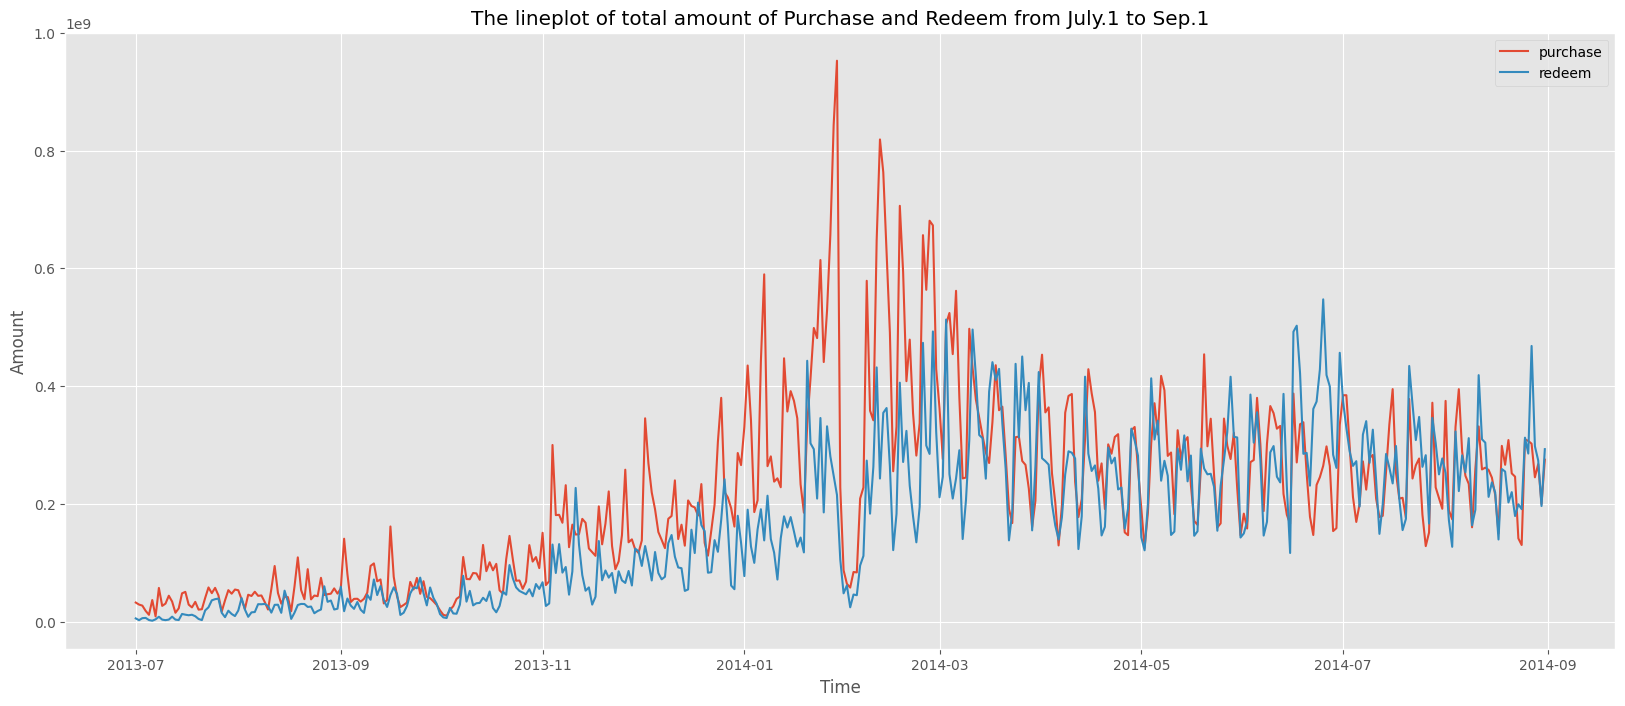

In [47]:
# Daily from 2013-07-01 to 2014-09-01
fig = plt.figure(figsize=(20,8))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.1 to Sep.1")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

As we can see, there is a significatn spike on the purchase after 2014-01

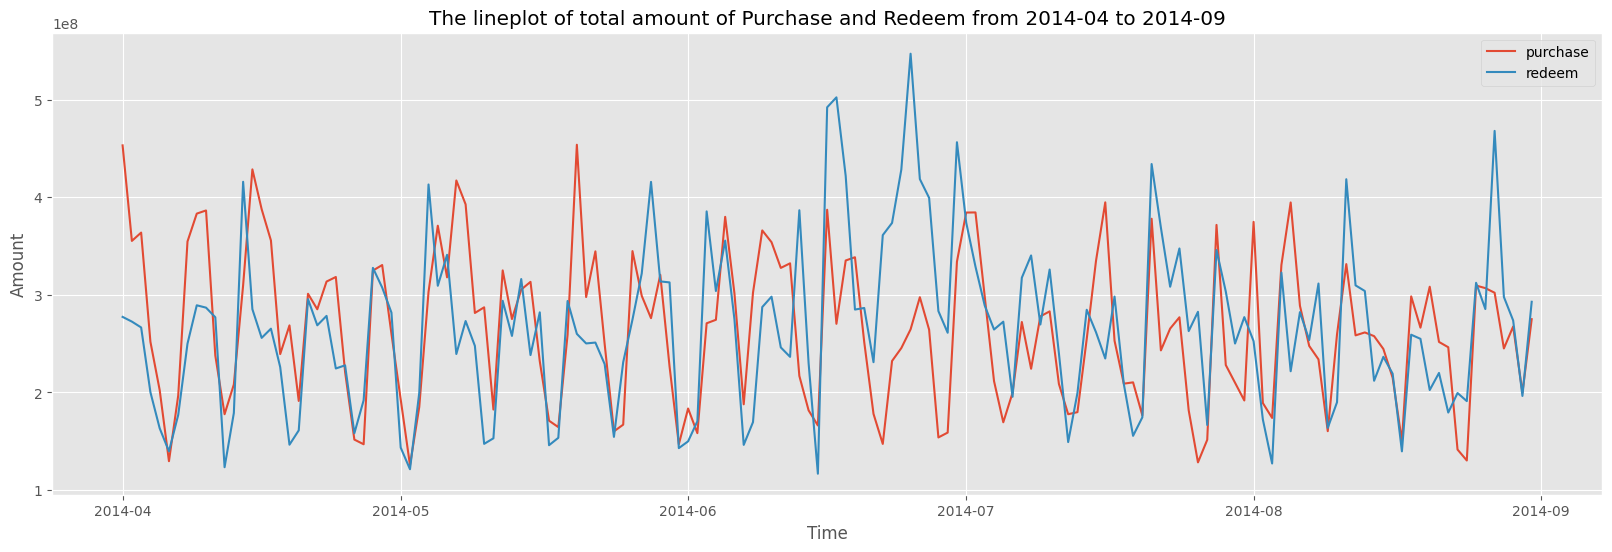

In [48]:
# After 2014-03
total_balance_1 = total_balance[total_balance['date']>='2014-04-01']
fig = plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'],label='purchase')
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'],label='redeem')
plt.title("The lineplot of total amount of Purchase and Redeem from 2014-04 to 2014-09")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

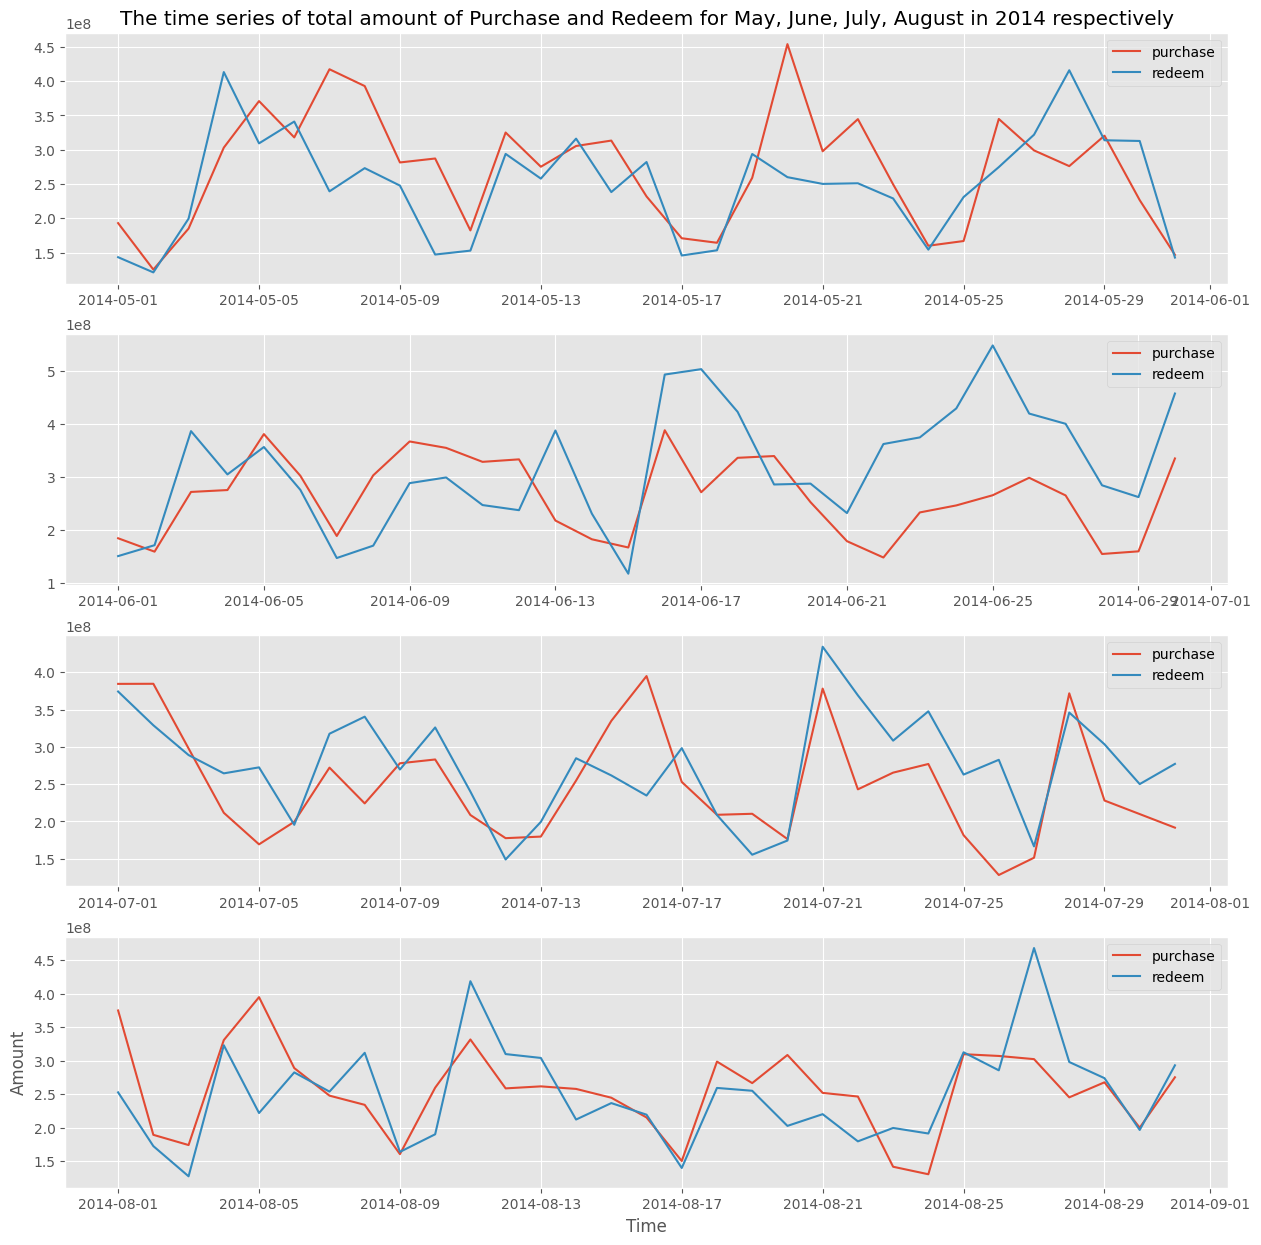

In [49]:
# time series charts of daily purchase and redemption volumes for  month in 2014

fig = plt.figure(figsize=(15,15))

# Plotting May 
total_balance_may = total_balance[(total_balance['date'] >= '2014-05-01') & (total_balance['date'] < '2014-06-01')]
plt.subplot(4,1,1)  # This is now the first plot
plt.plot(total_balance_may['date'], total_balance_may['total_purchase_amt'],label='purchase')
plt.plot(total_balance_may['date'], total_balance_may['total_redeem_amt'],label='redeem')
plt.legend()
plt.title("The time series of total amount of Purchase and Redeem for May, June, July, August in 2014 respectively")

# June
total_balance_june = total_balance[(total_balance['date'] >= '2014-06-01') & (total_balance['date'] < '2014-07-01')]
plt.subplot(4,1,2)
plt.plot(total_balance_june['date'], total_balance_june['total_purchase_amt'],label='purchase')
plt.plot(total_balance_june['date'], total_balance_june['total_redeem_amt'],label='redeem')
plt.legend()

# July
total_balance_july = total_balance[(total_balance['date'] >= '2014-07-01') & (total_balance['date'] < '2014-08-01')]
plt.subplot(4,1,3)
plt.plot(total_balance_july['date'], total_balance_july['total_purchase_amt'],label='purchase')
plt.plot(total_balance_july['date'], total_balance_july['total_redeem_amt'],label='redeem')
plt.legend()

# August
total_balance_aug = total_balance[total_balance['date'] >= '2014-08-01']
plt.subplot(4,1,4)  # This is now the last plot
plt.plot(total_balance_aug['date'], total_balance_aug['total_purchase_amt'],label='purchase')
plt.plot(total_balance_aug['date'], total_balance_aug['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

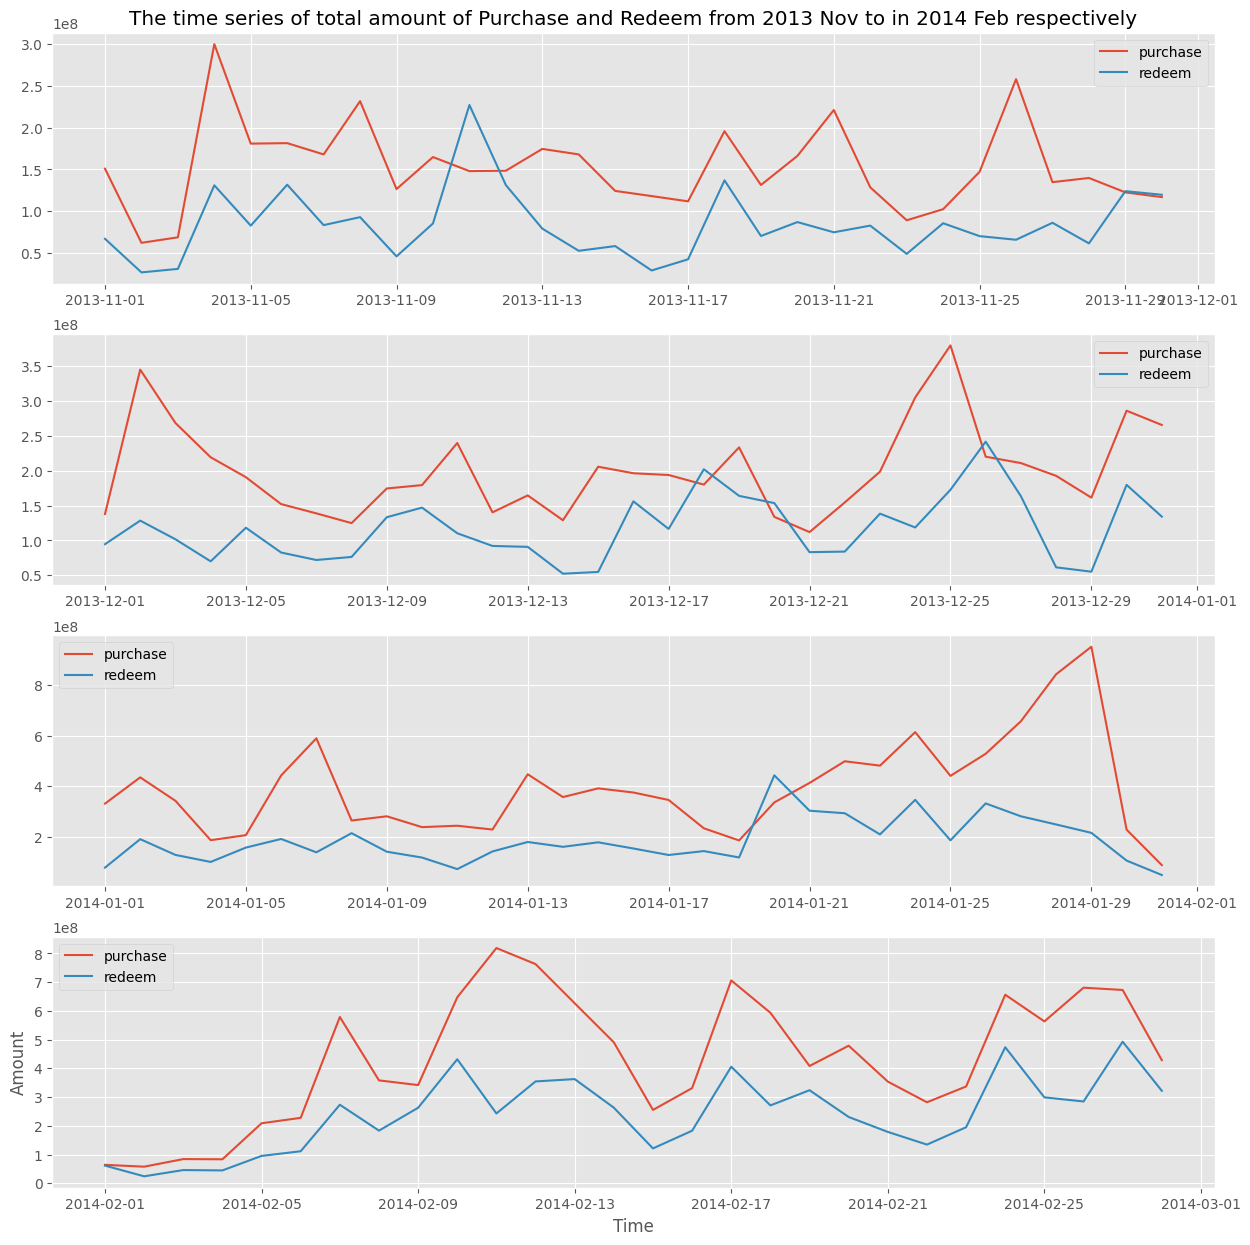

In [50]:
# time series charts of daily purchase and redemption volumes from late 2013 to early 2014

fig = plt.figure(figsize=(15,15))

# Plotting November 
total_balance_nov = total_balance[(total_balance['date'] >= '2013-11-01') & (total_balance['date'] < '2013-12-01')]
plt.subplot(4,1,1)  # This is now the first plot
plt.plot(total_balance_nov['date'], total_balance_nov['total_purchase_amt'],label='purchase')
plt.plot(total_balance_nov['date'], total_balance_nov['total_redeem_amt'],label='redeem')
plt.legend()
plt.title("The time series of total amount of Purchase and Redeem from 2013 Nov to in 2014 Feb respectively")

# December
total_balance_dec = total_balance[(total_balance['date'] >= '2013-12-01') & (total_balance['date'] < '2014-01-01')]
plt.subplot(4,1,2)
plt.plot(total_balance_dec['date'], total_balance_dec['total_purchase_amt'],label='purchase')
plt.plot(total_balance_dec['date'], total_balance_dec['total_redeem_amt'],label='redeem')
plt.legend()

# Jan
total_balance_jan = total_balance[(total_balance['date'] >= '2014-01-01') & (total_balance['date'] < '2014-02-01')]
plt.subplot(4,1,3)
plt.plot(total_balance_jan['date'], total_balance_jan['total_purchase_amt'],label='purchase')
plt.plot(total_balance_jan['date'], total_balance_jan['total_redeem_amt'],label='redeem')
plt.legend()

# Feb
total_balance_feb = total_balance[(total_balance['date'] >= '2014-02-01') & (total_balance['date'] < '2014-03-01')]
plt.subplot(4,1,4)  # This is now the last plot
plt.plot(total_balance_feb['date'], total_balance_feb['total_purchase_amt'],label='purchase')
plt.plot(total_balance_feb['date'], total_balance_feb['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

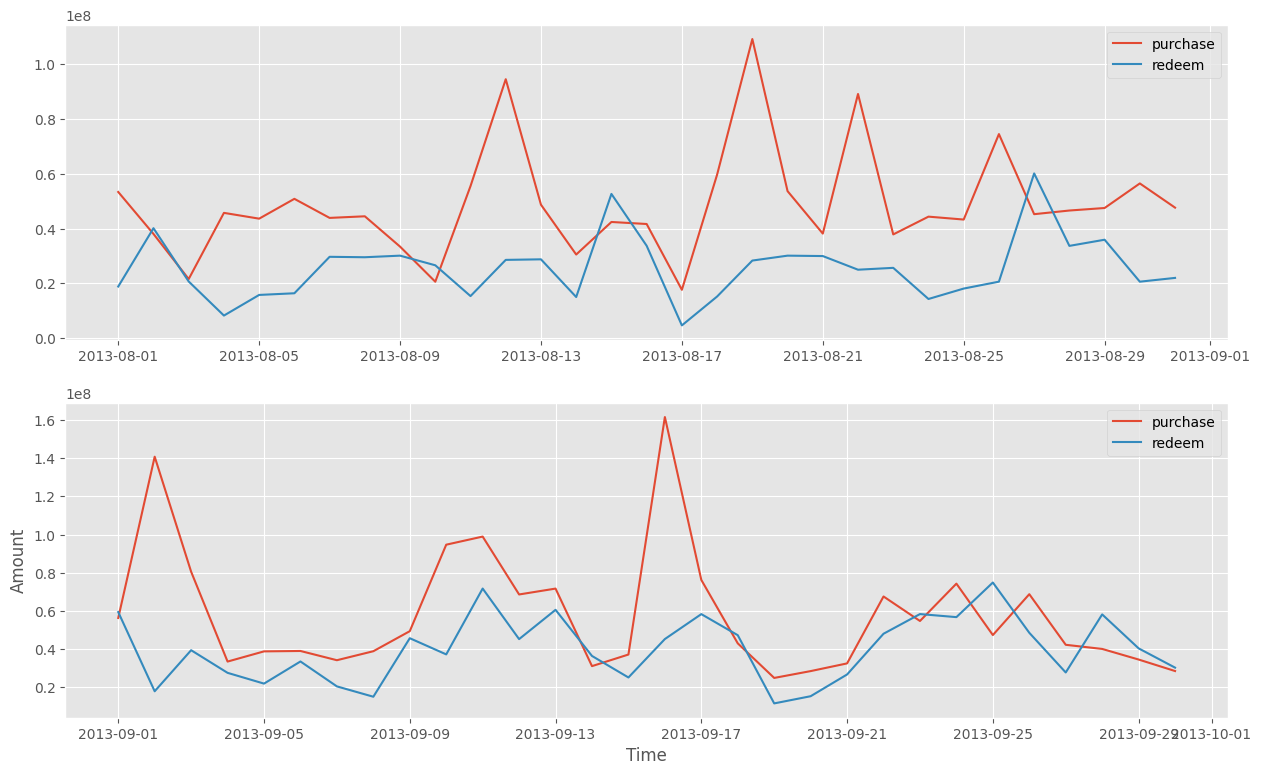

In [51]:
# Draw the time series charts of daily purchase and redemption volumes for August and September of 2013 separately
fig = plt.figure(figsize=(15,9))

total_balance_2013Aug = total_balance[(total_balance['date'] >= pd.to_datetime('2013-8-1')) & (total_balance['date'] < pd.to_datetime('2013-9-1'))]
plt.subplot(2,1,1)
plt.plot(total_balance_2013Aug['date'], total_balance_2013Aug['total_purchase_amt'],label='purchase')
plt.plot(total_balance_2013Aug['date'], total_balance_2013Aug['total_redeem_amt'],label='redeem')
plt.legend()

total_balance_2013Sep = total_balance[(total_balance['date'] >= pd.to_datetime('2013-9-1')) & (total_balance['date'] < pd.to_datetime('2013-10-1'))]
plt.subplot(2,1,2)
plt.plot(total_balance_2013Sep['date'], total_balance_2013Sep['total_purchase_amt'],label='purchase')
plt.plot(total_balance_2013Sep['date'], total_balance_2013Sep['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

# 4. Analyze the difference in total subscription and redemption volumes from Monday to Sunday

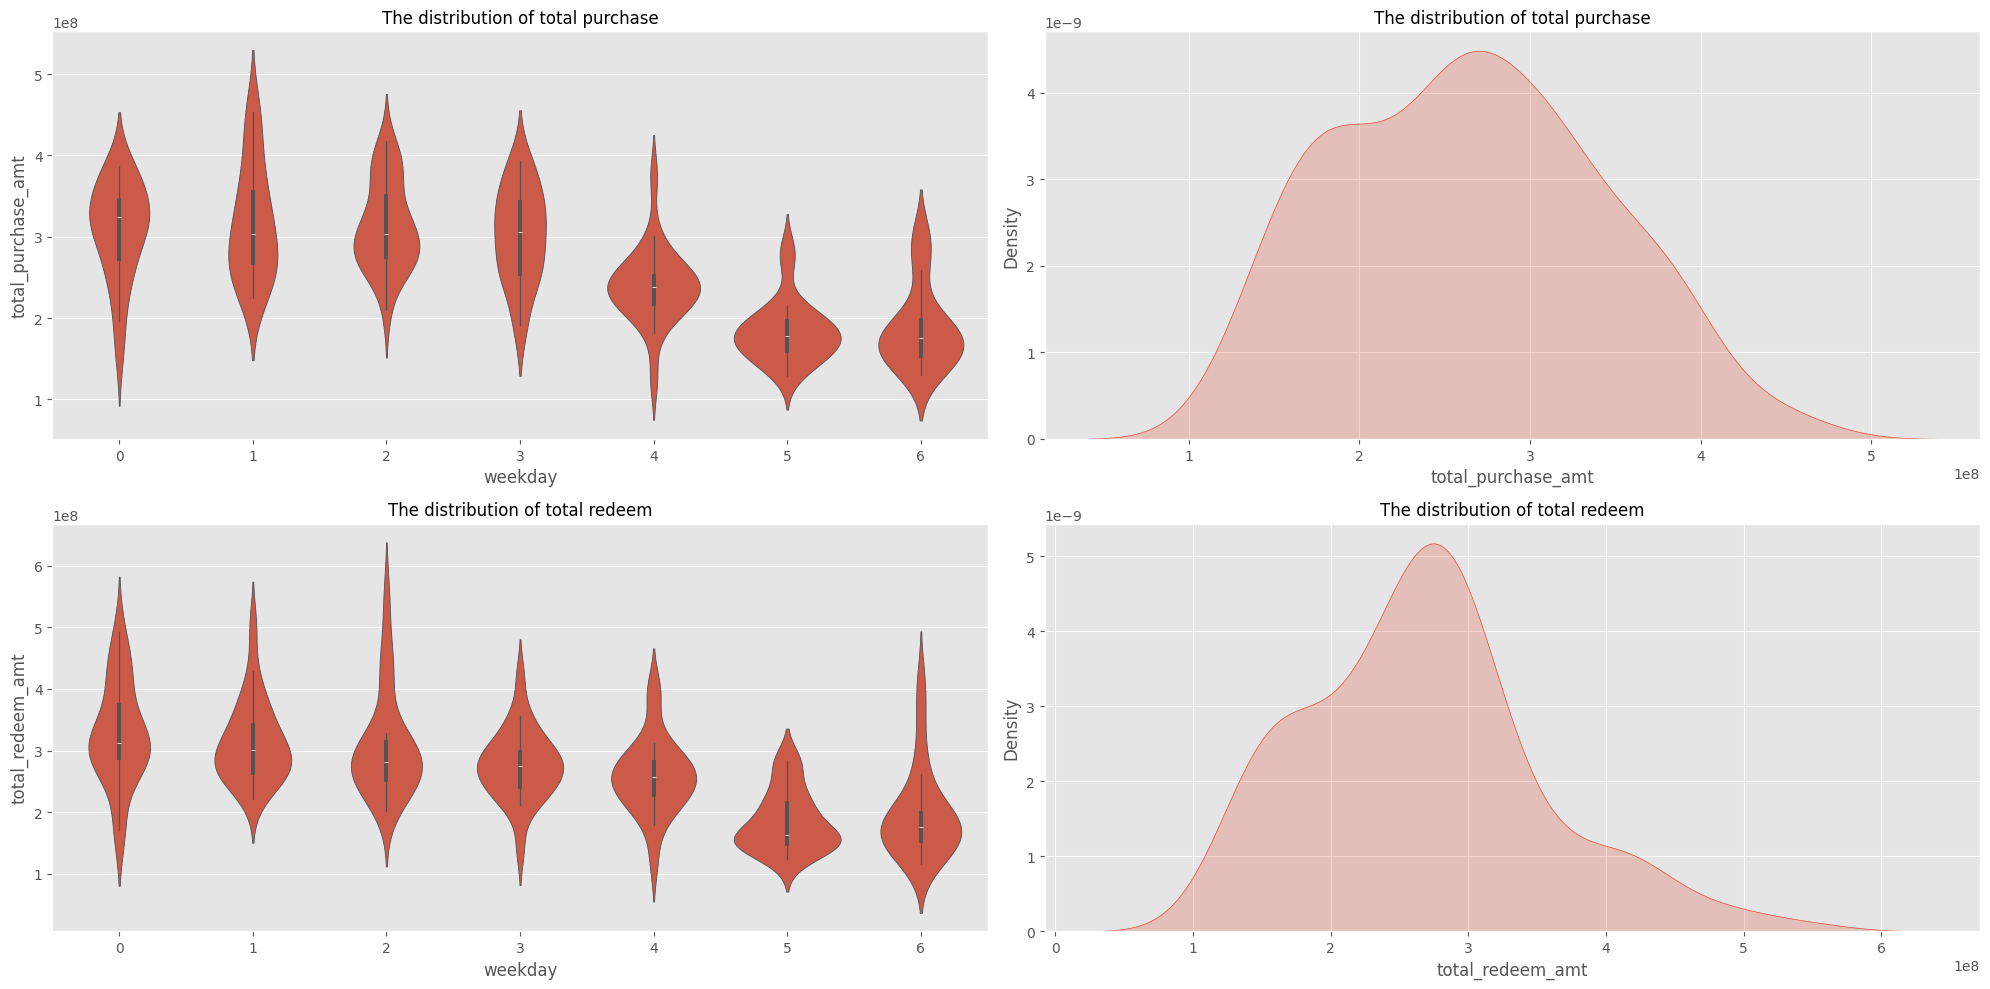

In [55]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('The distribution of total purchase', fontsize=12)
sns.violinplot(x='weekday', y='total_purchase_amt', data=total_balance_1)


plt.subplot(2, 2, 2)
plt.title('The distribution of total purchase', fontsize=12)
sns.kdeplot(x='total_purchase_amt', data=total_balance_1, fill=True)

plt.subplot(2, 2, 3)
plt.title('The distribution of total redeem', fontsize=12)
sns.violinplot(x='weekday', y='total_redeem_amt', data=total_balance_1)

plt.subplot(2, 2, 4)
plt.title('The distribution of total redeem', fontsize=12)
sns.kdeplot(x='total_redeem_amt', data=total_balance_1, fill=True)

plt.tight_layout()
plt.show()


In [56]:
week_sta = total_balance_1[['total_purchase_amt', 'total_redeem_amt', 'weekday']].groupby('weekday', as_index=False).mean()

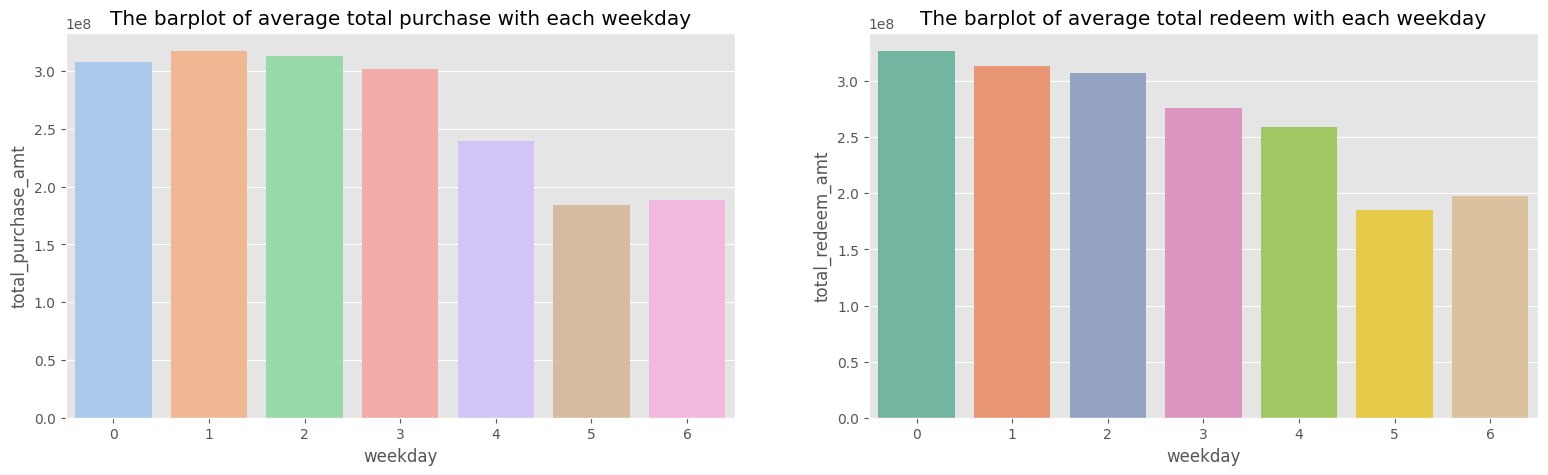

In [57]:
plt.figure(figsize=(19, 5))
ax = plt.subplot(1,2,1)
plt.title('The barplot of average total purchase with each weekday')
ax = sns.barplot(x="weekday", y="total_purchase_amt", data=week_sta, label='Purchase',palette = 'pastel')

ax = plt.subplot(1,2,2)
plt.title('The barplot of average total redeem with each weekday')
ax = sns.barplot(x="weekday", y="total_redeem_amt", data=week_sta, label='Redeem',palette = 'Set2')


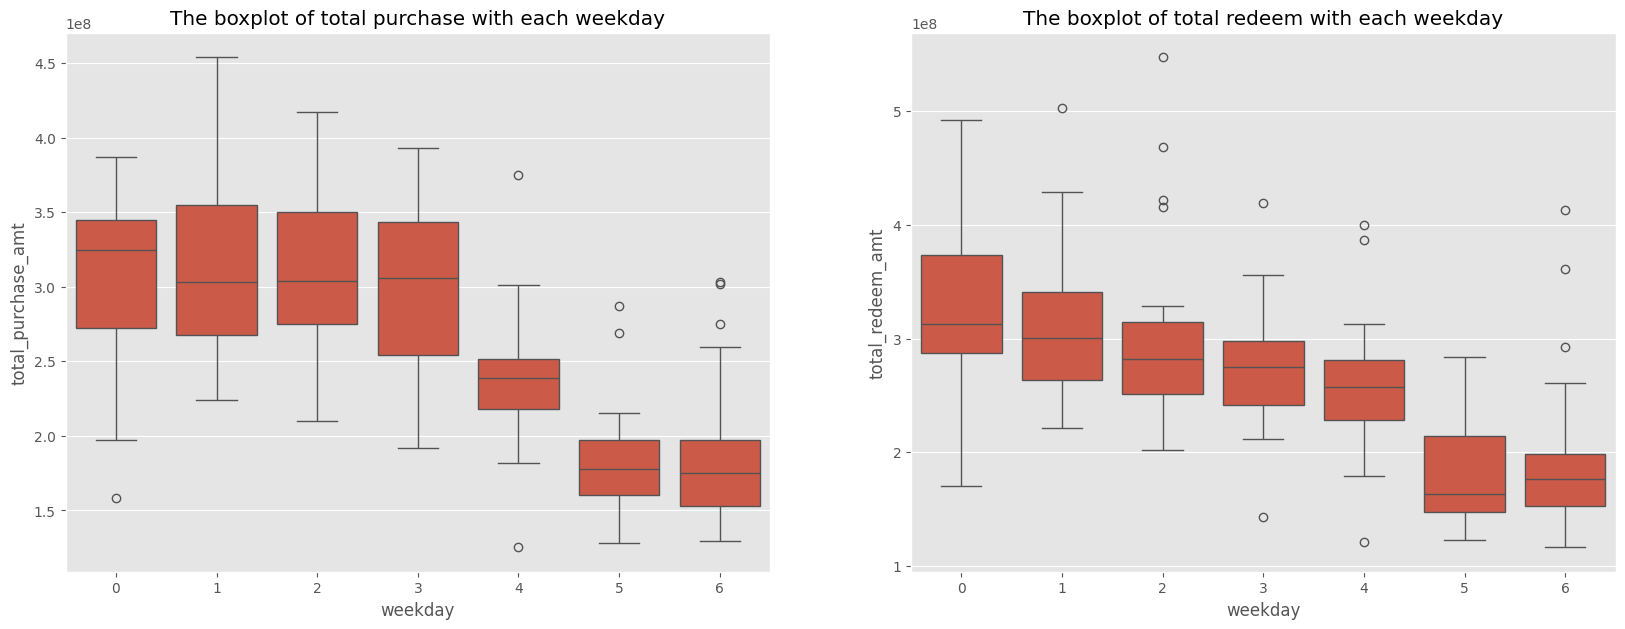

In [58]:
plt.figure(figsize=(20, 7))
ax = plt.subplot(1,2,1)
plt.title('The boxplot of total purchase with each weekday')
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=total_balance_1)
ax = plt.subplot(1,2,2)
plt.title('The boxplot of total redeem with each weekday')
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=total_balance_1)

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
total_balance = total_balance.reset_index()
week_feature = encoder.fit_transform(np.array(total_balance['weekday']).reshape(-1, 1)).toarray()
week_feature = pd.DataFrame(week_feature,columns=['weekday_onehot']*len(week_feature[0]))
feature = pd.concat([total_balance, week_feature], axis = 1)[['total_purchase_amt', 'total_redeem_amt','weekday_onehot','date']]
feature.columns = list(feature.columns[0:2]) + [x+str(i) for i,x in enumerate(feature.columns[2:-1])] + ['date']

In [67]:
feature

total_purchase_amt  total_redeem_amt  weekday_onehot0  weekday_onehot1  \
0            32488348.0         5525022.0              1.0              0.0   
1            29037390.0         2554548.0              0.0              1.0   
2            27270770.0         5953867.0              0.0              0.0   
3            18321185.0         6410729.0              0.0              0.0   
4            11648749.0         2763587.0              0.0              0.0   
..                  ...               ...              ...              ...   
452                 NaN               NaN              0.0              0.0   
453                 NaN               NaN              0.0              0.0   
454                 NaN               NaN              0.0              0.0   
455                 NaN               NaN              1.0              0.0   
456                 NaN               NaN              0.0              1.0   

     weekday_onehot2  weekday_onehot3  weekday_onehot4  weekday_onehot5  \
0                0.0              0.0              0.0              0.0   
1                0.0              0.0              0.0              0.0   
2                1.0              0.0              0.0              0.0   
3                0.0              1.0              0.0              0.0   
4                0.0              0.0              1.0              0.0   
..               ...              ...              ...              ...   
452              0.0              0.0              1.0              0.0   
453              0.0              0.0              0.0              1.0   
454              0.0              0.0              0.0              0.0   
455              0.0              0.0              0.0              0.0   
456              0.0              0.0              0.0              0.0   

     weekday_onehot6       date  
0                0.0 2013-07-01  
1                0.0 2013-07-02  
2                0.0 2013-07-03  
3                0.0 2013-07-04  
4                0.0 2013-07-05  
..               ...        ...  
452              0.0 2014-09-26  
453              0.0 2014-09-27  
454              1.0 2014-09-28  
455              0.0 2014-09-29  
456              0.0 2014-09-30  

[457 rows x 10 columns]

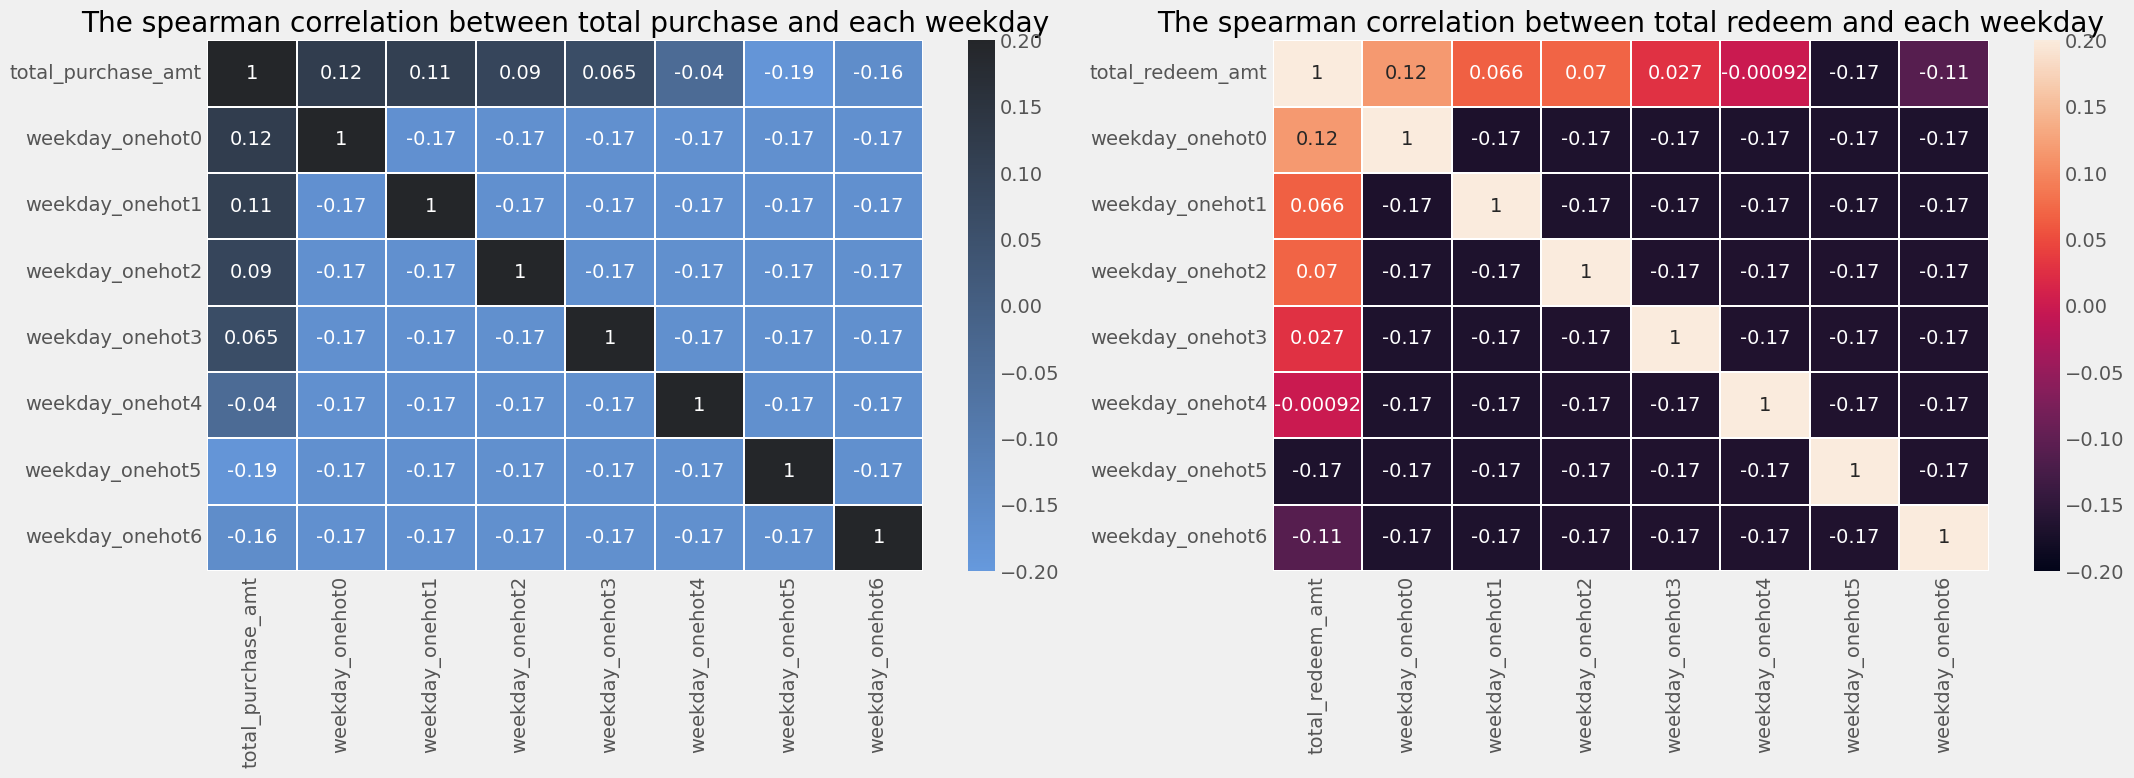

In [80]:
# Set up the matplotlib figure with two subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))

# First subplot: Heatmap without x-ticks
ax1.set_title('The spearman correlation between total purchase and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date']]].corr('spearman'),
            linewidths=0.1, vmax=0.2, vmin=-0.2,
            cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True), annot=True, ax=ax1)


# Second subplot: Heatmap with default settings
ax2.set_title('The spearman correlation between total redeem and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date']]].corr('spearman'),
            linewidths=0.1, vmax=0.2, vmin=-0.2, annot=True, ax=ax2)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

# 5. Monthly feature analysis

In [81]:
plt.style.use('fivethirtyeight')

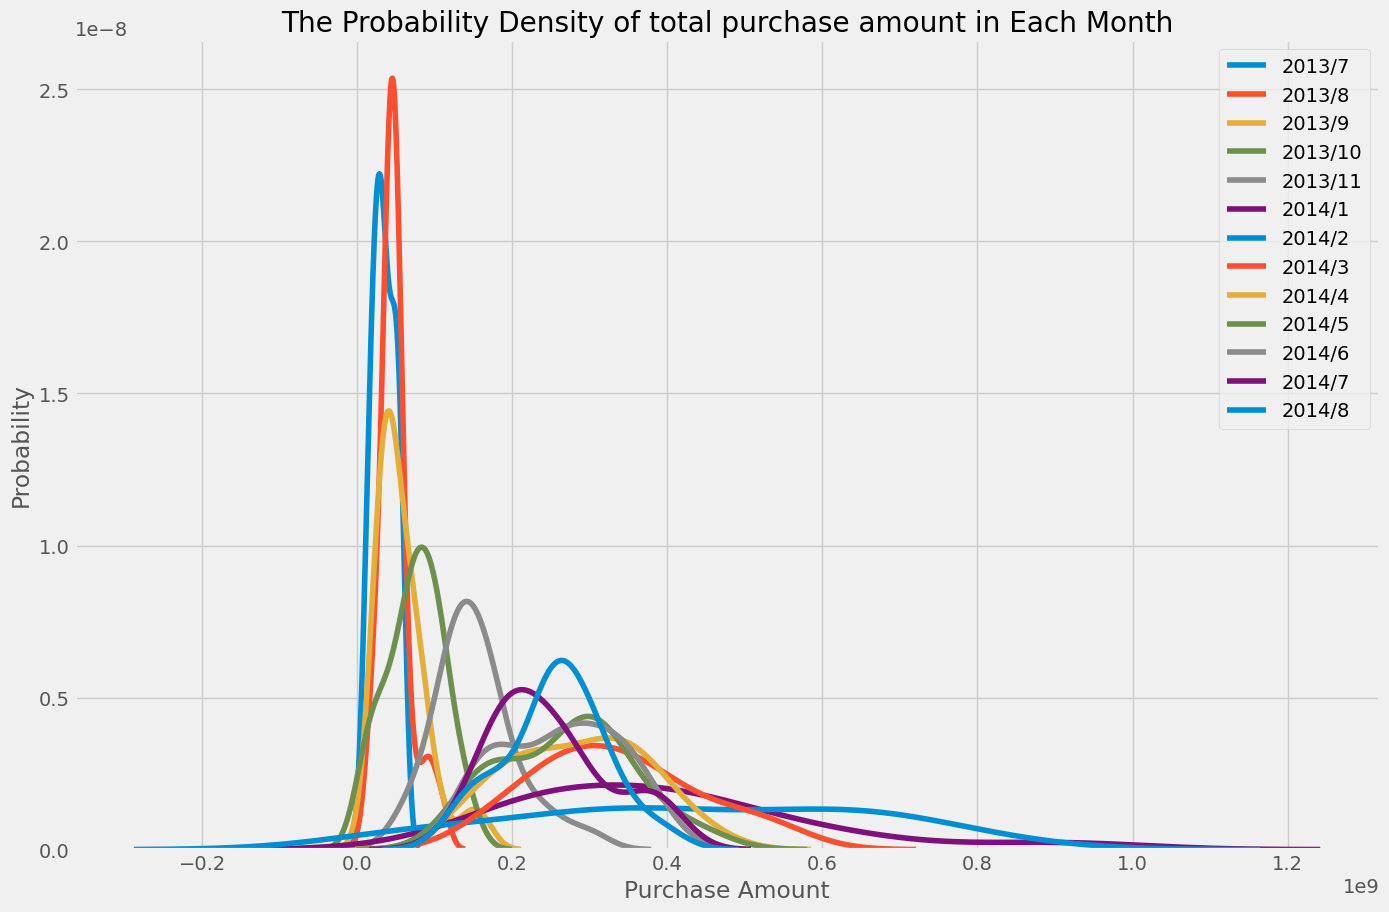

In [82]:
# KDE plot for total purchase amount in each month
plt.figure(figsize=(15,10))
plt.title('The Probability Density of total purchase amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Purchase Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2013,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2013,i+1,1))]['total_purchase_amt'],label='2013/'+str(i))
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2014,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='2014/'+str(i))
plt.legend()

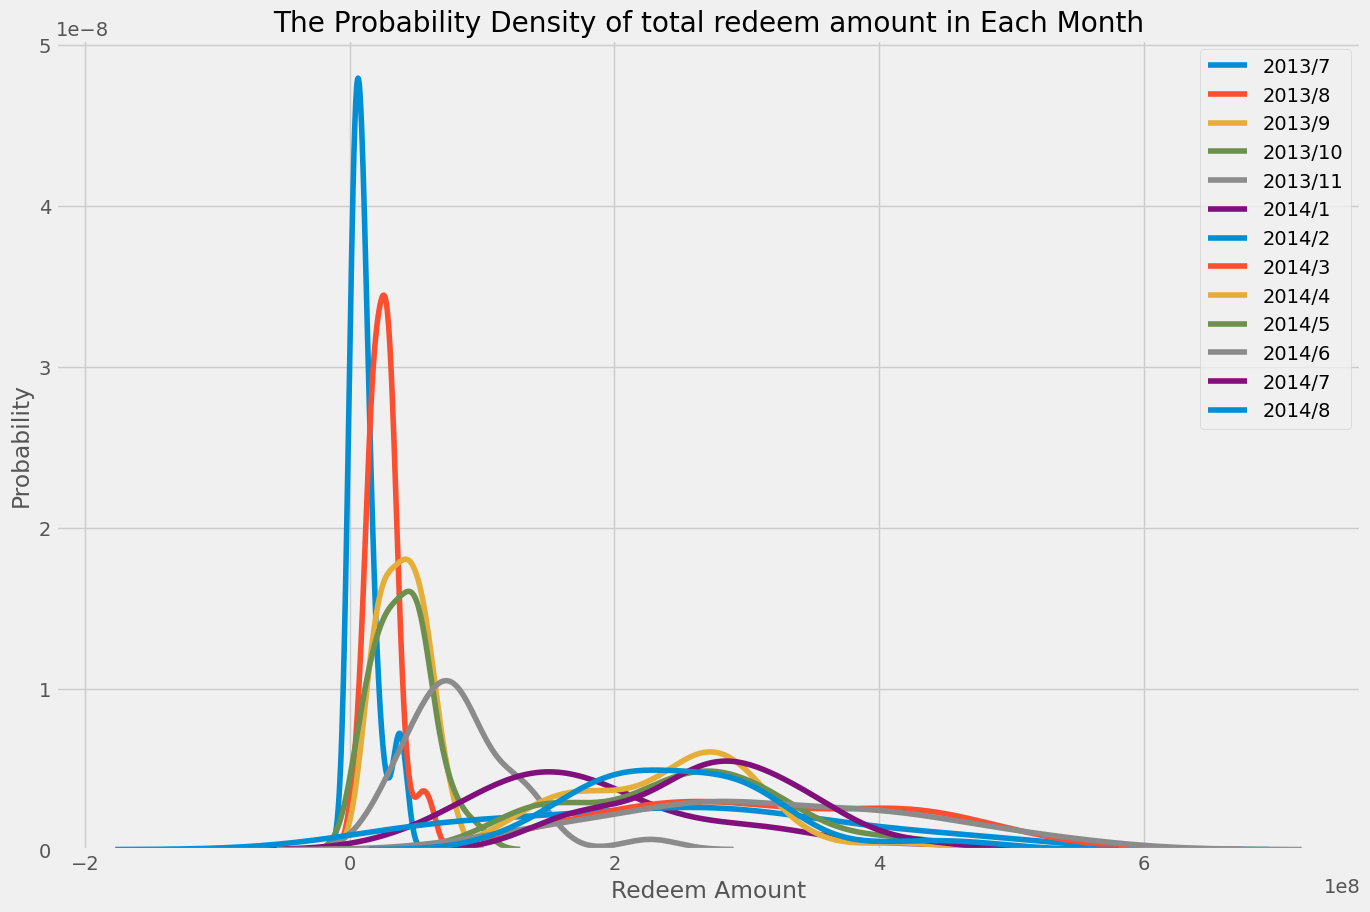

In [83]:
# KDE plot for total redeem amount in each month
plt.figure(figsize=(15,10))
plt.title('The Probability Density of total redeem amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Redeem Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2013,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2013,i+1,1))]['total_redeem_amt'],label='2013/'+str(i))
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2014,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='2014/'+str(i))
plt.legend()

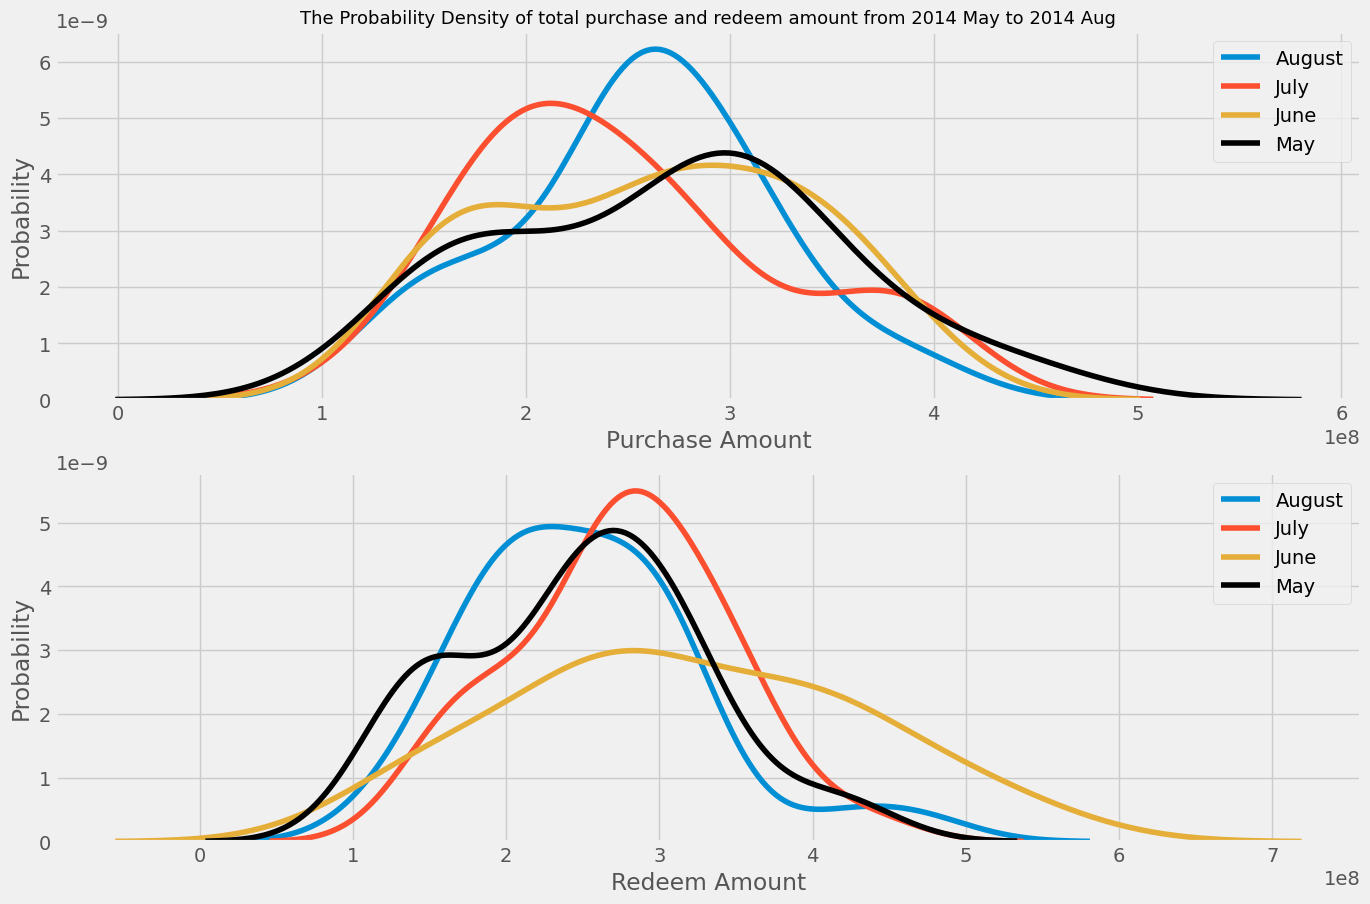

In [84]:
# 2014/05-2014/08
plt.figure(figsize=(15,10))

ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from 2014 May to 2014 Aug', fontsize = 13)
plt.ylabel('Probability')
plt.xlabel('Purchase Amount')
ax = sns.kdeplot(total_balance_aug['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_july['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_june['total_purchase_amt'],label='June')
ax = sns.kdeplot(total_balance_may['total_purchase_amt'],color='Black',label='May')
plt.legend()
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Redeem Amount')
ax = sns.kdeplot(total_balance_aug['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_july['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_june['total_redeem_amt'],label='June')
ax = sns.kdeplot(total_balance_may['total_redeem_amt'],color='Black',label='May')
plt.legend()

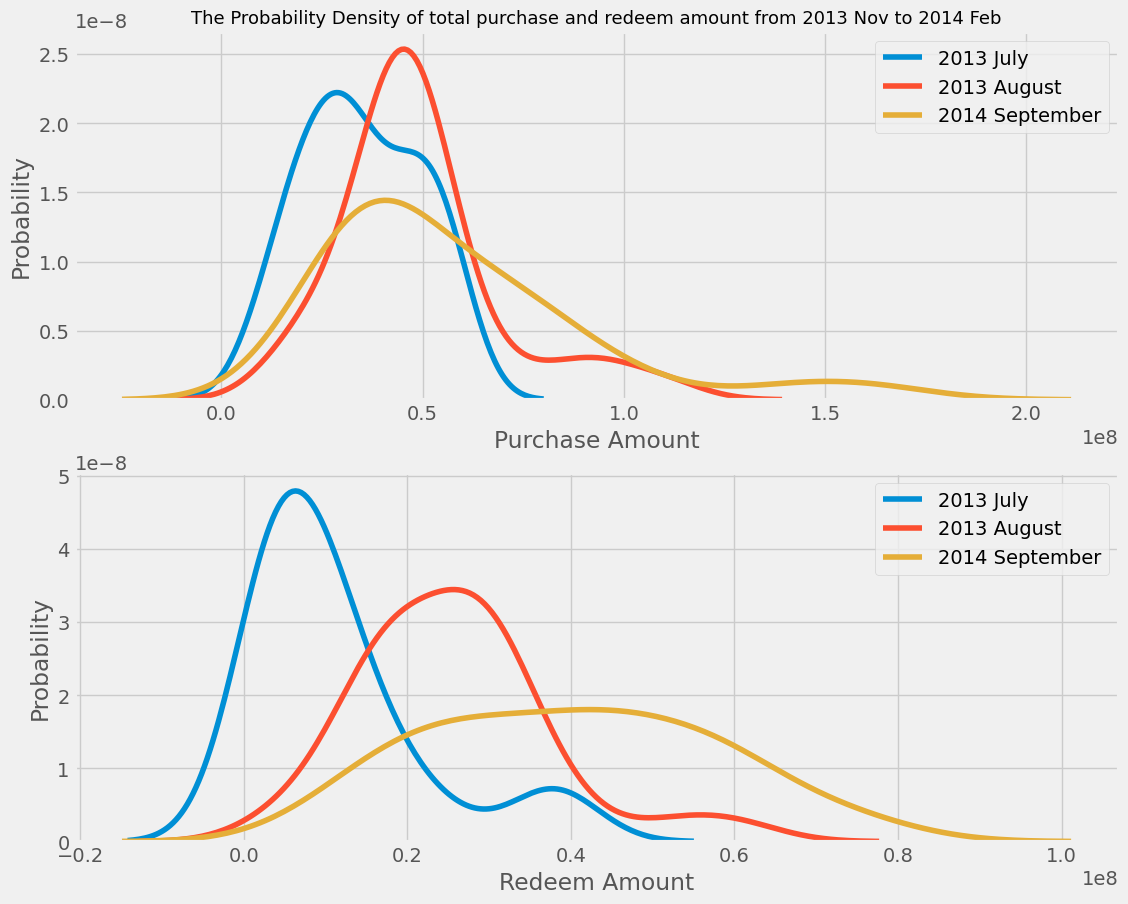

In [85]:
total_balance_2013Jul = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,7,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,8,1))]
plt.figure(figsize=(12,10))

ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from 2013 Nov to 2014 Feb', fontsize = 13)
plt.ylabel('Probability')
plt.xlabel('Purchase Amount')
ax = sns.kdeplot(total_balance_2013Jul['total_purchase_amt'],label='2013 July')
ax = sns.kdeplot(total_balance_2013Aug['total_purchase_amt'],label='2013 August')
ax = sns.kdeplot(total_balance_2013Sep['total_purchase_amt'],label='2014 September')

plt.legend()
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Redeem Amount')
ax = sns.kdeplot(total_balance_2013Jul['total_redeem_amt'],label='2013 July')
ax = sns.kdeplot(total_balance_2013Aug['total_redeem_amt'],label='2013 August')
ax = sns.kdeplot(total_balance_2013Sep['total_redeem_amt'],label='2014 September')

plt.legend()

# 6. Day feature analysis

In [86]:
day_sta = total_balance_aug[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()

In [87]:
day_sta

day  total_purchase_amt  total_redeem_amt
0     1         374884735.0       252540858.0
1     2         189092130.0       172250225.0
2     3         173825397.0       127125217.0
3     4         330640884.0       322907524.0
4     5         394780870.0       221706539.0
5     6         288821016.0       282346594.0
6     7         247646474.0       253659514.0
7     8         233903717.0       311648757.0
8     9         160262764.0       163611708.0
9    10         259534870.0       189909225.0
10   11         331550471.0       418603336.0
11   12         258493673.0       309754858.0
12   13         261506619.0       303975517.0
13   14         257702660.0       211939431.0
14   15         244551620.0       236516007.0
15   16         215059736.0       219214339.0
16   17         149978271.0       139564084.0
17   18         298499146.0       259169016.0
18   19         266401973.0       254929877.0
19   20         308378692.0       202452782.0
20   21         251763517.0       219963356.0
21   22         246316056.0       179349206.0
22   23         141412027.0       199377531.0
23   24         130195484.0       191080151.0
24   25         309574223.0       312413411.0
25   26         306945089.0       285478563.0
26   27         302194801.0       468164147.0
27   28         245082751.0       297893861.0
28   29         267554713.0       273756380.0
29   30         199708772.0       196374134.0
30   31         275090213.0       292943033.0

In [92]:
plt.style.use('fivethirtyeight')

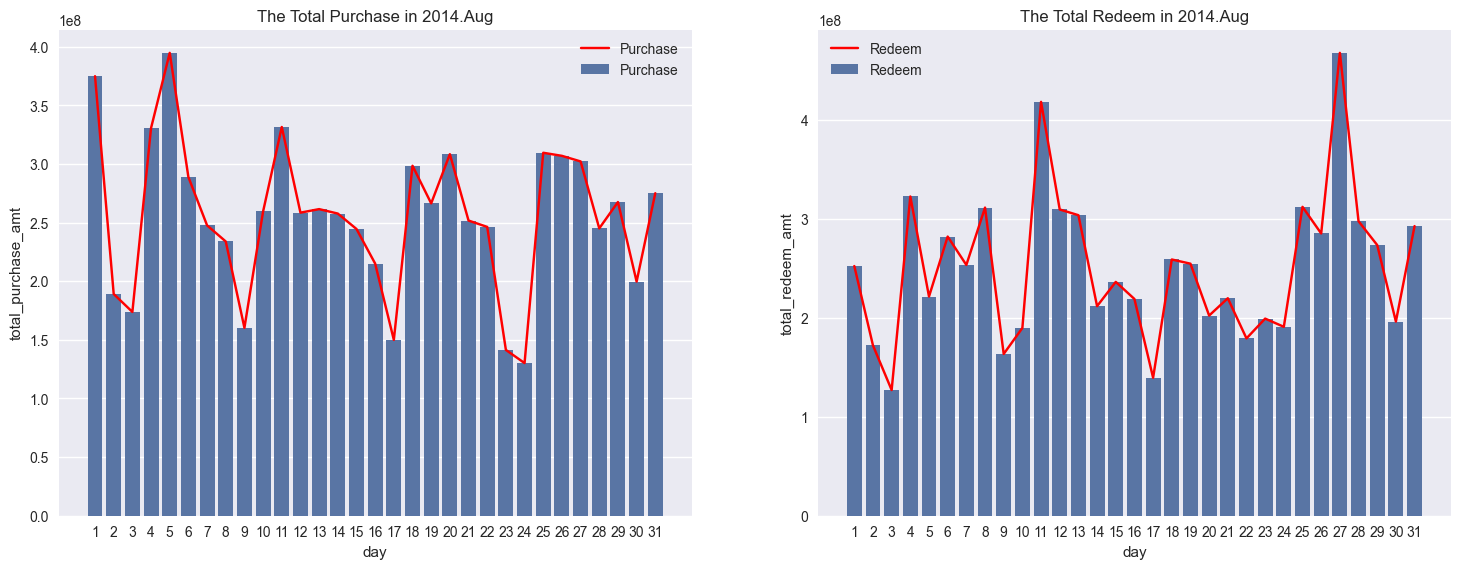

In [94]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-v0_8')
plt.subplot(1,2,1)
day_sta['day'] = day_sta['day'].astype(str)
plt.title('The Total Purchase in 2014.Aug')
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase',color='red')
ax.legend()
plt.subplot(1,2,2)
plt.title("The Total Redeem in 2014.Aug")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem',color='red')
bx.legend()



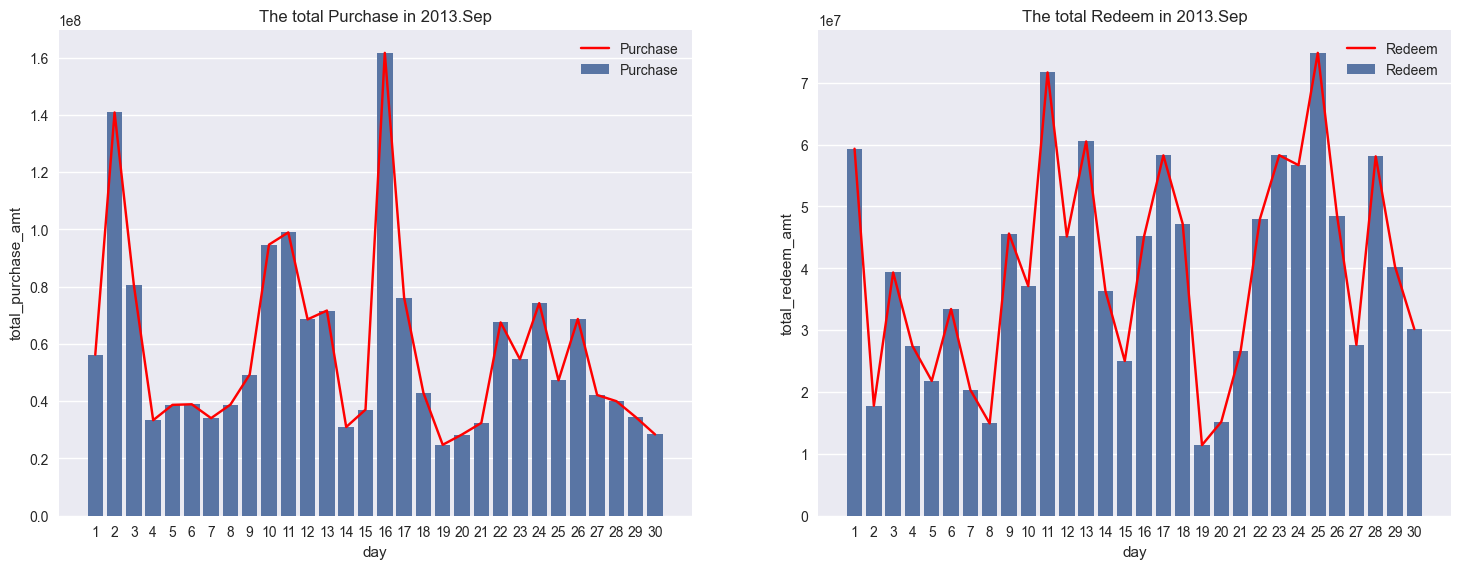

In [95]:
plt.figure(figsize=(16,6))
day_sta = total_balance_2013Sep[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()
day_sta['day'] = day_sta['day'].astype(str)
plt.subplot(1,2,1)
plt.title("The total Purchase in 2013.Sep")
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase',color='red')
plt.subplot(1,2,2)
plt.title("The total Redeem in 2013.Sep")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem',color='red')
bx.legend()

**We find that the data from last year in Sep has very limited week feature**

There are some noticeable day in Sep:

1. 1st day
2. 2nd day
3. 16th day(Purchase a lot)---Monday & 3days before MidAutumn Festival
4. 11th day and 25th day(Redeem a lot)---Both on Wednesday
5. 18 19 20(Both Purchase and Redeem are very low)

Text(50.722222222222214, 0.5, 'Week')

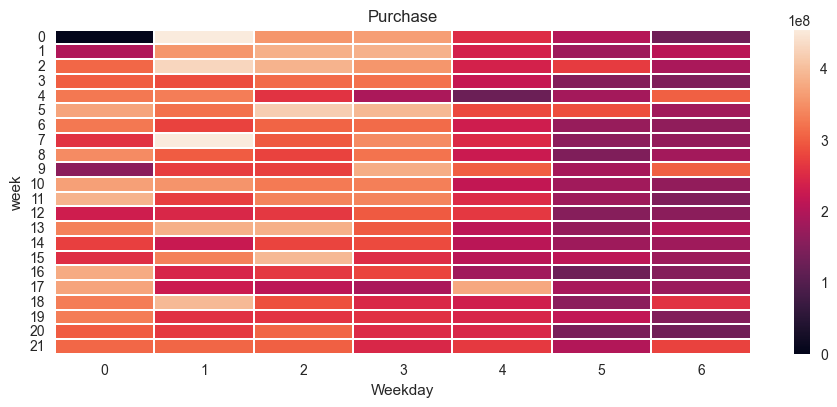

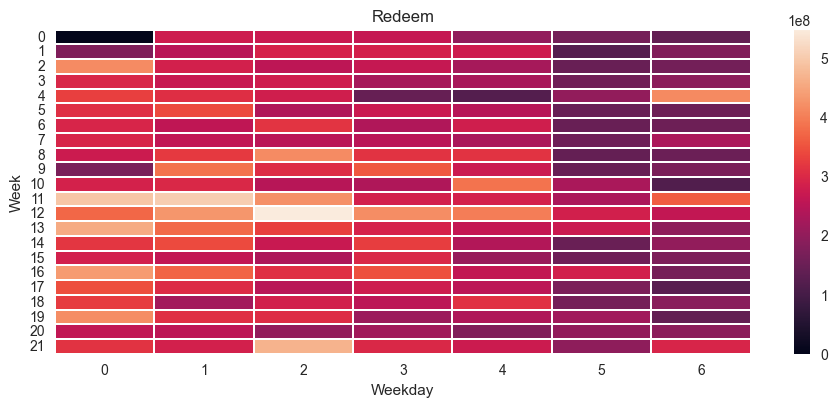

In [96]:
# Draw the heatmap of purchase and redeem groupby weekdays in week
test = np.zeros((max(total_balance_1.dropna()['week']) - min(total_balance_1.dropna()['week']) + 1, 7))
test[total_balance_1.dropna()['week'] - min(total_balance_1.dropna()['week']), total_balance_1.dropna()['weekday']] = total_balance_1.dropna()['total_purchase_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Purchase")
ax.set_xlabel('Weekday')
ax.set_ylabel('week')

test = np.zeros((max(total_balance_1.dropna()['week']) - min(total_balance_1.dropna()['week']) + 1, 7))
test[total_balance_1.dropna()['week'] - min(total_balance_1.dropna()['week']), total_balance_1.dropna()['weekday']] = total_balance_1.dropna()['total_redeem_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Redeem")
ax.set_xlabel('Weekday')
ax.set_ylabel('Week')

From the heatmap, we find that there are some unusual patterns for the Weekday 6 in week 4, and weekday 2 in week 12. In the Weekday 6 in week 4, both redemption and purchase volumns are higher compared to the other days of the week. In the weekday of week 12, it shows the highest redemtion volume. 

In [97]:
# Check Weekday 6 in week 4
total_balance_1[(total_balance_1['week'] == 4 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 6)]


date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
307 2014-05-04         303087562.0       413222034.0    4      5  2014    18   

     weekday  
307        6

May 4th is the first workday after the International Labor Day.


In [98]:
# Check weekday 2 in week 12
total_balance_1[(total_balance_1['week'] == 12 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 2)]

date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
359 2014-06-25         264663201.0       547295931.0   25      6  2014    26   

     weekday  
359        2

On 2016-06-25, the user redemption amount was much greater than the purchase amount.

Next, we need to analyze holidays affect the purchase amount and redemption amount, as we have already discovered that certain special time points can significantly impact the volume of subscriptions and redemptions, making the analysis of holidays very necessary.

# 7. Holiday analysis

1. The QingMing festerval(Chinese memorial day) (April.5 - April.7)
2. The Labour day      (May.1 - May.5)
3. The DuanWu festeval (May.31 - June.2)
4. The MidAutumn festeval (Sep.6 - Sep.8)

Others

1. Mother day(May.13)
2. Father day(June. 17)
3. TianMao 618 sales(June 10 - June 20) like Amazon Prime day
4. Teachers' day(Sep 9)

In [99]:
total_balance['date'] = total_balance['date'].dt.date

In [100]:
# Obtain the holiday data
QingMing = total_balance[(total_balance['date'] >= datetime.date(2014,4,5)) & (total_balance['date'] < datetime.date(2014,4,8))]
labour = total_balance[(total_balance['date'] >= datetime.date(2014,5,1)) & (total_balance['date'] < datetime.date(2014,5,4))]
DuanWu = total_balance[(total_balance['date'] >= datetime.date(2014,5,31)) & (total_balance['date'] < datetime.date(2014,6,3))]
TM618 = total_balance[(total_balance['date'] >= datetime.date(2014,6,10)) & (total_balance['date'] < datetime.date(2014,6,20))]
MidAutumn = total_balance[(total_balance['date'] >= datetime.date(2013,9,19)) & (total_balance['date'] < datetime.date(2013,9,22))]

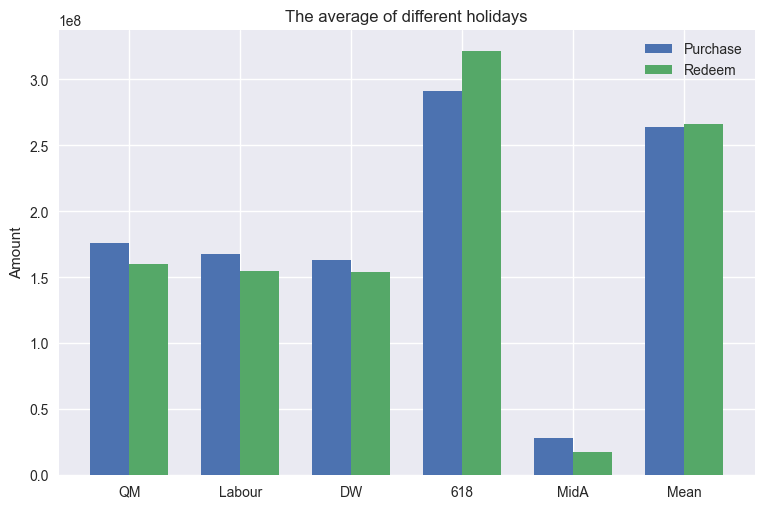

In [101]:
fig = plt.figure()  # Constructing the canvas

# Index for x-axis and calculating the mean for label
index_list = ['QM', 'Labour', 'DW', '618', 'MidA','Mean']  # x-axis contents
purchase_means = [np.mean(QingMing['total_purchase_amt']), np.mean(labour['total_purchase_amt']), np.mean(DuanWu['total_purchase_amt']), np.mean(TM618['total_purchase_amt']), np.mean(MidAutumn['total_purchase_amt']),np.mean(total_balance_1['total_purchase_amt'])]
redeem_means = [np.mean(QingMing['total_redeem_amt']), np.mean(labour['total_redeem_amt']), np.mean(DuanWu['total_redeem_amt']), np.mean(TM618['total_redeem_amt']), np.mean(MidAutumn['total_redeem_amt']),np.mean(total_balance_1['total_redeem_amt'])]

# Settings for bar positions
bar_width = 0.35  # Width of the bars
index = np.arange(len(index_list))  # Numeric x-axis labels

# Plotting the bars side by side
plt.bar(index - bar_width/2, purchase_means, width=bar_width, label="Purchase")
plt.bar(index + bar_width/2, redeem_means, width=bar_width, label="Redeem")

# Customizing the plot
plt.title("The average of different holidays")
plt.ylabel("Amount")
plt.xticks(index, index_list)  # Set text labels and properties.
plt.legend()

# Display the plot
plt.show()

## Analysis of dates surrounding holidays

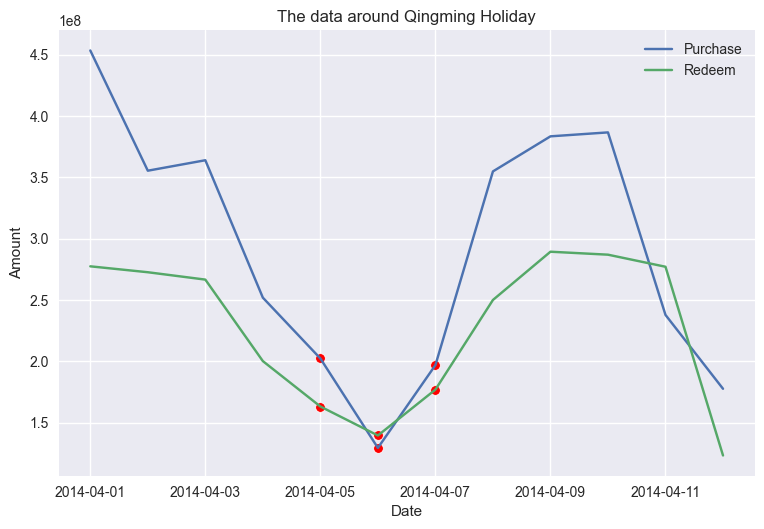

In [102]:
# Draw the time series chart for Qingming Festival and surrounding date
qingming_around = total_balance[(total_balance['date'] >= datetime.date(2014,4,1)) & (total_balance['date'] < datetime.date(2014,4,13))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=qingming_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=qingming_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=QingMing, ax=ax, color = 'red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=QingMing, ax=ax,color = 'red')
plt.title("The data around Qingming Holiday")
plt.xlabel("Date")
plt.ylabel("Amount")
ax.legend()

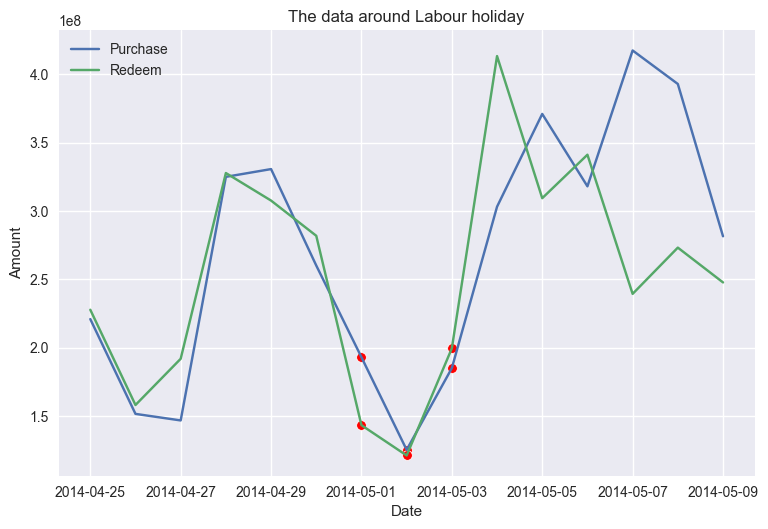

In [103]:
# Labour holiday
labour_around = total_balance[(total_balance['date'] >= datetime.date(2014,4,25)) & (total_balance['date'] < datetime.date(2014,5,10))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=labour_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=labour_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=labour, ax=ax, color = 'red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=labour, ax=ax, color = 'red')
plt.title("The data around Labour holiday")
plt.xlabel('Date')
plt.ylabel('Amount')
ax.legend()

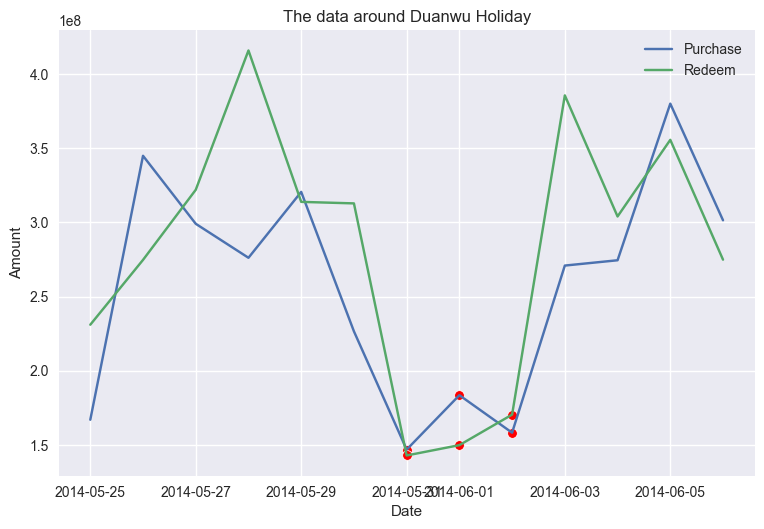

In [104]:
# Duanwu holiday
duanwu_around = total_balance[(total_balance['date'] >= datetime.date(2014,5,25)) & (total_balance['date'] < datetime.date(2014,6,7))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=duanwu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=duanwu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=DuanWu, ax=ax, color = 'red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=DuanWu, ax=ax, color = 'red')
plt.title("The data around Duanwu Holiday")
plt.xlabel('Date')
plt.ylabel('Amount')
ax.legend()

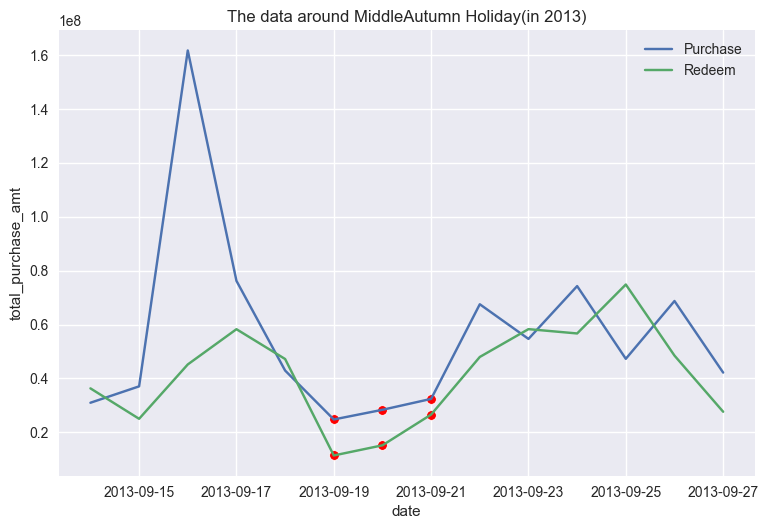

In [105]:
# MidAutumn Festival 
MidAutumn_around = total_balance[(total_balance['date'] >= datetime.date(2013,9,14)) & (total_balance['date'] < datetime.date(2013,9,28))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=MidAutumn_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=MidAutumn_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=MidAutumn, ax=ax, color='red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=MidAutumn, ax=ax, color = 'red')
plt.title("The data around MiddleAutumn Holiday(in 2013)")
ax.legend()

## Analysis of outliers

Text(0.5, 1.0, 'The abnormal value of total purchase')

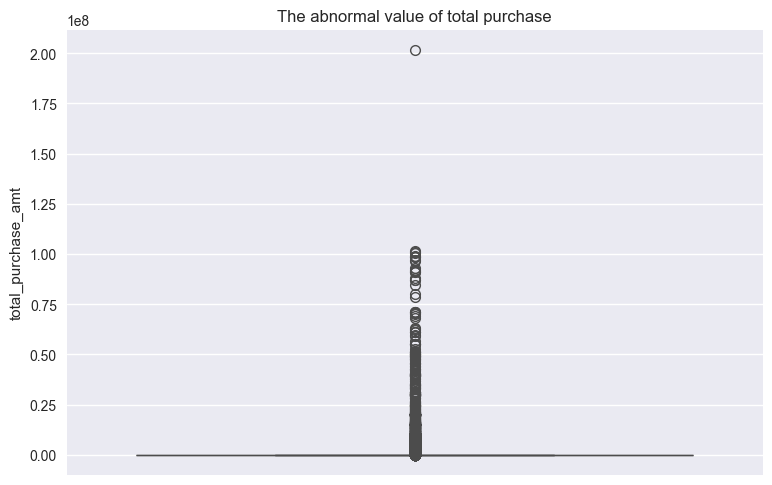

In [106]:
sns.boxplot(data_balance['total_purchase_amt'])
plt.title("The abnormal value of total purchase")

Text(0.5, 1.0, 'The abnormal value of total redeem')

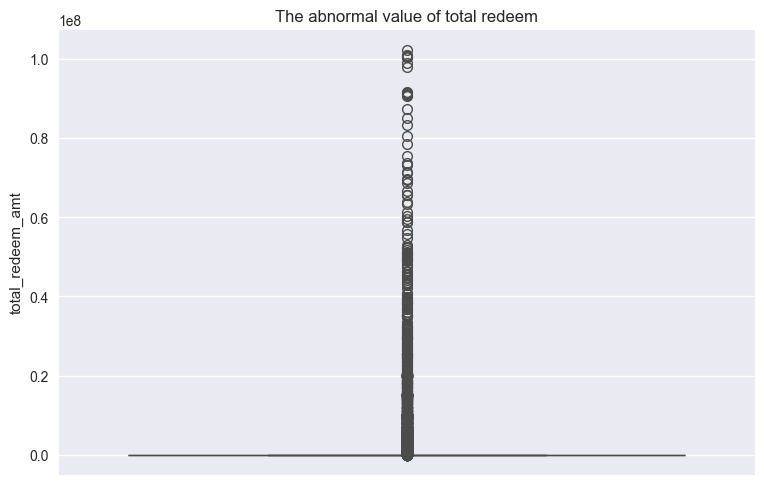

In [107]:
sns.boxplot(data_balance['total_redeem_amt'])
plt.title("The abnormal value of total redeem")

There are a LOT of outliers in both purchase and redemption. However, there is one point standout in the total purchase plot that has 2e8 amount. 

In [108]:
data_balance[data_balance['total_purchase_amt']>=200000000]

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
1453311    14592     20131104  99457728         0           201768328   

         direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
1453311            201768328         201275171             493157   

         total_redeem_amt  consume_amt  ...  category1  category2  category3  \
1453311         102310600            0  ...        NaN        NaN        NaN   

         category4       date  day  month  year week  weekday  
1453311        NaN 2013-11-04    4     11  2013   45        0  

[1 rows x 24 columns]

Now, let's analyze this user

In [109]:
data_balance[data_balance['user_id'] == 14592].sort_values(by = 'total_redeem_amt',axis = 0,ascending = False).head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
1453311    14592     20131104  99457728         0           201768328   
1453388    14592     20140616         0  98964529             1966014   
1453227    14592     20131226    367063  98296082               17369   
1453313    14592     20131105  97458675  99457728             4899446   
1453355    14592     20140617         0         0              339679   

         direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
1453311            201768328         201275171             493157   
1453388              1953569                 0            1953569   
1453227                    0                 0                  0   
1453313              4899446           4899446                  0   
1453355               339679                 0             339679   

         total_redeem_amt  consume_amt  ...  category1  category2  category3  \
1453311         102310600            0  ...        NaN        NaN        NaN   
1453388         100930543            0  ...        NaN        NaN        NaN   
1453227          97946388            0  ...        NaN        NaN        NaN   
1453313           6898499            0  ...        NaN        NaN        NaN   
1453355            339679            0  ...        NaN        NaN        NaN   

         category4       date  day  month  year week  weekday  
1453311        NaN 2013-11-04    4     11  2013   45        0  
1453388        NaN 2014-06-16   16      6  2014   25        0  
1453227        NaN 2013-12-26   26     12  2013   52        3  
1453313        NaN 2013-11-05    5     11  2013   45        1  
1453355        NaN 2014-06-17   17      6  2014   25        1  

[5 rows x 24 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


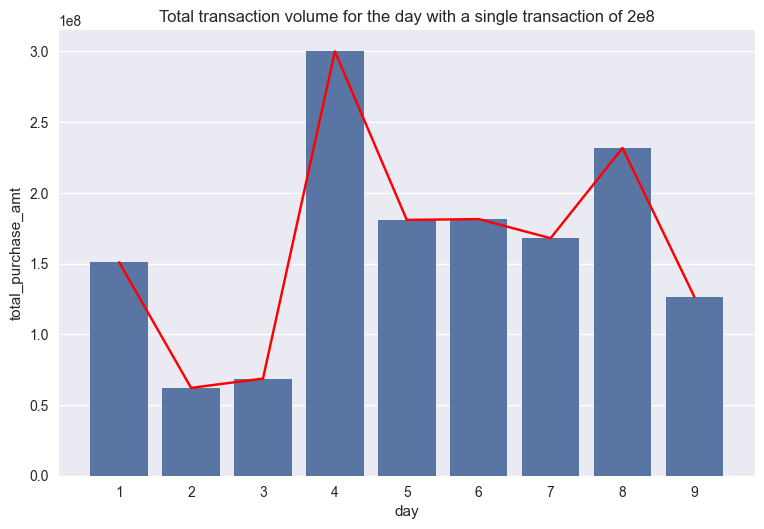

In [114]:
# Draw the total traansaction volume for the day with a single transaction of 2e8 and its surrounding days. 
e2 = total_balance[(total_balance['date'] >= datetime.date(2013,11,1)) & (total_balance['date'] < datetime.date(2013,11,10))]
e2['day'] = e2['day'].astype(str) 
ax = sns.barplot(x="day", y="total_purchase_amt", data=e2)
ax = sns.lineplot(x="day", y="total_purchase_amt", data=e2,color='red')
plt.title("Total transaction volume for the day with a single transaction of 2e8")
ax.legend()

Text(0.5, 1.0, 'The Biggest transaction happend in each day')

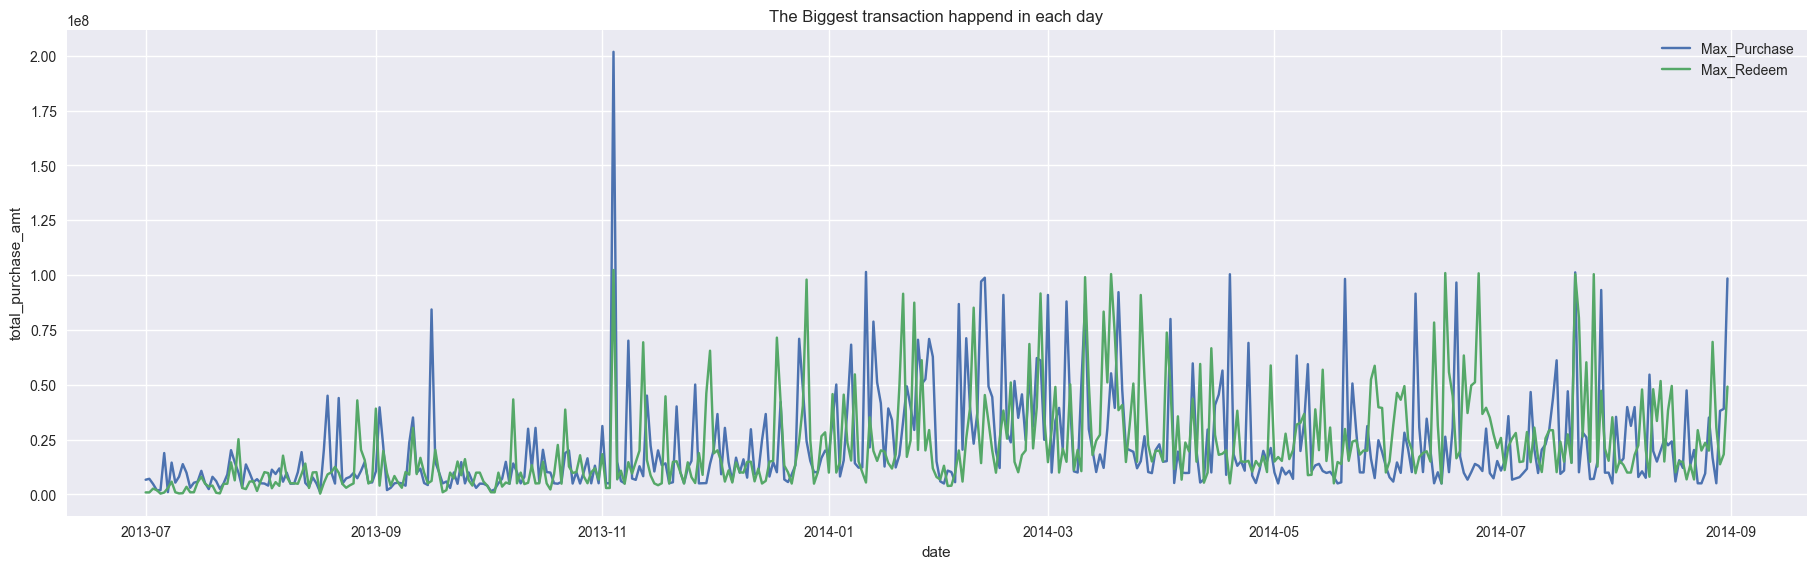

In [115]:
# Draw the time series chart of the largest single transaction each day 
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='Max_Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='Max_Redeem')
plt.title("The Biggest transaction happend in each day")

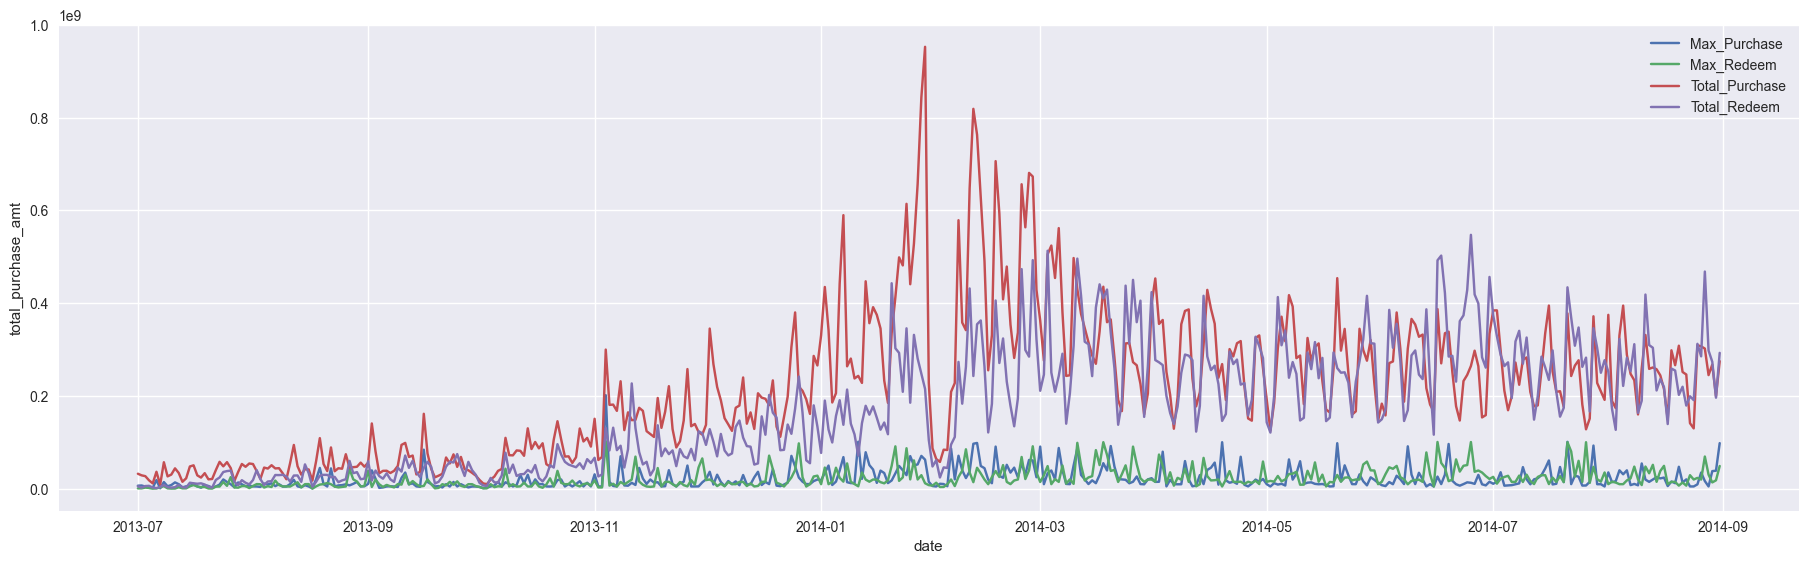

In [116]:
# Draw the time series chart of the largest single transaction and total transaction amount each day
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='Max_Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='Max_Redeem')
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).sum(), label='Total_Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).sum(), label='Total_Redeem')

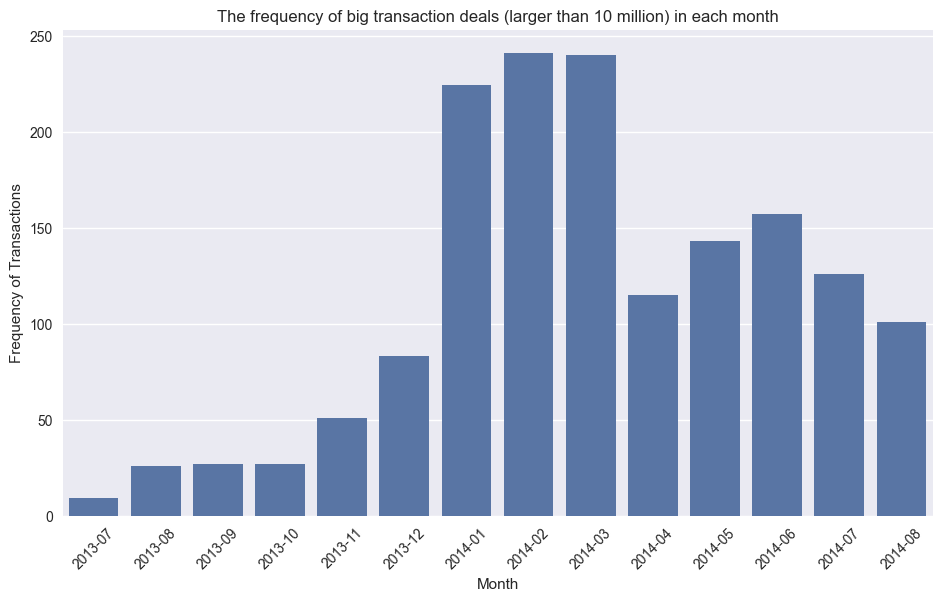

In [123]:
# Draw a histogram of the frequency of large transactions for each month
big_frequancy = data_balance[(data_balance['total_purchase_amt'] > 10000000) | (data_balance['total_redeem_amt'] > 10000000)][['month','year','user_id']].groupby(['year','month'], as_index=False).count()

big_frequancy['date'] = pd.to_datetime(big_frequancy[['year', 'month']].assign(DAY=1))
big_frequancy.rename(columns={'user_id': 'frequency'}, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(x="date", y="frequency", data=big_frequancy, ax=ax)

ax.set_xticklabels([pd.to_datetime(date).strftime('%Y-%m') for date in big_frequancy['date']], rotation=45)

plt.title("The frequency of big transaction deals (larger than 10 million) in each month")
plt.xlabel('Month')
plt.ylabel('Frequency of Transactions')
plt.xticks(rotation=45)

plt.show()

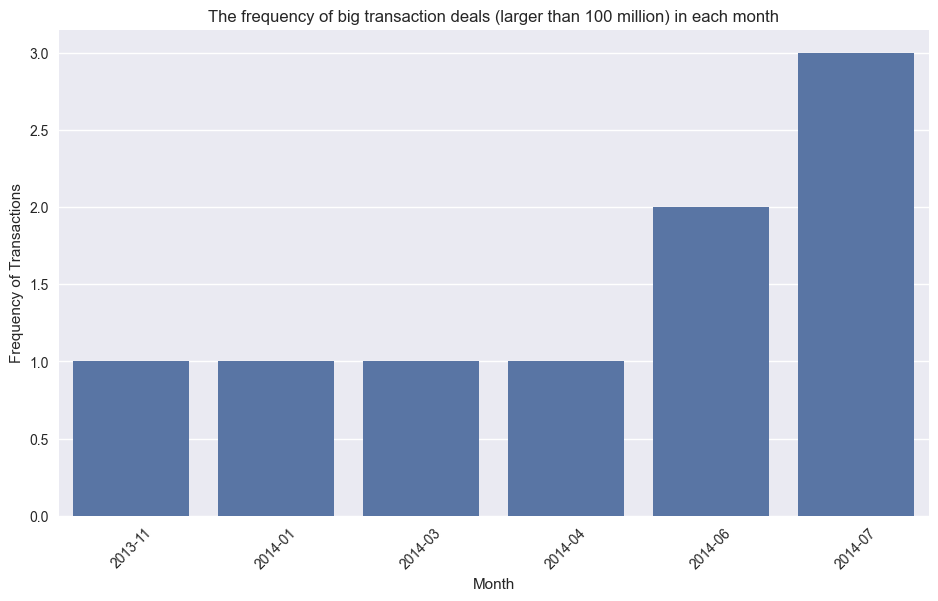

In [124]:
# Draw a histogram of the frequency of large transactions for each month
big_frequancy = data_balance[(data_balance['total_purchase_amt'] > 100000000) | (data_balance['total_redeem_amt'] > 100000000)][['month','year','user_id']].groupby(['year','month'], as_index=False).count()

big_frequancy['date'] = pd.to_datetime(big_frequancy[['year', 'month']].assign(DAY=1))
big_frequancy.rename(columns={'user_id': 'frequency'}, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6)) 
sns.barplot(x="date", y="frequency", data=big_frequancy, ax=ax)

ax.set_xticklabels([pd.to_datetime(date).strftime('%Y-%m') for date in big_frequancy['date']], rotation=45)

plt.title("The frequency of big transaction deals (larger than 100 million) in each month")
plt.xlabel('Month')
plt.ylabel('Frequency of Transactions')
plt.xticks(rotation=45)

plt.show()

As we can see from the two plots, it appears that large trasnaction exceeding 100 million are relatively infrequent events. Focusing on these transactions might not yield significant insights into the overall transaction patterns due to scarcity. 

In [125]:
# Obtain big transaction data
data_balance['big_purchase'] = data_balance['total_purchase_amt'].apply(lambda x: 1 if x>1000000 else 0)
data_balance['big_redeem'] = data_balance['total_redeem_amt'].apply(lambda x: 1 if x>1000000 else 0)

In [126]:
big_purchase = data_balance[data_balance['big_purchase'] == 1].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
small_purchase = data_balance[data_balance['big_purchase'] == 0].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
big_redeem = data_balance[data_balance['big_redeem'] == 1].groupby(['date'], as_index=False)['total_redeem_amt'].sum()
small_redeem = data_balance[data_balance['big_redeem'] == 0].groupby(['date'], as_index=False)['total_redeem_amt'].sum()

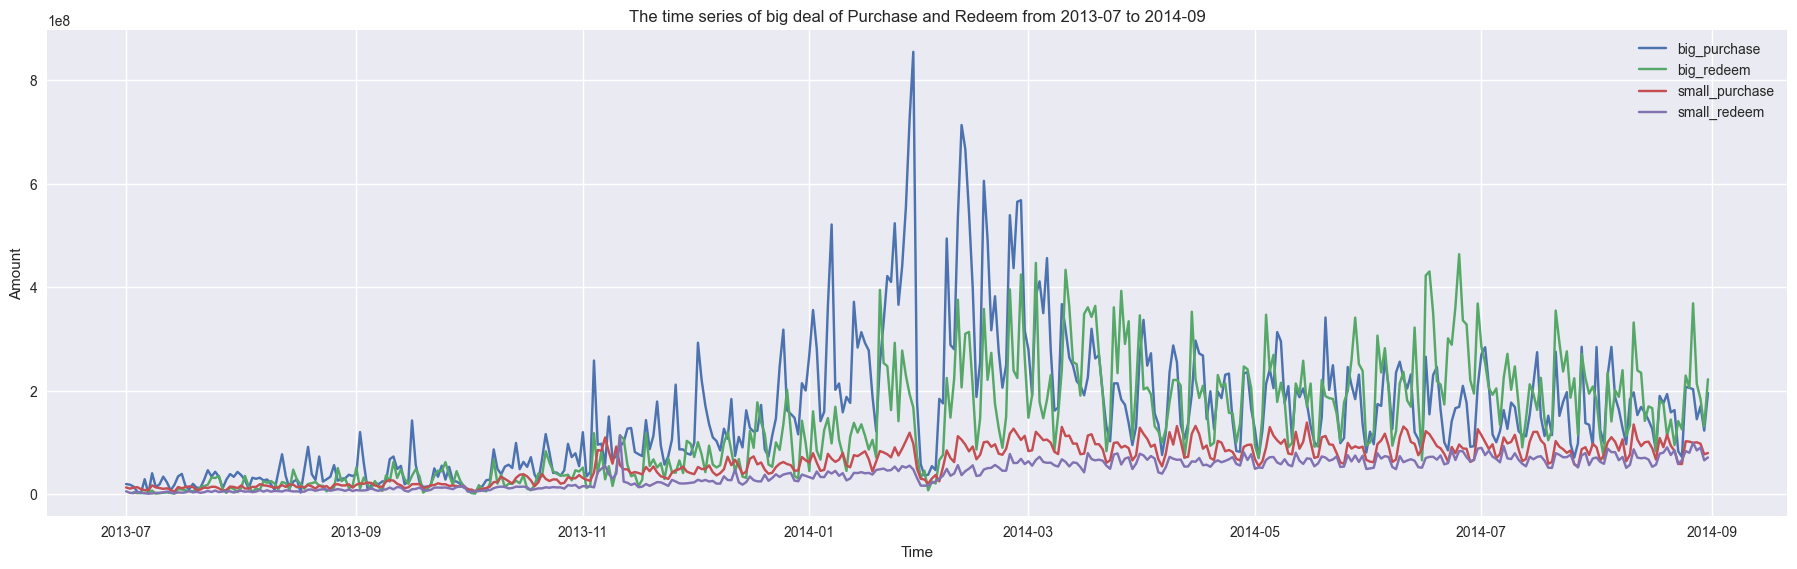

In [127]:
fig = plt.figure(figsize=(20,6))
plt.plot(big_purchase['date'], big_purchase['total_purchase_amt'],label='big_purchase')
plt.plot(big_redeem['date'], big_redeem['total_redeem_amt'],label='big_redeem')

plt.plot(small_purchase['date'], small_purchase['total_purchase_amt'],label='small_purchase')
plt.plot(small_redeem['date'], small_redeem['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big deal of Purchase and Redeem from 2013-07 to 2014-09")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

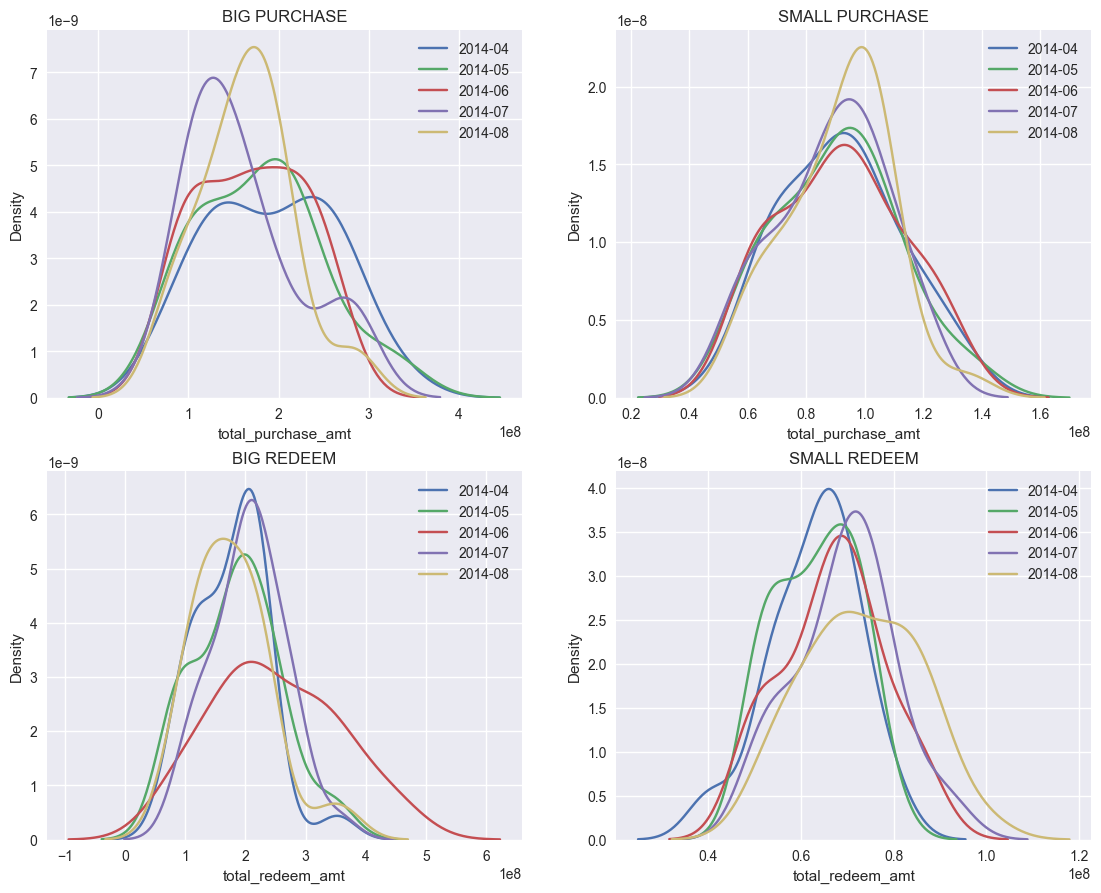

In [128]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
big_purchase.date = big_purchase.date.dt.date
for i in range(4, 9):
    sns.kdeplot(big_purchase[(big_purchase['date'] >= datetime.date(2014,i,1)) & (big_purchase['date'] < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='2014-0'+str(i))
plt.title('BIG PURCHASE')
plt.legend()

plt.subplot(2,2,2)
small_purchase.date = small_purchase.date.dt.date
for i in range(4, 9):
    sns.kdeplot(small_purchase[(small_purchase['date'] >= datetime.date(2014,i,1)) & (small_purchase['date'] < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='2014-0'+str(i))
plt.title('SMALL PURCHASE')
plt.legend()

plt.subplot(2,2,3)
big_redeem.date = big_redeem.date.dt.date
for i in range(4, 9):
    sns.kdeplot(big_redeem[(big_redeem['date'] >= datetime.date(2014,i,1)) & (big_redeem['date'] < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='2014-0'+str(i))
plt.title('BIG REDEEM')
plt.legend()

plt.subplot(2,2,4)
small_redeem.date = small_redeem.date.dt.date
for i in range(4, 9):
    sns.kdeplot(small_redeem[(small_redeem['date'] >= datetime.date(2014,i,1)) & (small_redeem['date'] < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='2014-0'+str(i))
plt.title('SMALL REDEEM')
plt.legend()

In [129]:
big_purchase['weekday'] = pd.to_datetime(big_purchase['date']).dt.weekday
small_purchase['weekday'] = pd.to_datetime(small_purchase['date']).dt.weekday
big_redeem['weekday'] = pd.to_datetime(big_redeem['date']).dt.weekday
small_redeem['weekday'] = pd.to_datetime(small_redeem['date']).dt.weekday

Text(0.5, 1.0, 'SMALL REDEEM')

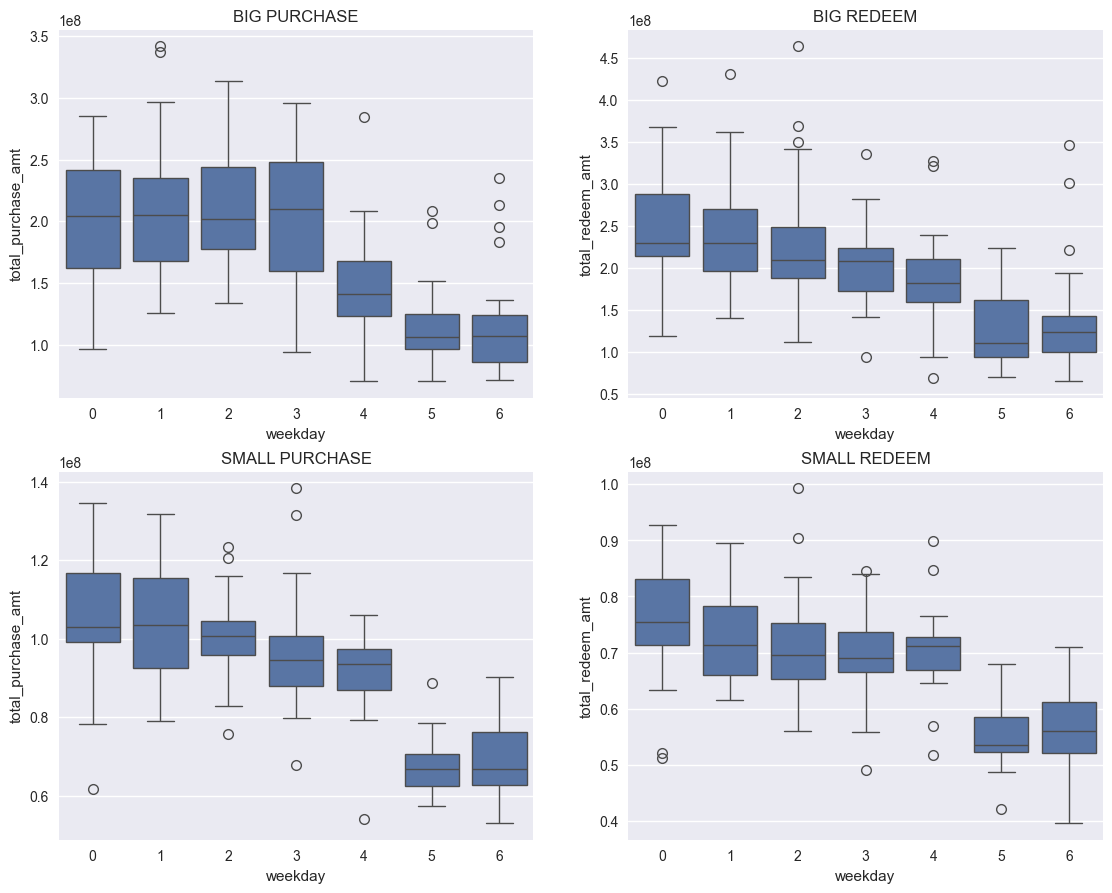

In [130]:
plt.figure(figsize=(12, 10))

ax = plt.subplot(2,2,1)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=big_purchase[big_purchase['date'] >= datetime.date(2014,4,1)])
plt.title('BIG PURCHASE')

ax = plt.subplot(2,2,2)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=big_redeem[big_redeem['date'] >= datetime.date(2014,4,1)])
plt.title('BIG REDEEM')

ax = plt.subplot(2,2,3)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=small_purchase[small_purchase['date'] >= datetime.date(2014,4,1)])
plt.title('SMALL PURCHASE')

ax = plt.subplot(2,2,4)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=small_redeem[small_redeem['date'] >= datetime.date(2014,4,1)])
plt.title('SMALL REDEEM')

# Analyze other variables in the user transaction table.

In [131]:
data_balance_1 = data_balance[data_balance['date'] > datetime.datetime(2014,4,1)]

Text(0.5, 1.0, 'The coleration between each feature in User_Balance_Table')

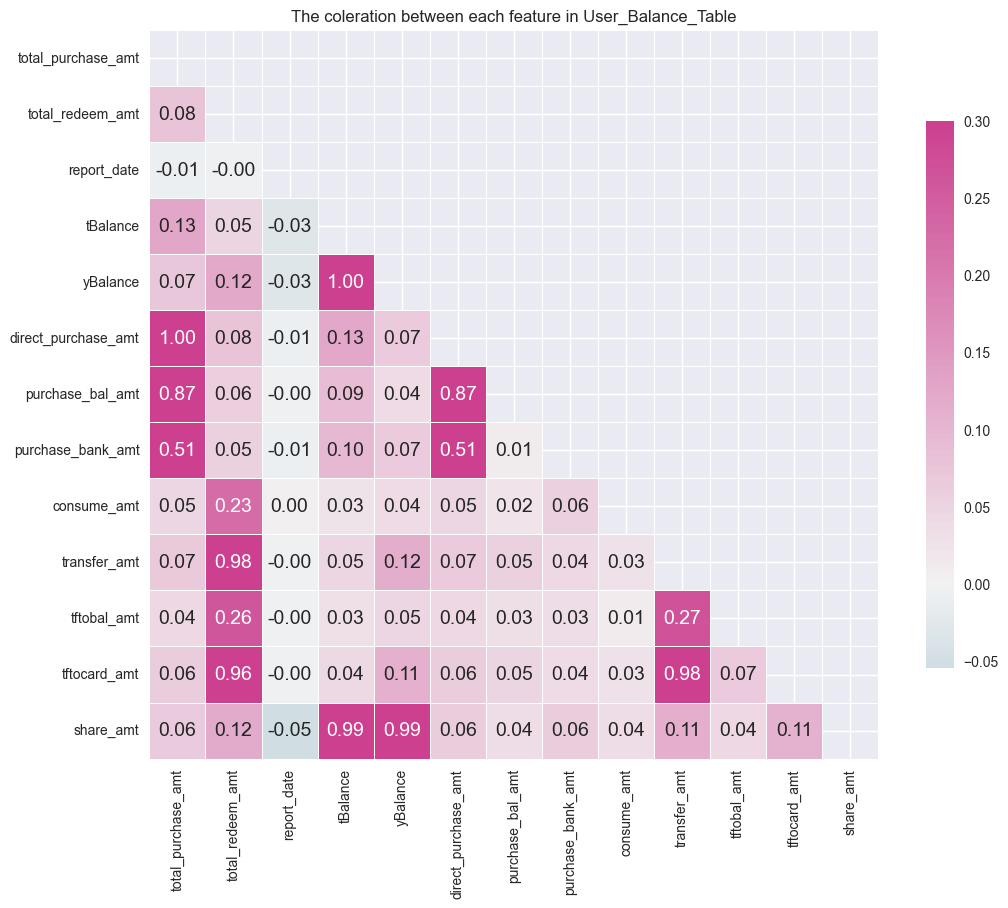

In [132]:
feature = ['total_purchase_amt','total_redeem_amt', 'report_date', 'tBalance', 'yBalance',
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
        'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt']
corr_mat = data_balance_1[feature].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, -20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75},annot=True,fmt='.2f')

plt.title("The coleration between each feature in User_Balance_Table")


# Analysis of interest rates for bank and Yu'E Bao

In [133]:
# Adding date information in the bank dataset
bank = bank.rename(columns = {'mfd_date': 'date'})
bank_features = [x for x in bank.columns if x not in ['date']]
bank['date'] = pd.to_datetime(bank['date'], format= "%Y%m%d")
bank['day'] = bank['date'].dt.day
bank['month'] = bank['date'].dt.month
bank['year'] = bank['date'].dt.year
bank['week'] = bank['date'].dt.week
bank['weekday'] = bank['date'].dt.weekday

In [134]:
# Adding date information in the shares dataset
share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

<Axes: title={'center': 'The Correlation between each lastday bank rate and total redeem'}>

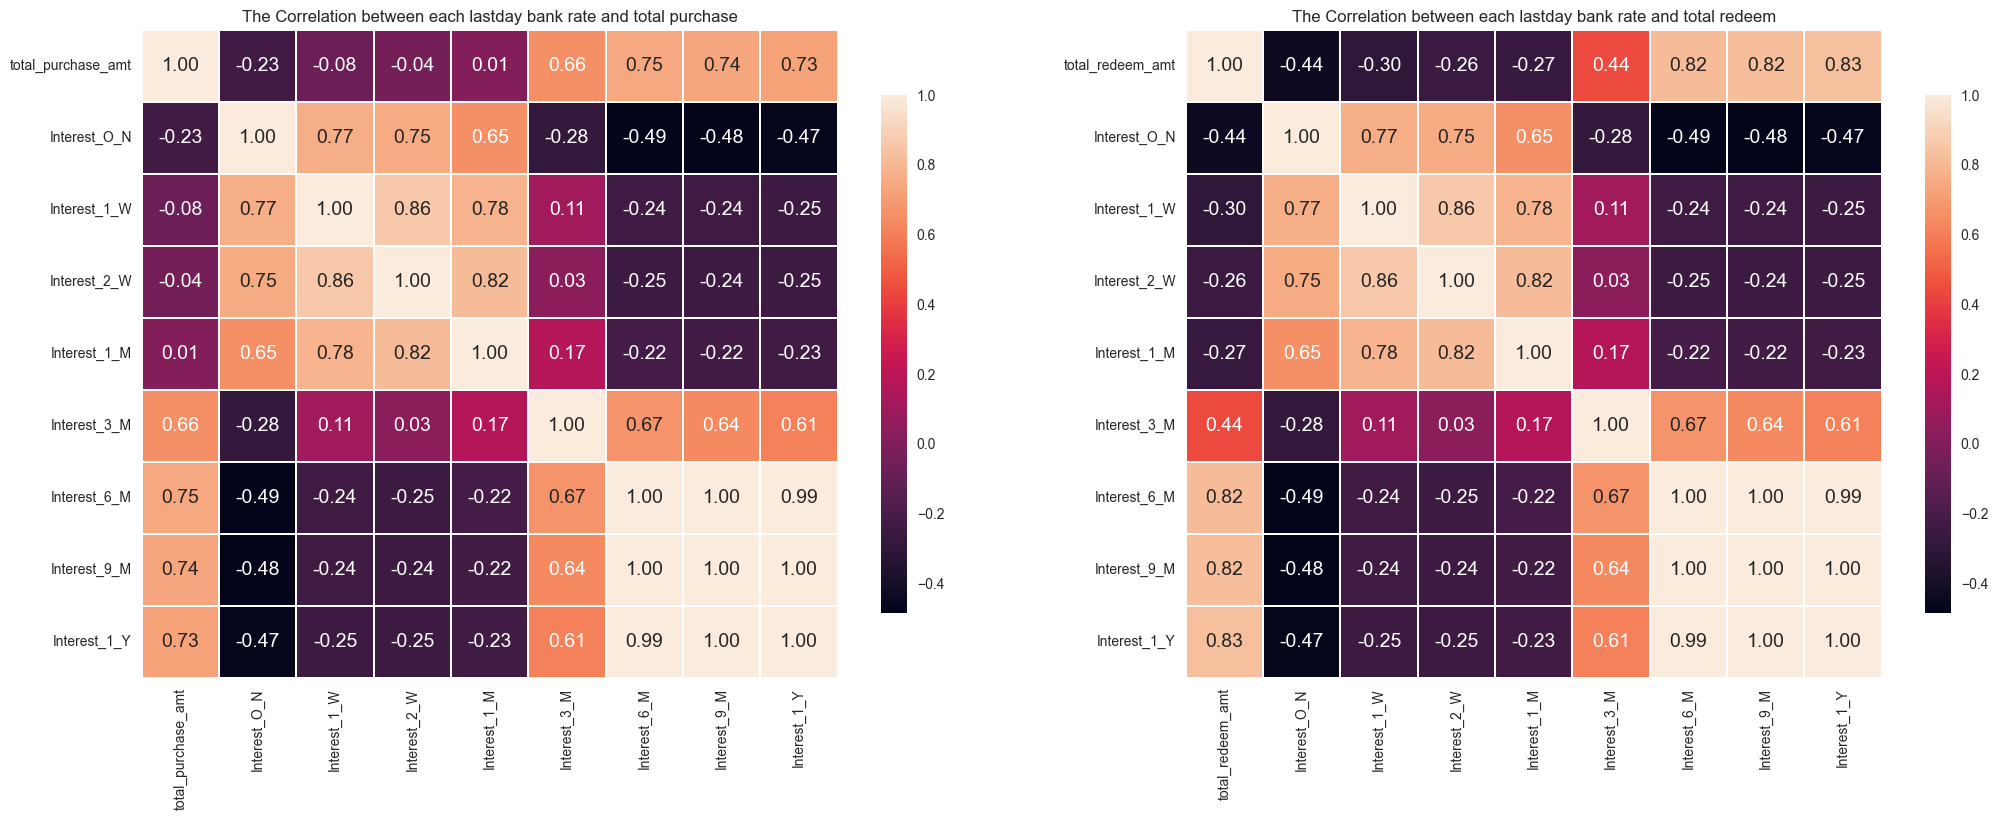

In [179]:
# Correlation graph between previous day's bank rate and Yu'e Bao
bank['last_date'] = bank['date'] + datetime.timedelta(days=-1)
bank['last_date'] = bank['last_date'].dt.date
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.title("The Correlation between each lastday bank rate and total purchase")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .80},annot=True,fmt='.2f')
plt.subplot(1,2,2)
plt.title("The Correlation between each lastday bank rate and total redeem")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .80},annot=True,fmt='.2f')


In [73]:
bank.head()

date  Interest_O_N  Interest_1_W  Interest_2_W  Interest_1_M  \
0 2013-07-01         4.456         5.423         6.040        6.8800   
1 2013-07-02         3.786         4.750         5.074        5.8000   
2 2013-07-03         3.400         4.242         4.658        5.2000   
3 2013-07-04         3.348         3.938         4.464        5.1020   
4 2013-07-05         3.380         3.816         4.295        4.7885   

   Interest_3_M  Interest_6_M  Interest_9_M  Interest_1_Y  day  month  year  \
0         5.295        4.2390        4.2820        4.4125    1      7  2013   
1         5.211        4.2344        4.2808        4.4070    2      7  2013   
2         5.148        4.2300        4.2796        4.4022    3      7  2013   
3         5.029        4.2287        4.2776        4.4000    4      7  2013   
4         4.939        4.2273        4.2749        4.4000    5      7  2013   

   week  weekday   last_date  
0    27        0  2013-06-30  
1    27        1  2013-07-01  
2    27        2  2013-07-02  
3    27        3  2013-07-03  
4    27        4  2013-07-04

<Axes: title={'center': 'The Correlation of Big redeem'}>

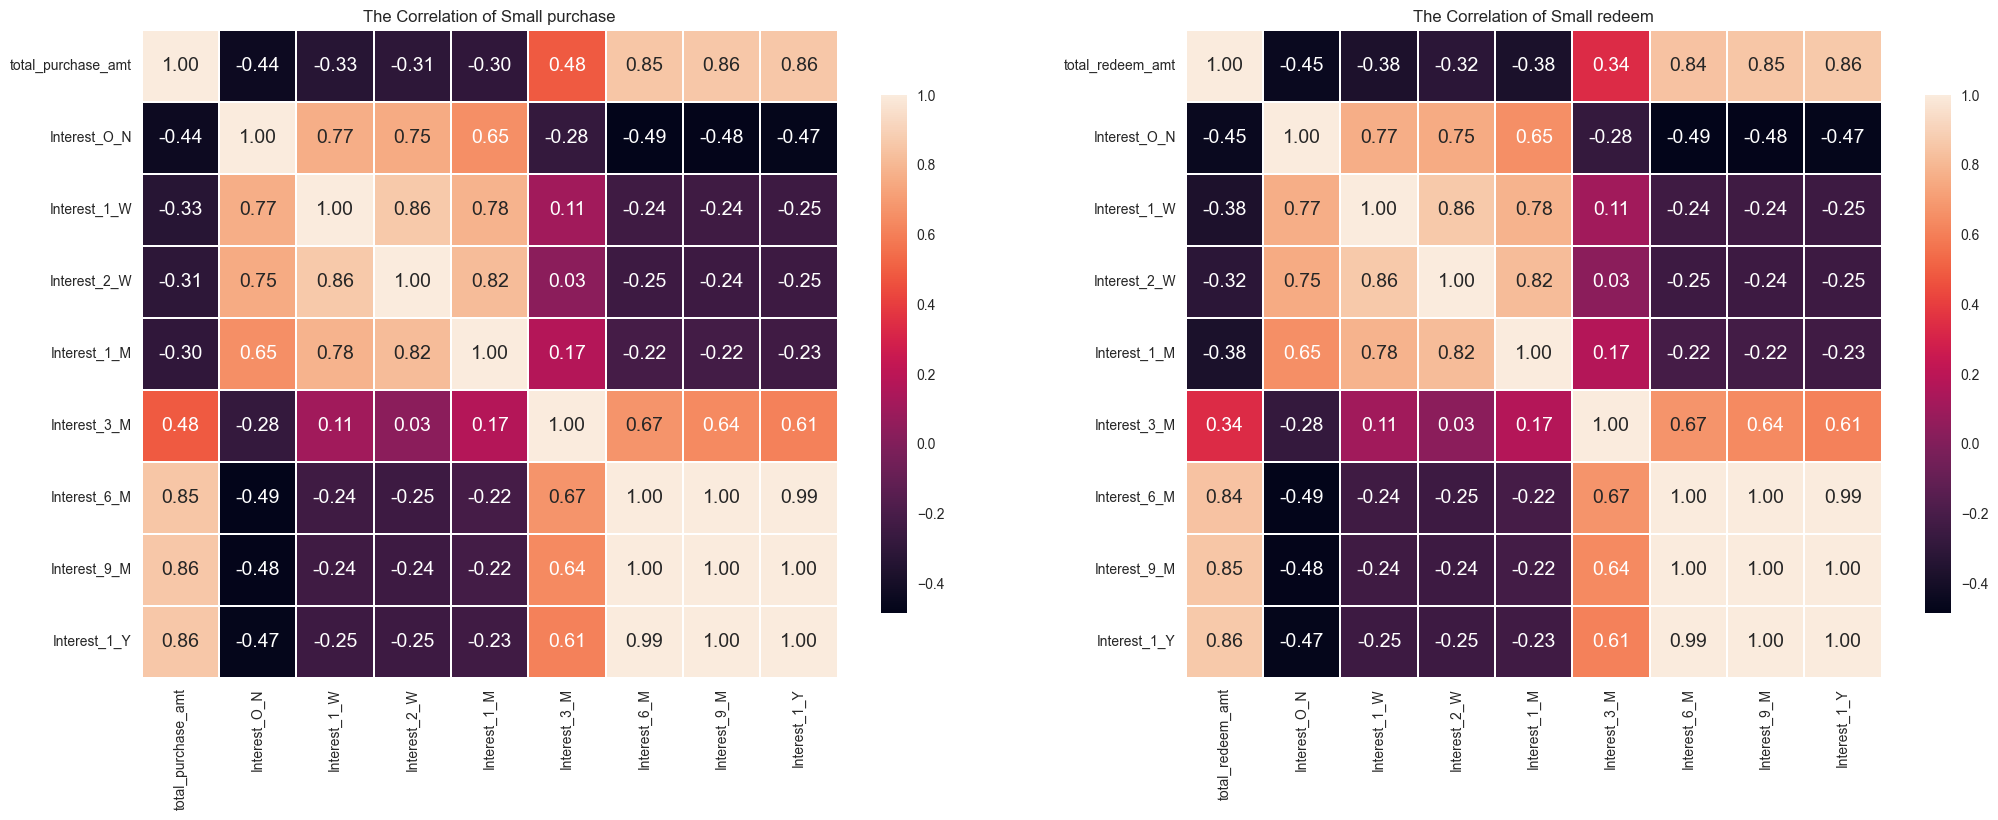

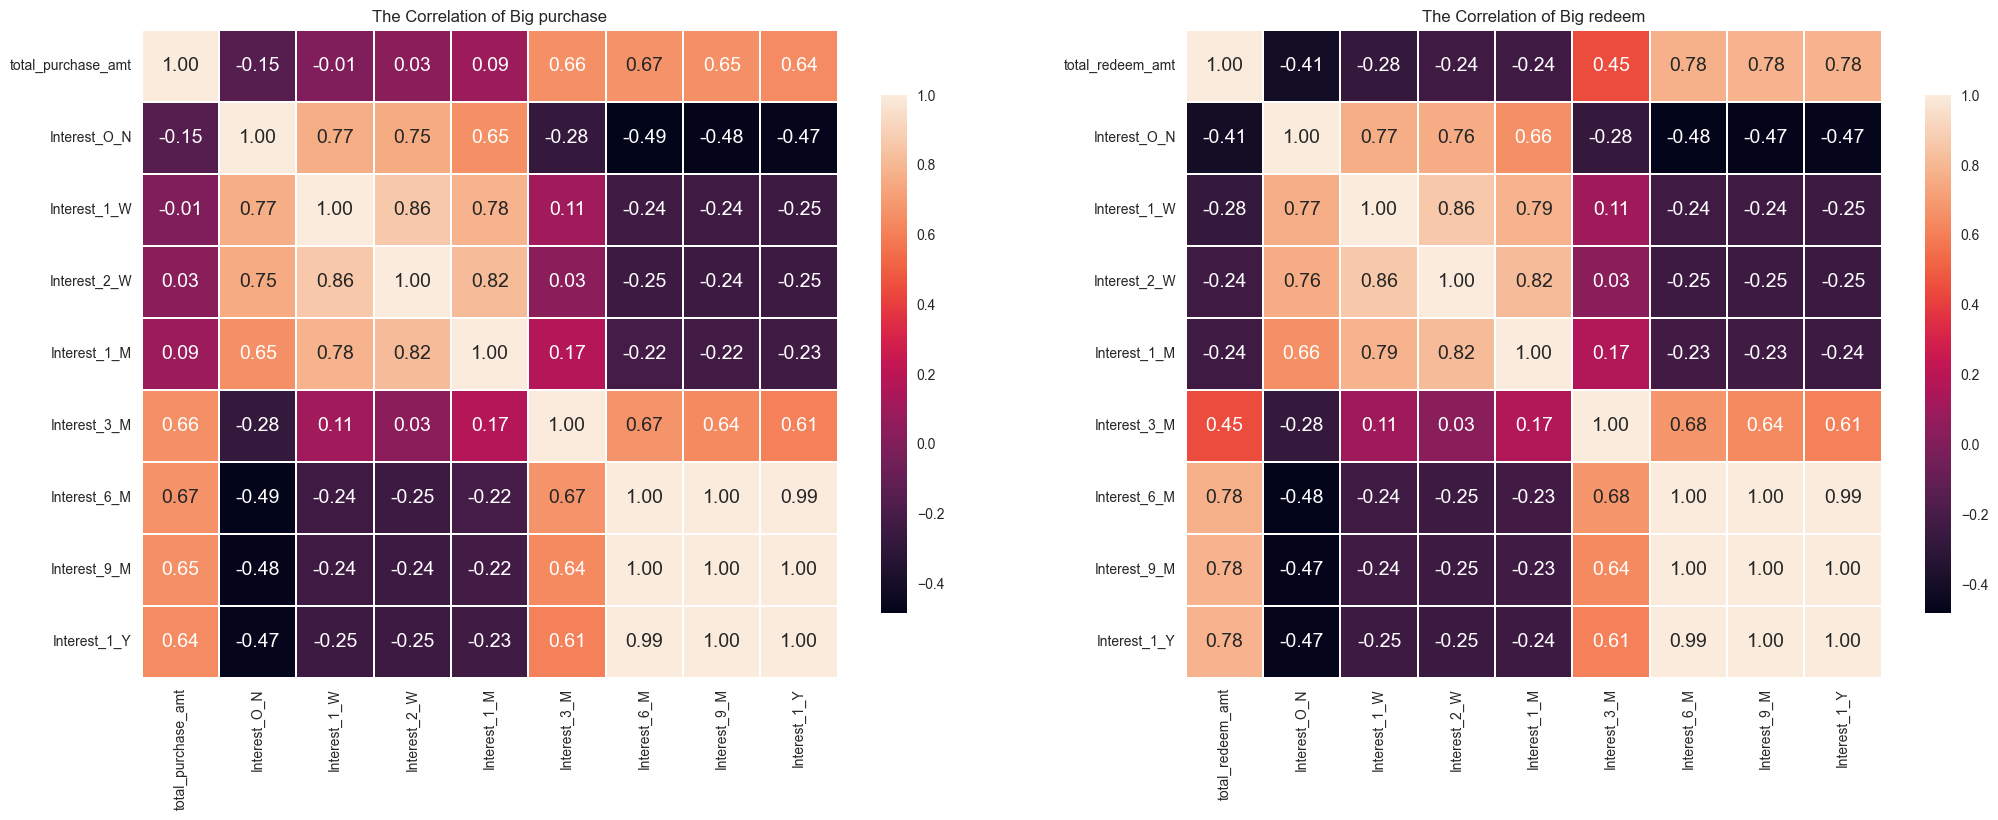

In [178]:
# Draw the correlation with large and small amounts
bank['last_date'] = bank['date'] + datetime.timedelta(days=-1)
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.title("The Correlation of Small purchase")
small_purchase.date = pd.to_datetime(small_purchase.date)
temp = pd.merge(bank[['last_date']+bank_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .80},annot=True,fmt='.2f')
plt.subplot(1,2,2)
plt.title("The Correlation of Small redeem")
small_redeem.date = pd.to_datetime(small_redeem.date)
temp = pd.merge(bank[['last_date']+bank_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .80},annot=True,fmt='.2f')

bank['last_date'] = bank['date'] + datetime.timedelta(days=-1)
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.title("The Correlation of Big purchase")
big_purchase.date = pd.to_datetime(big_purchase.date)
temp = pd.merge(bank[['last_date']+bank_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .80},annot=True,fmt='.2f')
plt.subplot(1,2,2)
plt.title("The Correlation of Big redeem")
big_redeem.date = pd.to_datetime(big_redeem.date)
temp = pd.merge(bank[['last_date']+bank_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .80},annot=True,fmt='.2f')

Text(0, 0.5, 'Rate')

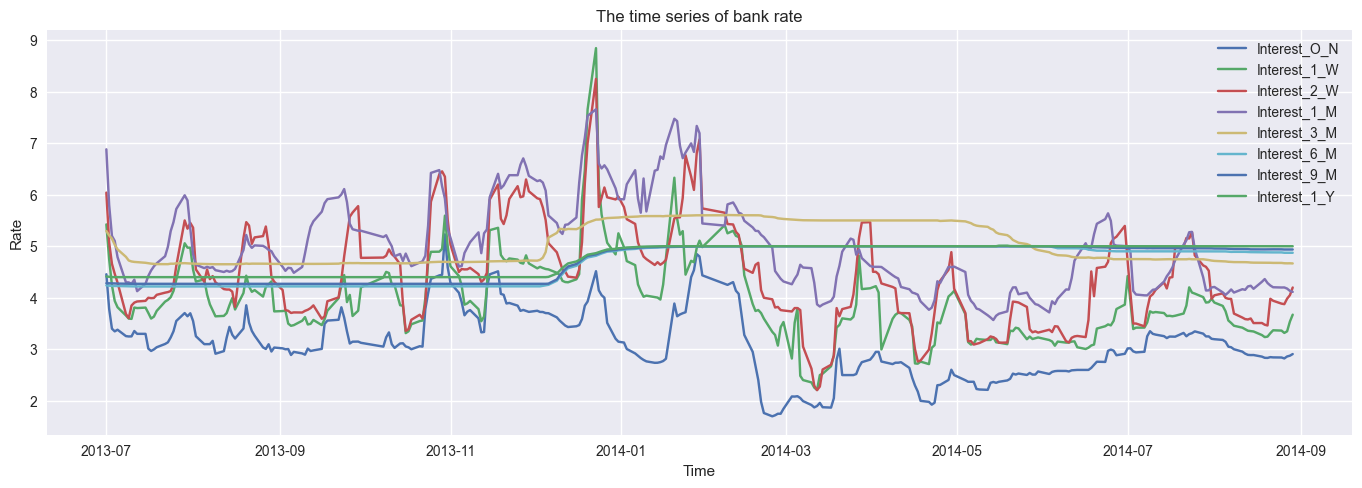

In [143]:
# Draw a time series graph of interest rates
plt.figure(figsize=(15,5))
for i in bank_features:
    plt.plot(bank['date'], bank[[i]] ,label=i)
plt.legend()
plt.title("The time series of bank rate")
plt.xlabel("Time")
plt.ylabel("Rate")

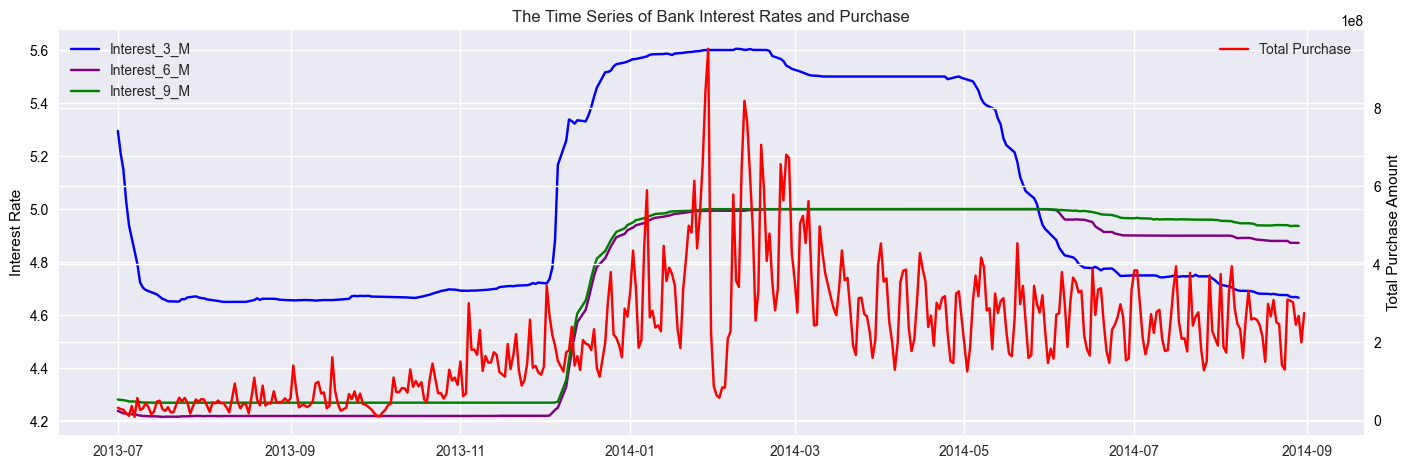

In [175]:
# Draw some rates

fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(bank['date'], bank['Interest_3_M'], 'b', label="Interest_3_M")
ax1.plot(bank['date'], bank['Interest_6_M'], 'purple', label="Interest_6_M")
ax1.plot(bank['date'], bank['Interest_9_M'], 'g', label="Interest_9_M")
ax1.set_ylabel("Interest Rate", color='black') 
ax1.tick_params(axis='y', labelcolor='black') 
ax1.legend(loc='upper left')

# Creating a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(total_balance['date'], total_balance['total_purchase_amt'], 'r', label="Total Purchase")
ax2.set_ylabel("Total Purchase Amount", color='black') 
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Title and x-axis label
plt.title("The Time Series of Bank Interest Rates and Purchase")
plt.xlabel("Time")

plt.show()

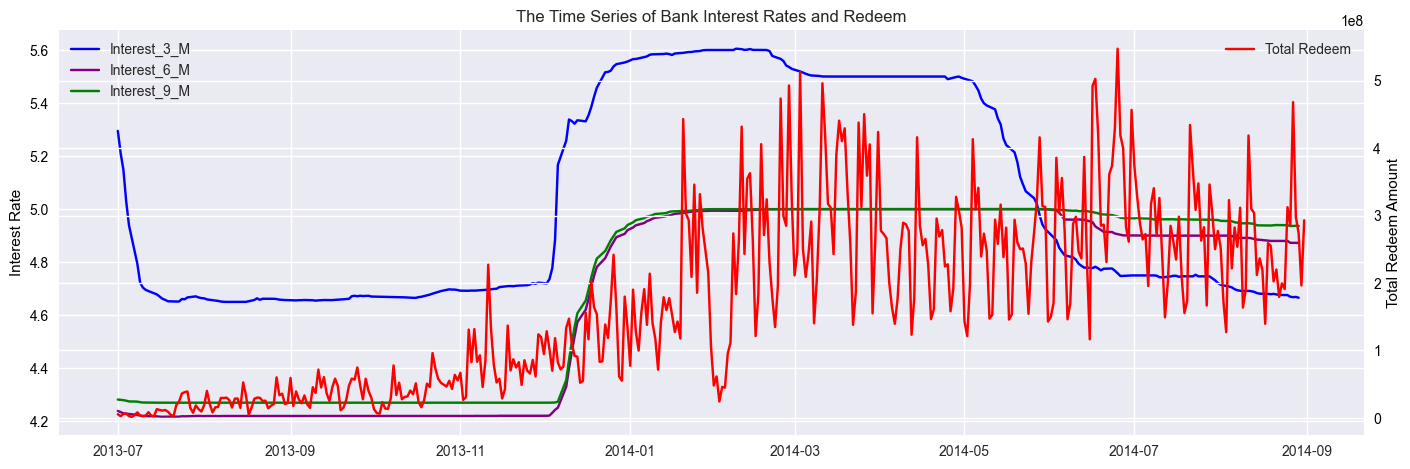

In [174]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(bank['date'], bank['Interest_3_M'], 'b', label="Interest_3_M")
ax1.plot(bank['date'], bank['Interest_6_M'], 'purple', label="Interest_6_M")
ax1.plot(bank['date'], bank['Interest_9_M'], 'g', label="Interest_9_M")
ax1.set_ylabel("Interest Rate", color='black') 
ax1.tick_params(axis='y', labelcolor='black') 
ax1.legend(loc='upper left')

# Creating a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(total_balance['date'], total_balance['total_redeem_amt'], 'r', label="Total Redeem")
ax2.set_ylabel("Total Redeem Amount", color='black') 
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Title and x-axis label
plt.title("The Time Series of Bank Interest Rates and Redeem")
plt.xlabel("Time")

plt.show()

## Yu'E Bao

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'total_redeem_amt'),
  Text(0, 1.5, 'mfd_daily_yield'),
  Text(0, 2.5, 'mfd_7daily_yield')])

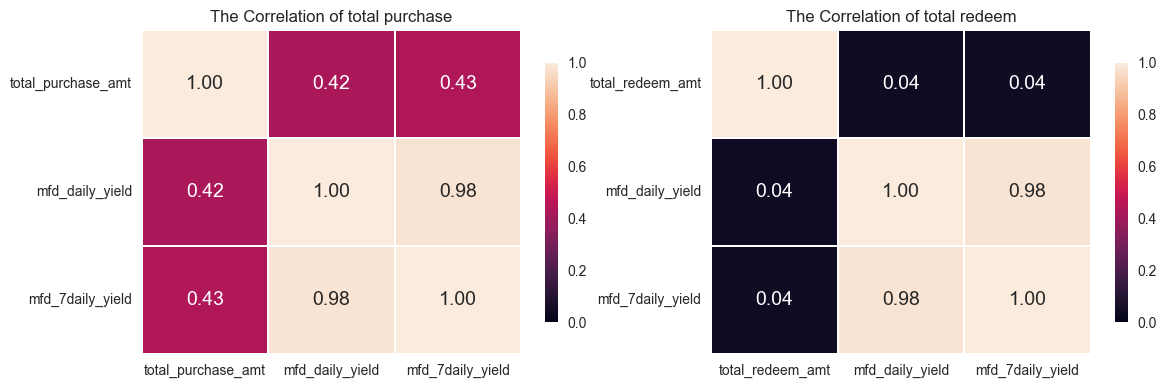

In [183]:
# Correlation with yesterday date
share['last_date'] = share['date'] + datetime.timedelta(days=-1)
share['last_date'] = share['last_date'].dt.date
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("The Correlation of total purchase")
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,cbar_kws={"shrink":0.80},annot=True,fmt='.2f')
plt.subplot(1,2,2)
plt.title("The Correlation of total redeem")
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,cbar_kws={"shrink":0.80},annot=True,fmt='.2f')
plt.yticks(rotation=0)

<Axes: title={'center': 'The Correlation of total redeem'}>

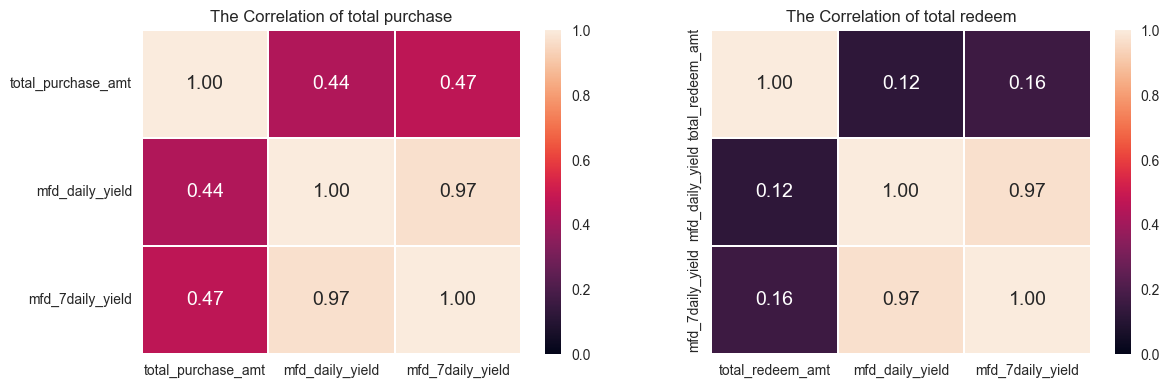

In [184]:
# Correlation with last week weekday 
share['last_week'] = share['week'] - 1
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("The Correlation of total purchase")
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,annot=True,fmt='.2f')
plt.subplot(1,2,2)
plt.title("The Correlation of total redeem")
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,annot=True,fmt='.2f')

In [158]:
share_features

['mfd_daily_yield', 'mfd_7daily_yield']

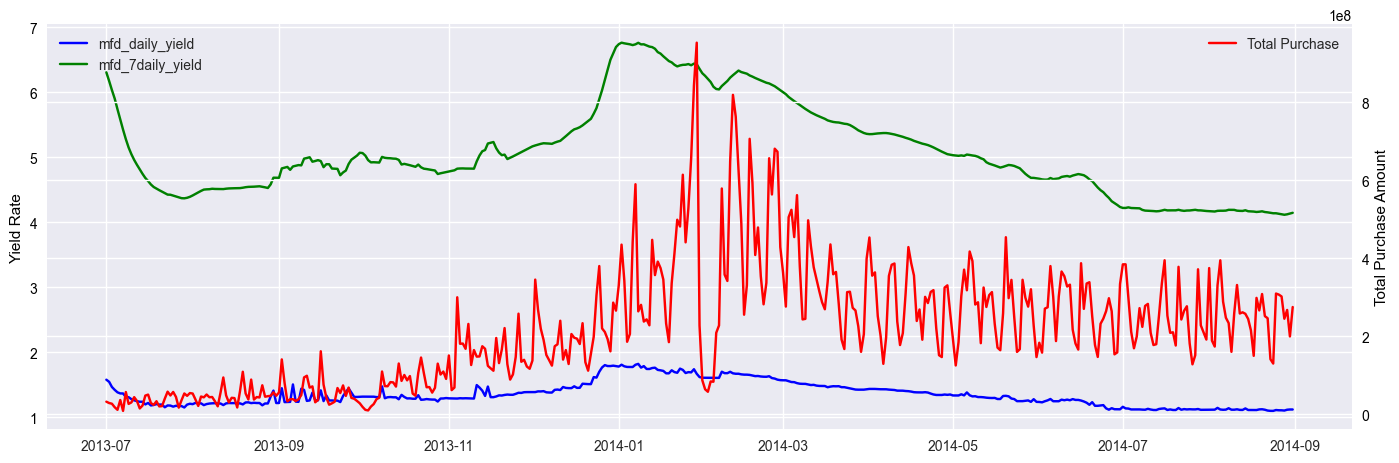

In [172]:
# Rates and total purchase
fig,ax1 = plt.subplots(figsize=(15,5))
ax1.plot(share['date'], share['mfd_daily_yield'], 'b', label="mfd_daily_yield")
ax1.plot(share['date'], share['mfd_7daily_yield'], 'g', label="mfd_7daily_yield")

ax1.set_ylabel("Yield Rate", color='black') 
ax1.tick_params(axis='y', labelcolor='black') 
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(total_balance['date'], total_balance['total_purchase_amt'], 'r', label="Total Purchase")
ax2.set_ylabel("Total Purchase Amount", color='black') 
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.show()


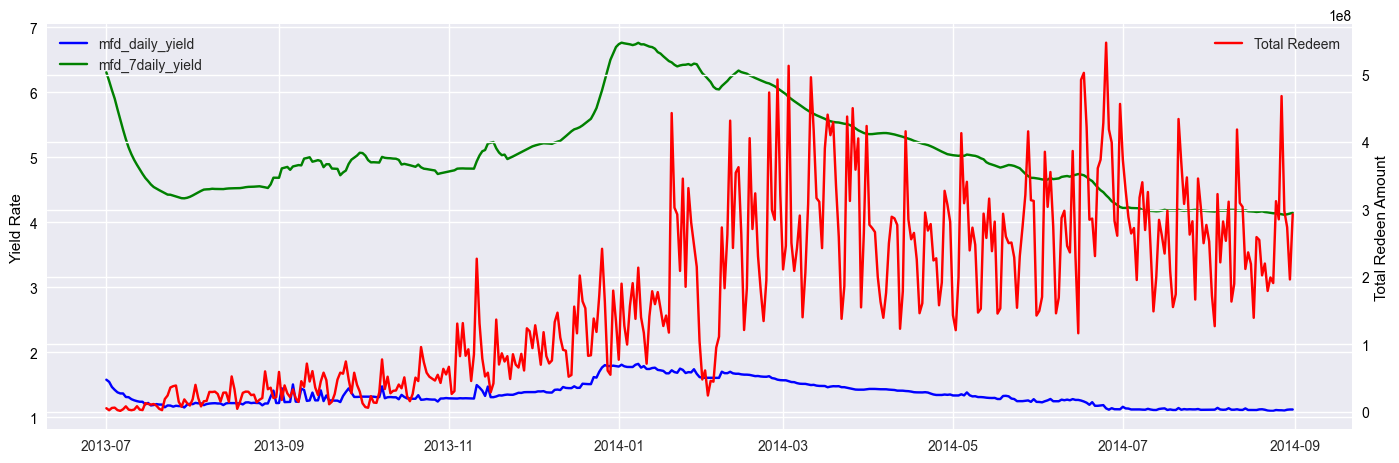

In [176]:
# Rates and total redeem
fig,ax1 = plt.subplots(figsize=(15,5))
ax1.plot(share['date'], share['mfd_daily_yield'], 'b', label="mfd_daily_yield")
ax1.plot(share['date'], share['mfd_7daily_yield'], 'g', label="mfd_7daily_yield")

ax1.set_ylabel("Yield Rate", color='black') 
ax1.tick_params(axis='y', labelcolor='black') 
ax1.legend(loc='upper left')
ax2=ax1.twinx()
ax2.plot(total_balance['date'], total_balance['total_redeem_amt'], 'r', label="Total Redeem")
ax2.set_ylabel("Total Redeen Amount", color='black') 
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'total_redeem_amt'),
  Text(0, 1.5, 'mfd_daily_yield'),
  Text(0, 2.5, 'mfd_7daily_yield')])

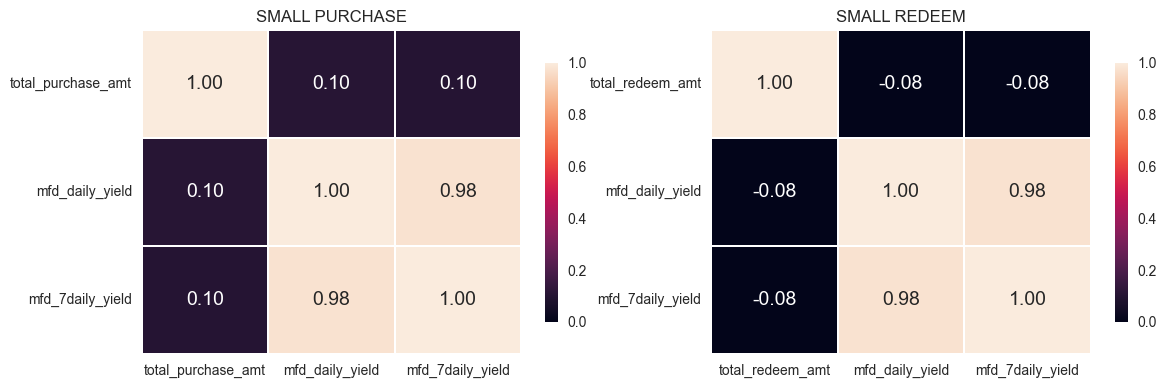

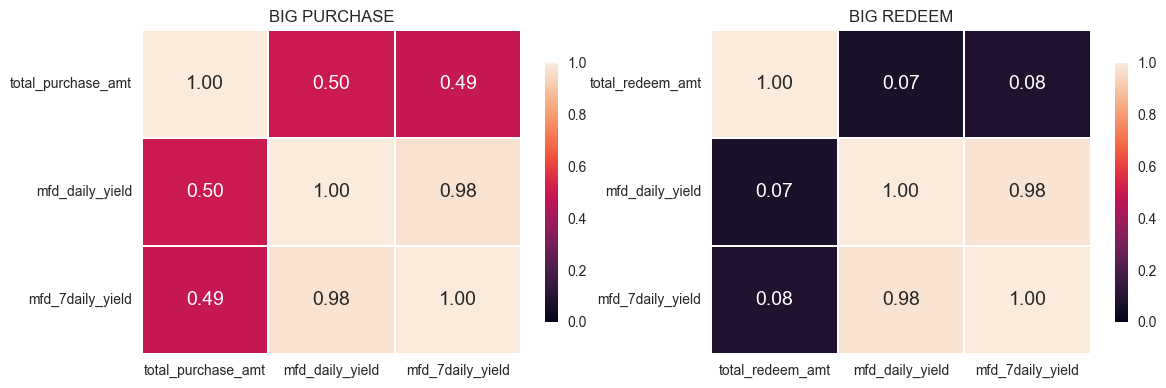

In [186]:
# Correlation graph of big and small purchase and redeem
share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
temp = pd.merge(share[['last_date']+share_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,cbar_kws={"shrink":0.80},annot=True,fmt='.2f')
plt.title("SMALL PURCHASE")
plt.subplot(1,2,2)
plt.title("SMALL REDEEM")
temp = pd.merge(share[['last_date']+share_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,cbar_kws={"shrink":0.80},annot=True,fmt='.2f')
plt.yticks(rotation=0)

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("BIG PURCHASE")
temp = pd.merge(share[['last_date']+share_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,cbar_kws={"shrink":0.80},annot=True,fmt='.2f')
plt.subplot(1,2,2)
plt.title("BIG REDEEM")
temp = pd.merge(share[['last_date']+share_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,cbar_kws={"shrink":0.80},annot=True,fmt='.2f')
plt.yticks(rotation=0)

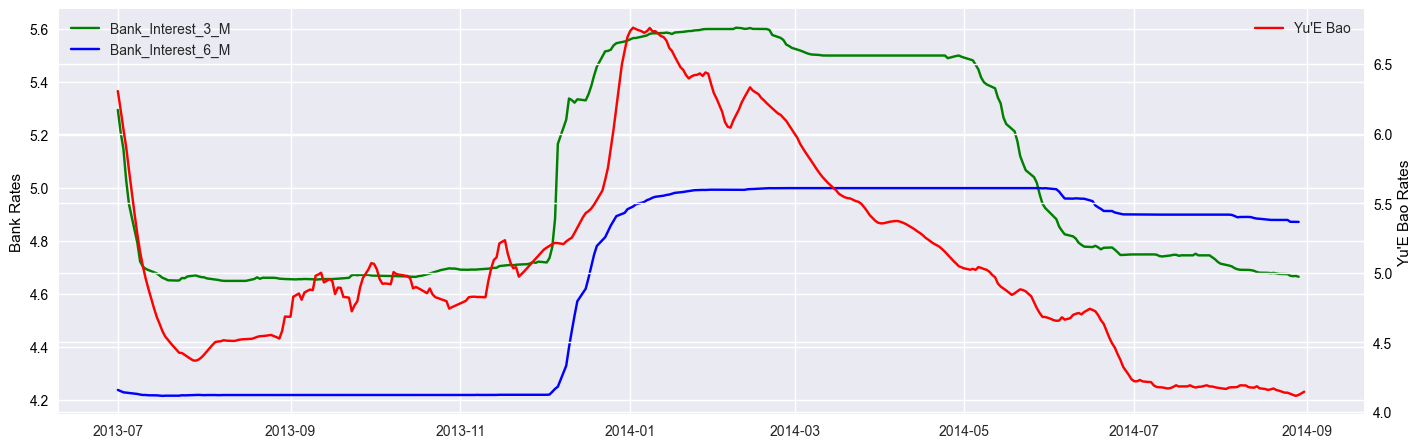

In [192]:
# Compare bank rates and Yu'e Bao rates
fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],c='g',label= 'Bank_Interest_3_M')
plt.plot(bank['date'], bank['Interest_6_M'],c='b',label= 'Bank_Interest_6_M')

ax1.set_ylabel("Bank Rates", color='black') 
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_7daily_yield'],c='red',label="Yu'E Bao")
ax2.set_ylabel("Yu'E Bao Rates", color='black') 
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')
plt.show()

From those plots and graphs:
1. The yield rates from Yu'e Bao are more inclined to influence the Total purchase amount. 
2. The bank interest rates are more inclined to influence the overall Total redemption amount. 
3. Over a longer duration, bank interest rates are more likely to have a significant effect on both purchasing and redemption activities. 

# Analyze users with "Small and Big" Transaction

Some users with very large trasnaction amounts are significant to the daily trading volume. Here, we count the large account users(greater than 1 million) who remain active after April. Notes, the unit is in cents, so 1 million cents is actually 10,000 yuan

In [193]:
# Obtain larger transaction users

temp = data_balance[(data_balance['total_purchase_amt'] >= 1000000) | (data_balance['total_redeem_amt'] >= 1000000)]
big_users_set = set(temp[temp['date'] >= datetime.datetime(2014,4,1)]['user_id'])

In [194]:
len(big_users_set)

3903

In [207]:
data_balance['user_id'].unique().size

28041

In [208]:
len(big_users_set)/data_balance['user_id'].unique().size

0.13918904461324488

There are 3903 users with large transaction, accuunting for 13% of the total. 

In [210]:
data_balance['big_user'] = data_balance['user_id'].apply(lambda x: 1 if x in big_users_set else 0)

In [211]:
# Analyze the difference in daily total transaction amounts between large transaction users and small transaction users. 

total_balance_bigsmall = data_balance.groupby(['date','big_user'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

In [212]:
total_balance_bigsmall

date  big_user  total_purchase_amt  total_redeem_amt
0   2013-07-01         0             4801182            925236
1   2013-07-01         1            27687166           4599786
2   2013-07-02         0             6692332           1944664
3   2013-07-02         1            22345058            609884
4   2013-07-03         0             7027919           1273803
..         ...       ...                 ...               ...
849 2014-08-29         1           239399665         248463115
850 2014-08-30         0            28912056          22062824
851 2014-08-30         1           170796716         174311310
852 2014-08-31         0            28912459          29875528
853 2014-08-31         1           246177754         263067505

[854 rows x 4 columns]

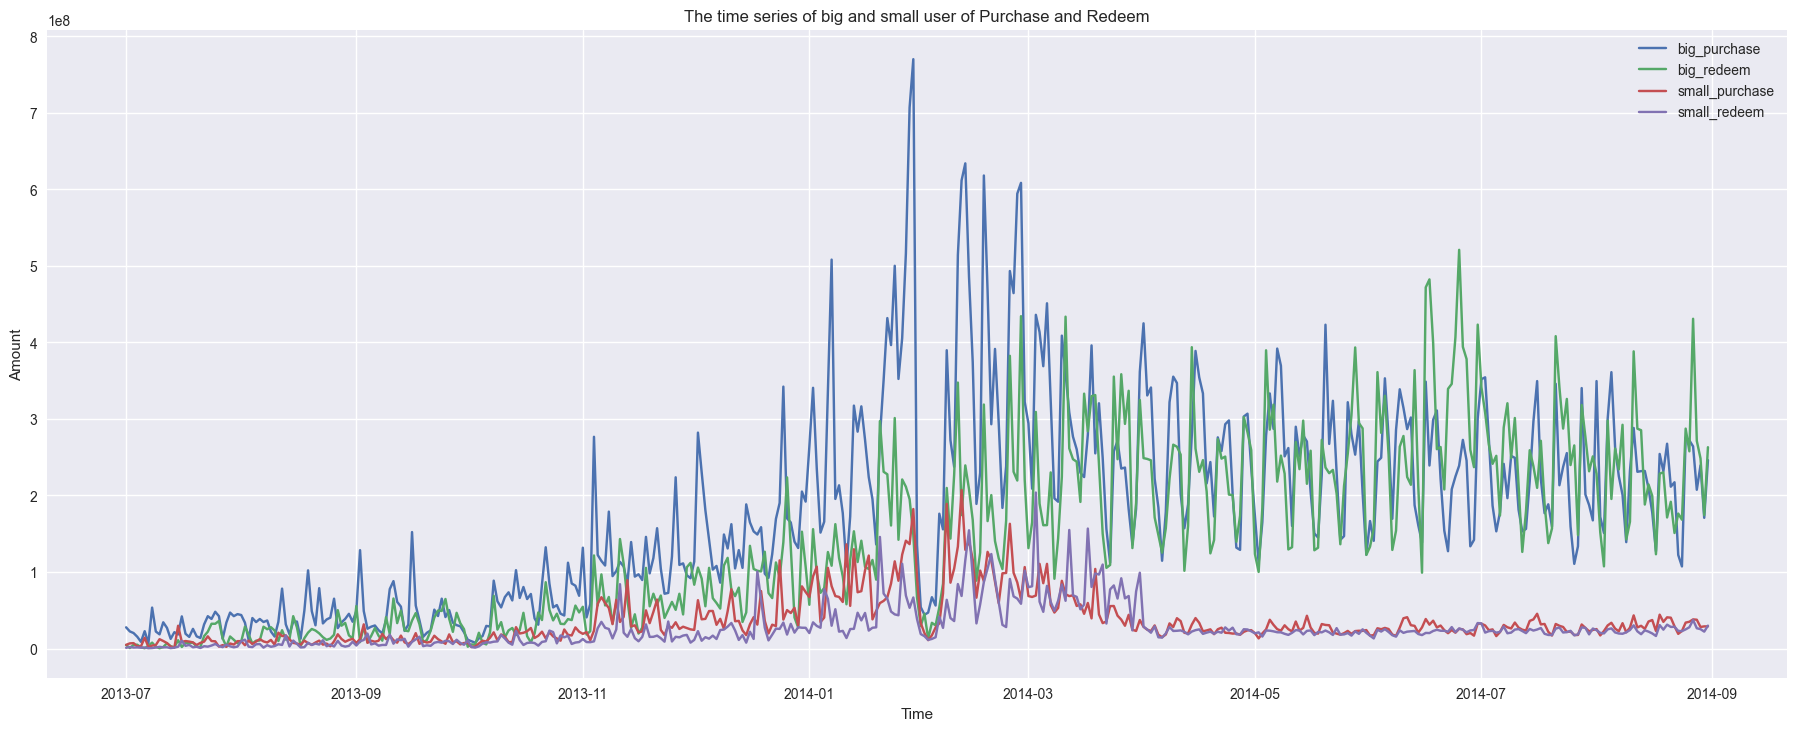

In [213]:
# Draw a graph of the daily total transaction volume for users with large transaction and small transaction 
fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 1]['date'], total_balance_bigsmall[total_balance_bigsmall['big_user'] == 1]['total_purchase_amt'],label='big_purchase')
plt.plot(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 1]['date'], total_balance_bigsmall[total_balance_bigsmall['big_user'] == 1]['total_redeem_amt'],label='big_redeem')

plt.plot(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 0]['date'], total_balance_bigsmall[total_balance_bigsmall['big_user'] == 0]['total_purchase_amt'],label='small_purchase')
plt.plot(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 0]['date'], total_balance_bigsmall[total_balance_bigsmall['big_user'] == 0]['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [214]:
# Proportion of purchase between large and small transaction users
np.sum(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 1]['total_purchase_amt']) / np.sum(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 0]['total_purchase_amt'])

5.1456178397775805

In [215]:
# Proportion of redeem between large and small transaction users
np.sum(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 1]['total_redeem_amt']) / np.sum(total_balance_bigsmall[total_balance_bigsmall['big_user'] == 0]['total_redeem_amt'])

5.422141272341089

# Analyze the transaction frequency of users

In [216]:
data_balance

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0              1     20140805     20385     20383                   2   
1              1     20140808     20391     20389                   2   
2              1     20140811     20397     20395                   2   
3              1     20140814     20403     20401                   2   
4              1     20140817     20409     20407                   2   
...          ...          ...       ...       ...                 ...   
2840416    28033     20140825    550646    550585                  61   
2840417    28033     20140831    525707    538147                  60   
2840418    28033     20140724  20487121  20484824                2297   
2840419    28033     20140727  20462288  20491722                2298   
2840420    28035     20140305         0         0                   0   

         direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
0                          0                 0                  0   
1                          0                 0                  0   
2                          0                 0                  0   
3                          0                 0                  0   
4                          0                 0                  0   
...                      ...               ...                ...   
2840416                    0                 0                  0   
2840417                    0                 0                  0   
2840418                    0                 0                  0   
2840419                    0                 0                  0   
2840420                    0                 0                  0   

         total_redeem_amt  consume_amt  ...  category4       date  day  month  \
0                       0            0  ...        NaN 2014-08-05    5      8   
1                       0            0  ...        NaN 2014-08-08    8      8   
2                       0            0  ...        NaN 2014-08-11   11      8   
3                       0            0  ...        NaN 2014-08-14   14      8   
4                       0            0  ...        NaN 2014-08-17   17      8   
...                   ...          ...  ...        ...        ...  ...    ...   
2840416                 0            0  ...        NaN 2014-08-25   25      8   
2840417             12500        12500  ...    12500.0 2014-08-31   31      8   
2840418                 0            0  ...        NaN 2014-07-24   24      7   
2840419             31732            0  ...        NaN 2014-07-27   27      7   
2840420                 0            0  ...        NaN 2014-03-05    5      3   

         year  week  weekday  big_purchase big_redeem  big_user  
0        2014    32        1             0          0         0  
1        2014    32        4             0          0         0  
2        2014    33        0             0          0         0  
3        2014    33        3             0          0         0  
4        2014    33        6             0          0         0  
...       ...   ...      ...           ...        ...       ...  
2840416  2014    35        0             0          0         1  
2840417  2014    35        6             0          0         1  
2840418  2014    30        3             0          0         1  
2840419  2014    30        6             0          0         1  
2840420  2014    10        2             0          0         0  

[2840421 rows x 27 columns]

In [222]:
# Get users with valid transaction
frequency = data_balance[(data_balance['direct_purchase_amt'] != 0) | (data_balance['total_redeem_amt'] != 0)][['user_id','tBalance']].groupby('user_id', as_index=False).count()
frequency = frequency.rename(columns={'tBalance': 'transaction_count'})

In [223]:
frequency

user_id  transaction_count
0            1                  1
1            3                  1
2            6                  3
3            7                  5
4            8                 24
...        ...                ...
15572    28033                 48
15573    28034                  2
15574    28036                  9
15575    28039                  1
15576    28040                  2

[15577 rows x 2 columns]

<Axes: xlabel='transaction_count', ylabel='Density'>

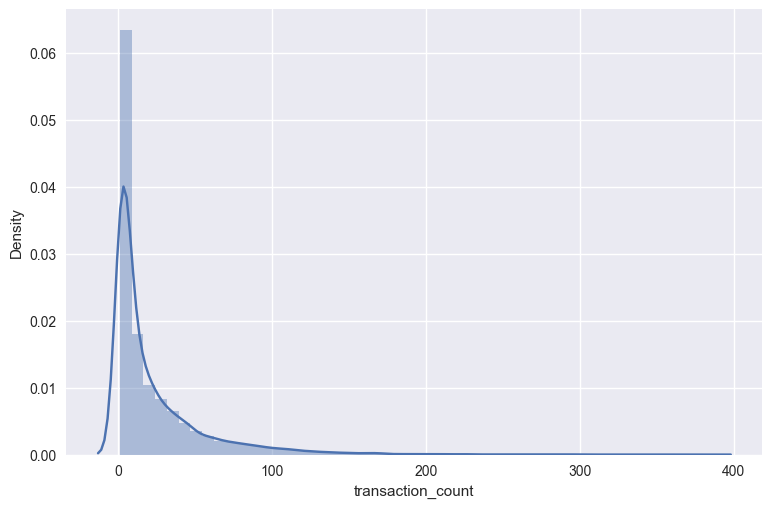

In [224]:
sns.distplot(frequency['transaction_count'])

In [225]:
# Get the set of users with frequent trasnaction
freq_users_set=set(frequency[frequency['transaction_count'] > 30]['user_id'])

In [226]:
data_balance['is_freq_users'] = 0
data_balance.loc[data_balance['user_id'].isin(freq_users_set) , 'is_freq_users'] = 1

In [227]:
total_balance_freqOrnot = data_balance.groupby(['date','is_freq_users'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

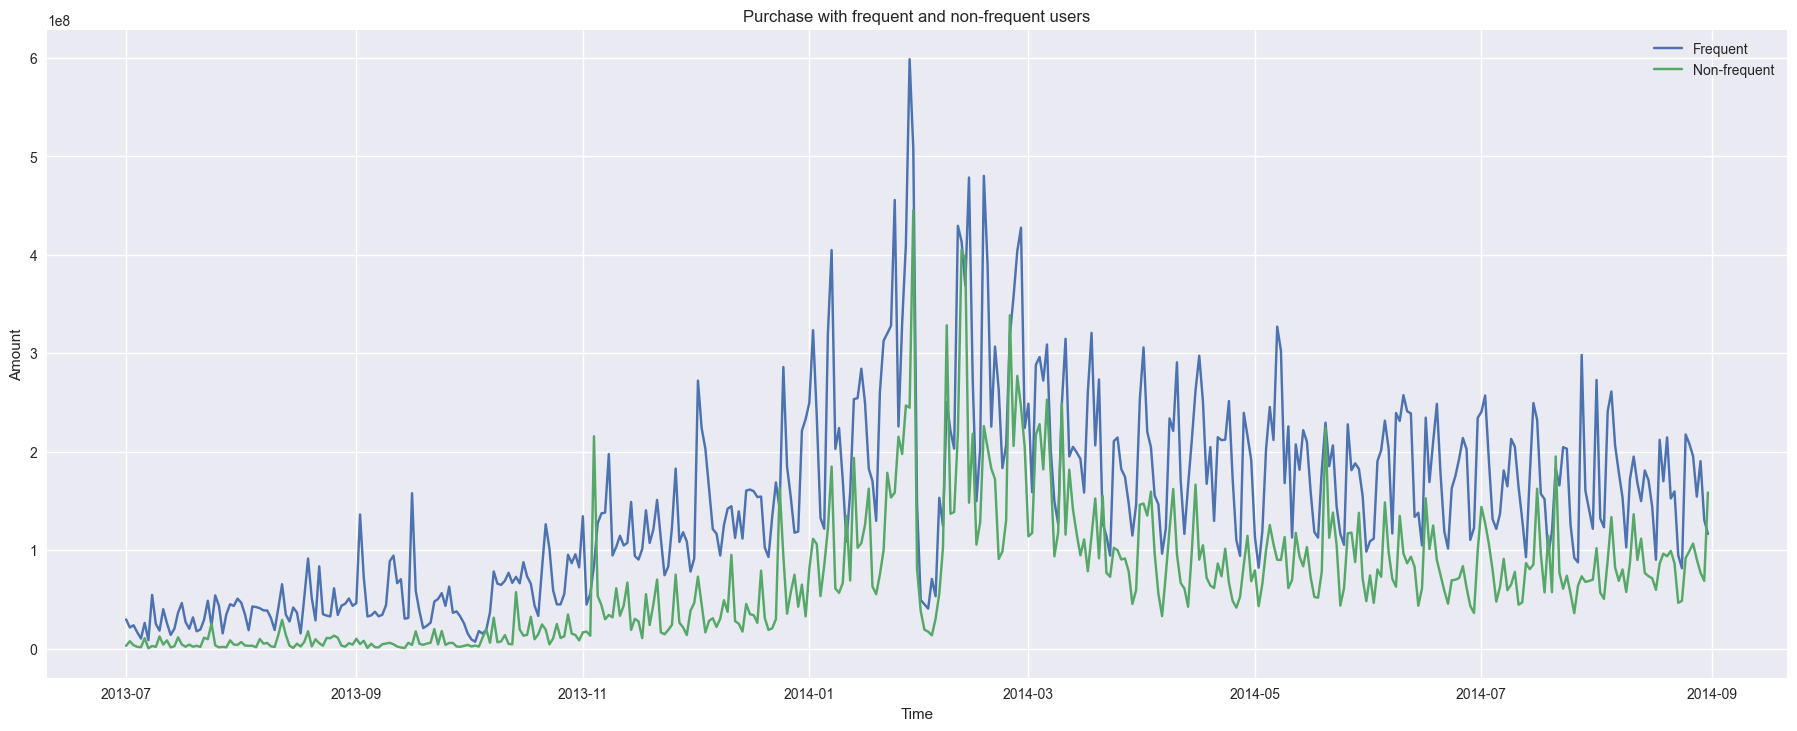

In [231]:
#Plot the time series of total purchase amount for frequent and non-frequent users
fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 1]['date'], total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 1]['total_purchase_amt'],label='Frequent')
plt.plot(total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 0]['date'], total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 0]['total_purchase_amt'],label='Non-frequent')

plt.legend(loc='best')
plt.title("Purchase with frequent and non-frequent users")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

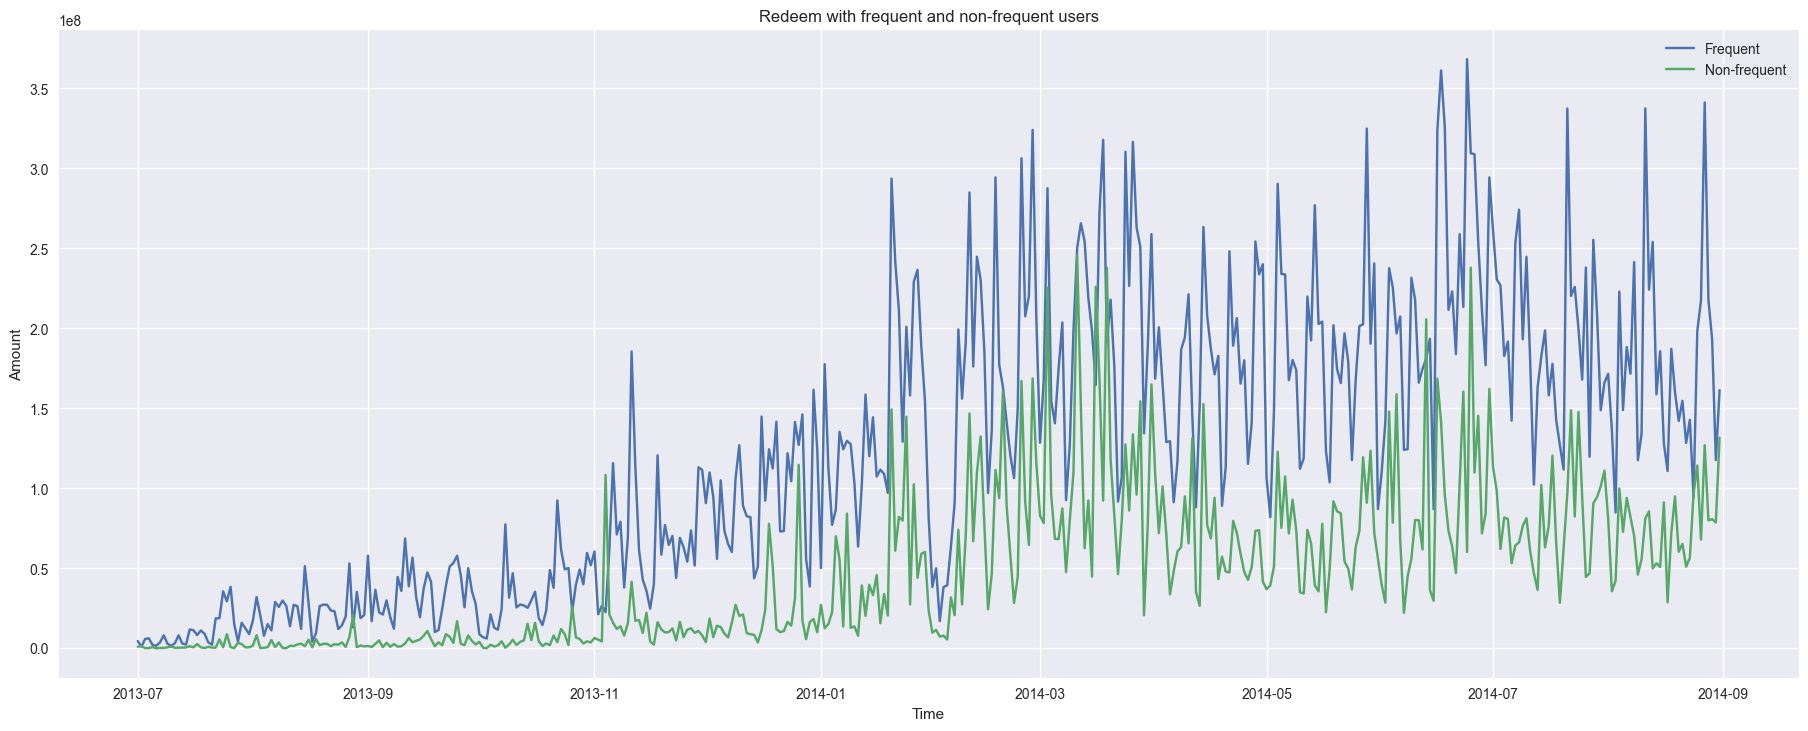

In [232]:
#Plot the time series of total redemption volume for frequent and non-frequent users
fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 1]['date'], total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 1]['total_redeem_amt'],label='Frequent')
plt.plot(total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 0]['date'], total_balance_freqOrnot[total_balance_freqOrnot['is_freq_users'] == 0]['total_redeem_amt'],label='Non-frequent')

plt.legend(loc='best')
plt.title("Redeem with frequent and non-frequent users")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

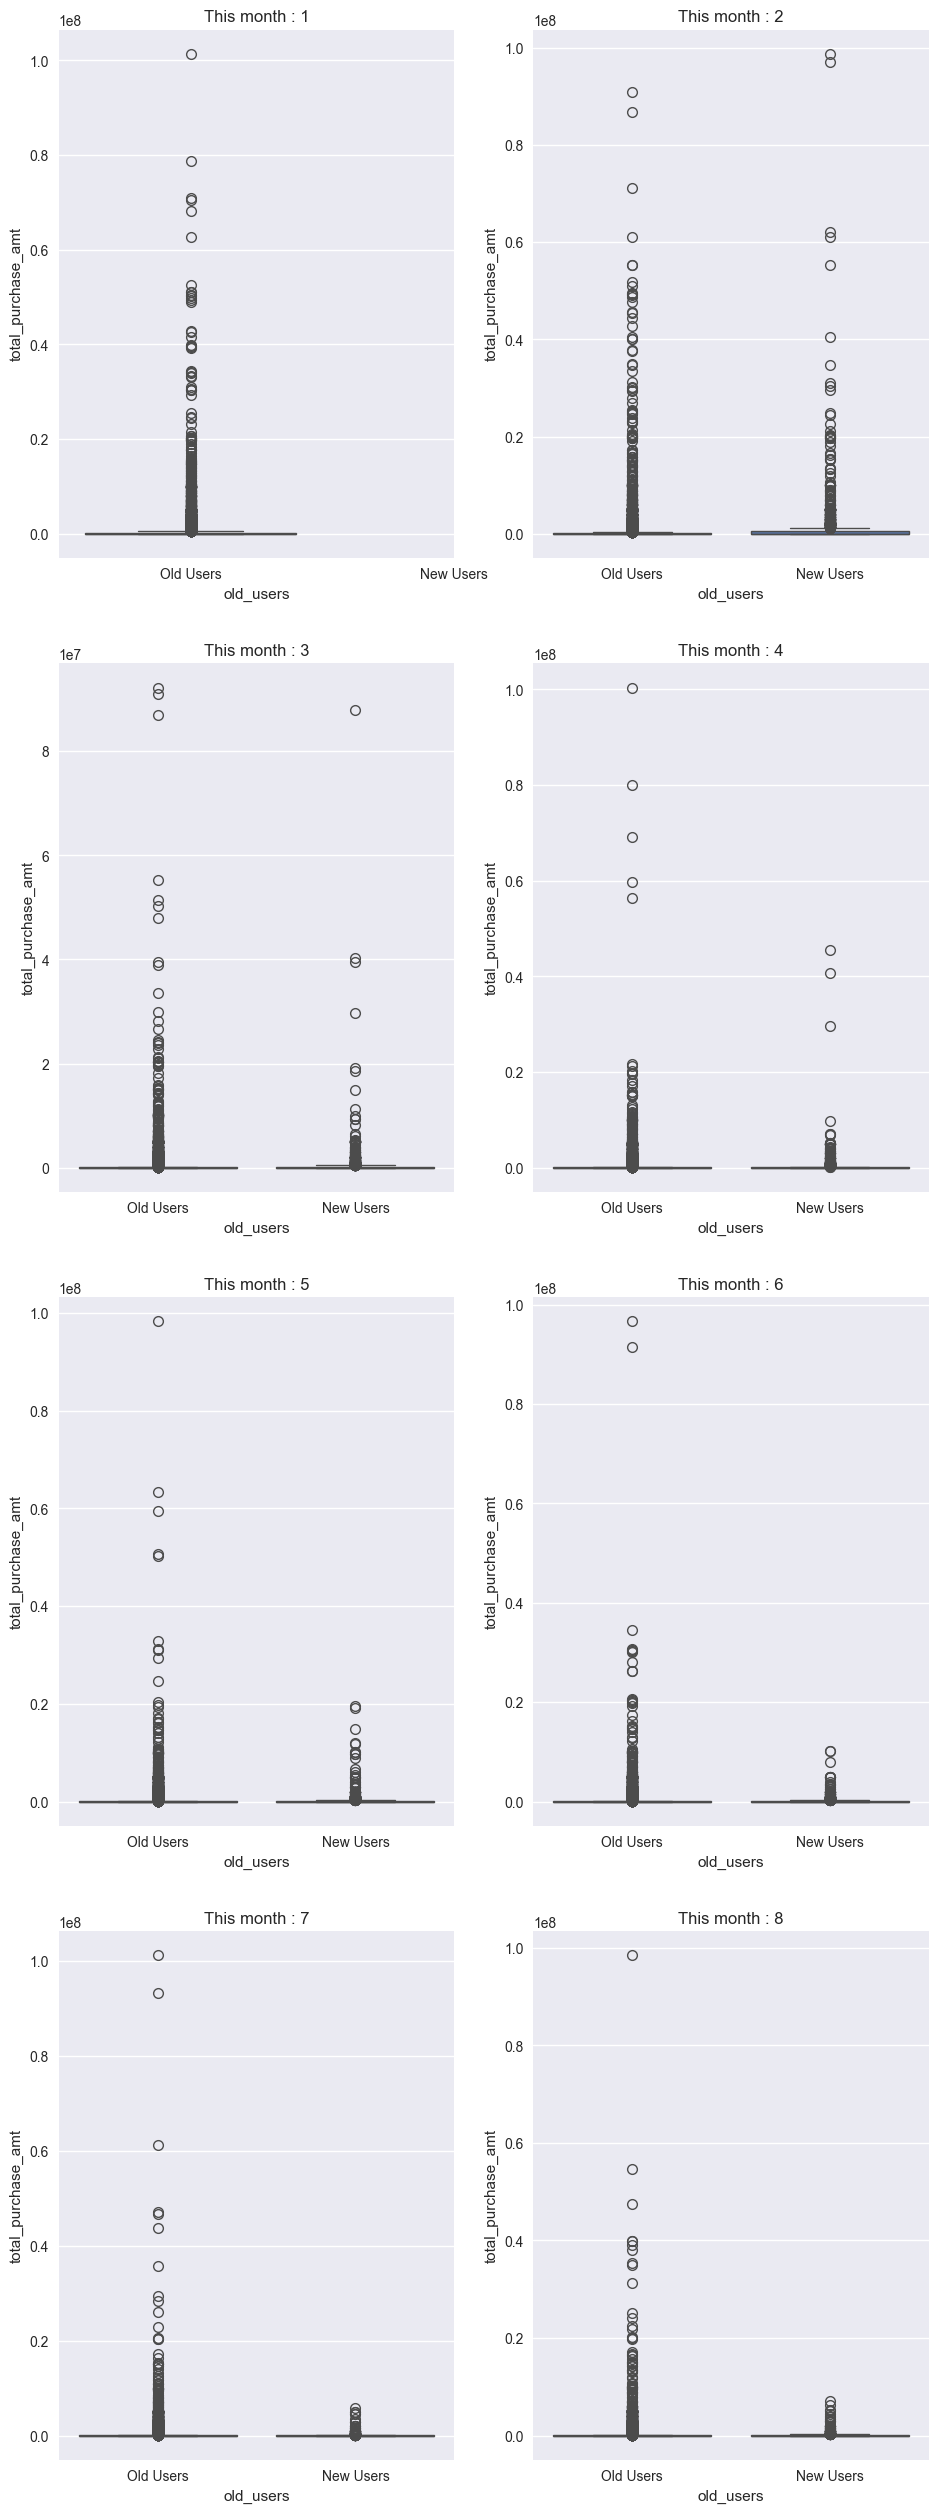

In [234]:
temp = data_balance[['year','month','user_id','total_purchase_amt','total_redeem_amt']].groupby(['year','month','user_id'], as_index=False).sum()
user_old_set = set()
plt.figure(figsize=(10,30))
for i in range(1, 9):
    newset = set(temp[(temp['year'] == 2014) & (temp['month'] == i)]['user_id'])
    this_month = data_balance[(data_balance['year'] == 2014) & (data_balance['month'] == i)]
    this_month['old_users'] = 0
    this_month.loc[this_month['user_id'].isin(newset - user_old_set), 'old_users'] = 1
    plt.subplot(4,2,i)
    plt.title('This month : ' + str(i))
    sns.boxplot(x="old_users", y="total_purchase_amt" , data=this_month[(this_month['direct_purchase_amt'] != 0) | (this_month['total_redeem_amt'] != 0)])
    plt.xticks(ticks=[0, 1], labels=['Old Users', 'New Users'])
    user_old_set = user_old_set | newset
plt.show()

# Analyze users' other attributes


In [235]:
users.head()

user_id  sex     city     Zodiac
0        2    1  6411949        Leo
1       12    1  6412149  Capricorn
2       22    1  6411949     Gemini
3       23    1  6411949     Pisces
4       25    1  6481949     Pisces

In [236]:
data_balance.head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   

   consume_amt  ...       date  day  month  year  week  weekday  big_purchase  \
0            0  ... 2014-08-05    5      8  2014    32        1             0   
1            0  ... 2014-08-08    8      8  2014    32        4             0   
2            0  ... 2014-08-11   11      8  2014    33        0             0   
3            0  ... 2014-08-14   14      8  2014    33        3             0   
4            0  ... 2014-08-17   17      8  2014    33        6             0   

   big_redeem big_user  is_freq_users  
0           0        0              0  
1           0        0              0  
2           0        0              0  
3           0        0              0  
4           0        0              0  

[5 rows x 28 columns]

In [237]:
data_balance = pd.merge(data_balance, users, on='user_id')

In [238]:
data_balance.columns

Index(['user_id', 'report_date', 'tBalance', 'yBalance', 'total_purchase_amt',
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
       'total_redeem_amt', 'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt', 'category1', 'category2', 'category3',
       'category4', 'date', 'day', 'month', 'year', 'week', 'weekday',
       'big_purchase', 'big_redeem', 'big_user', 'is_freq_users', 'sex',
       'city', 'Zodiac'],
      dtype='object')

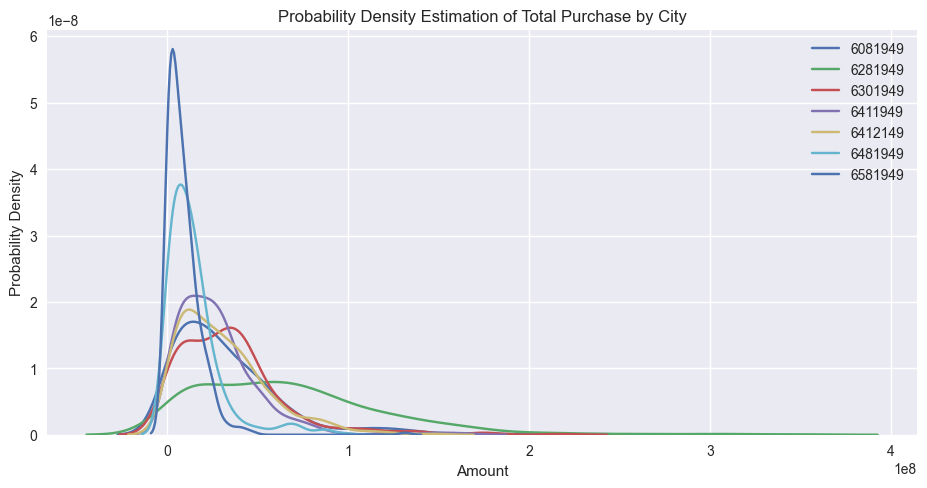

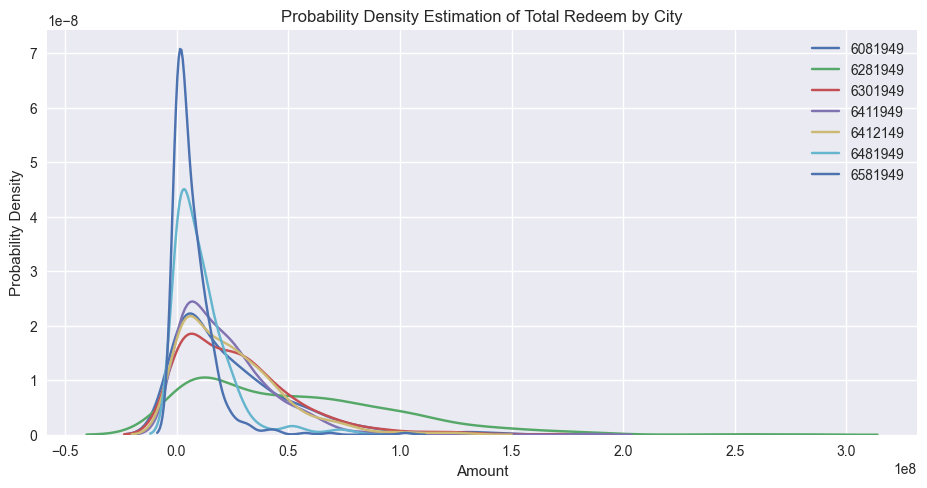

In [248]:
# Daily total transaction amount for users in each city
fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("Probability Density Estimation of Total Purchase by City")
plt.xlabel("Amount")
plt.ylabel("Probability Density")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("Probability Density Estimation of Total Redeem by City")
plt.xlabel("Amount")
plt.ylabel("Probability Density")
plt.show()

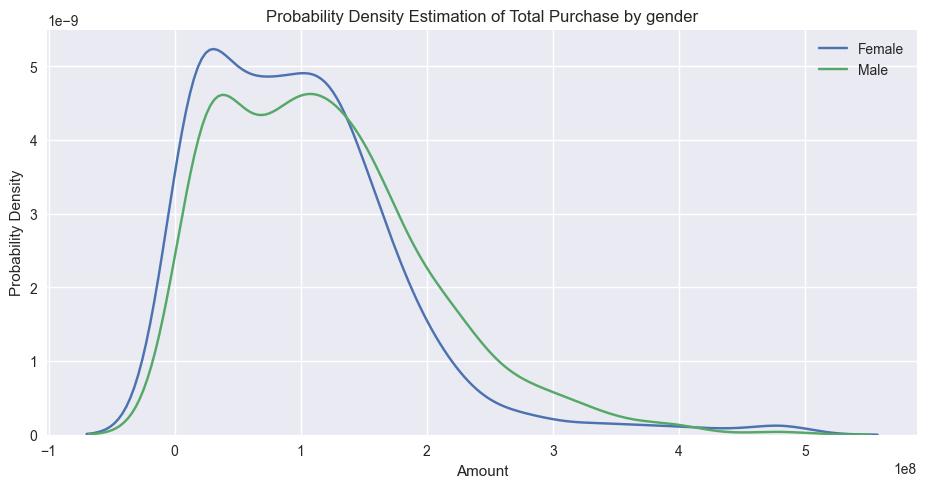

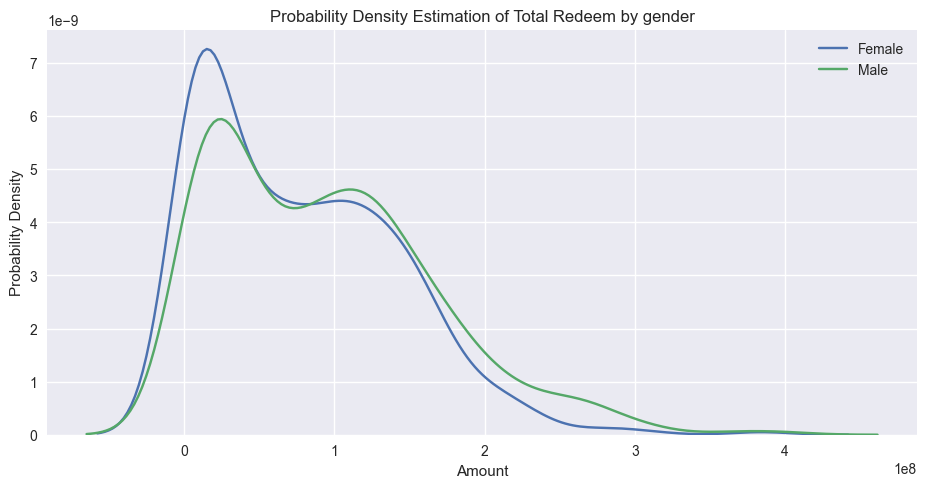

In [249]:
# Daily total transaction amount for users by gender
gender_mapping={1:'Male',0:'Female'}
fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['sex']):
    temp = data_balance.groupby(['date','sex'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['sex'] == i]['total_purchase_amt'],label=gender_mapping[i])
plt.legend(loc='best')
plt.title("Probability Density Estimation of Total Purchase by gender")
plt.xlabel("Amount")
plt.ylabel("Probability Density")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['sex']):
    temp = data_balance.groupby(['date','sex'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['sex'] == i]['total_redeem_amt'],label=gender_mapping[i])
plt.legend(loc='best')
plt.title("Probability Density Estimation of Total Redeem by gender")
plt.xlabel("Amount")
plt.ylabel("Probability Density")
plt.show()

In [250]:
users.head()

user_id  sex     city     Zodiac
0        2    1  6411949        Leo
1       12    1  6412149  Capricorn
2       22    1  6411949     Gemini
3       23    1  6411949     Pisces
4       25    1  6481949     Pisces

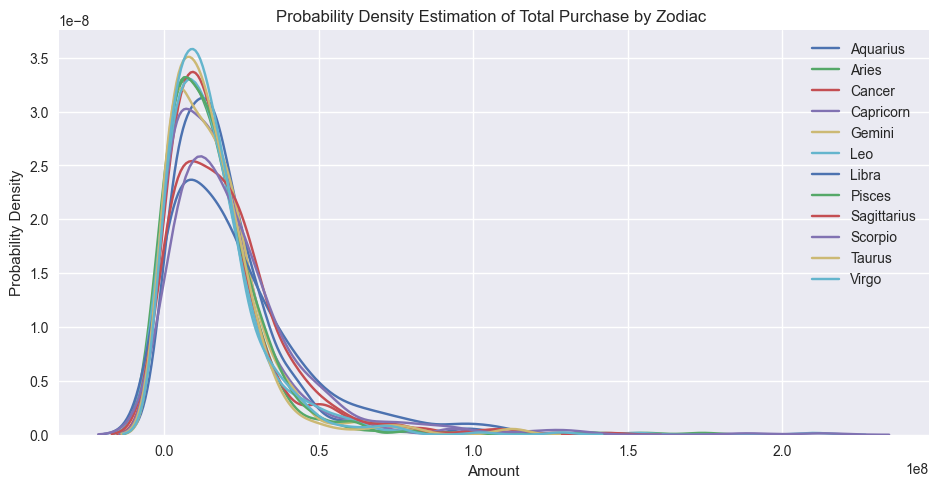

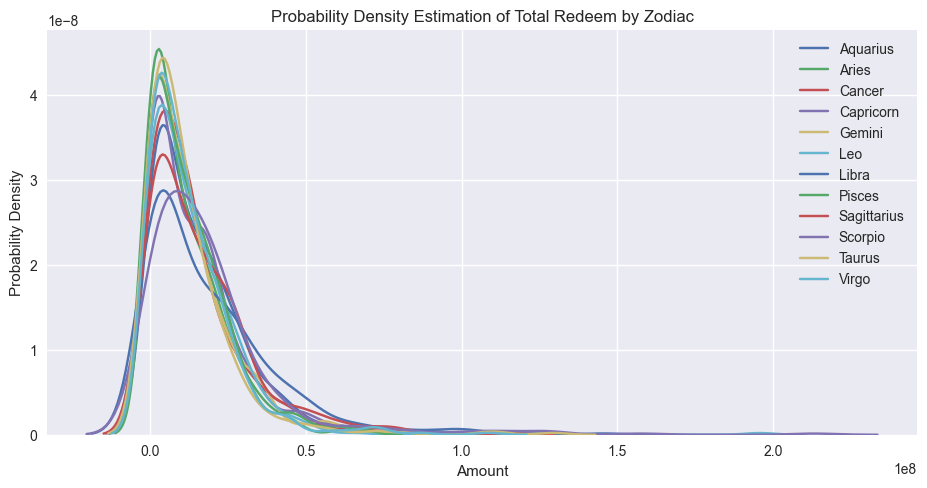

In [251]:
# Constellation
fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['Zodiac']):
    temp = data_balance.groupby(['date','Zodiac'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['Zodiac'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("Probability Density Estimation of Total Purchase by Zodiac ")
plt.xlabel("Amount")
plt.ylabel("Probability Density")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['Zodiac']):
    temp = data_balance.groupby(['date','Zodiac'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['Zodiac'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("Probability Density Estimation of Total Redeem by Zodiac")
plt.xlabel("Amount")
plt.ylabel("Probability Density")
plt.show()


<Axes: xlabel='Zodiac', ylabel='total_purchase_amt'>

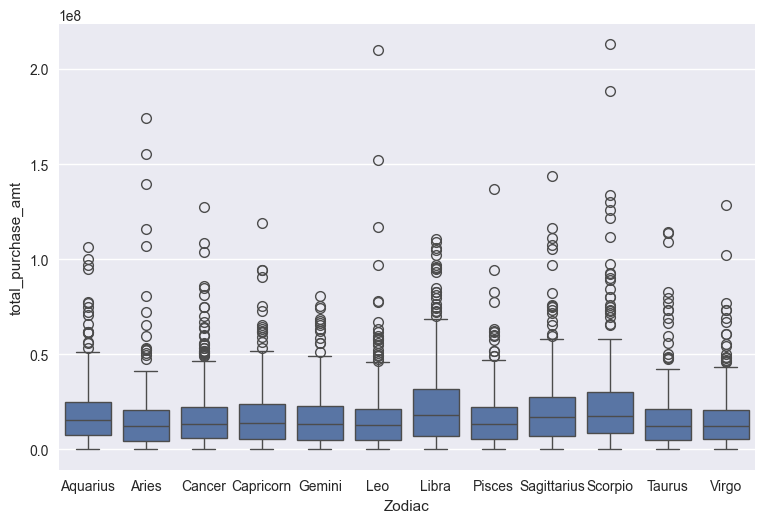

In [253]:
sns.boxplot(data = temp, x = 'Zodiac',y = 'total_purchase_amt')


<Axes: xlabel='Zodiac', ylabel='total_redeem_amt'>

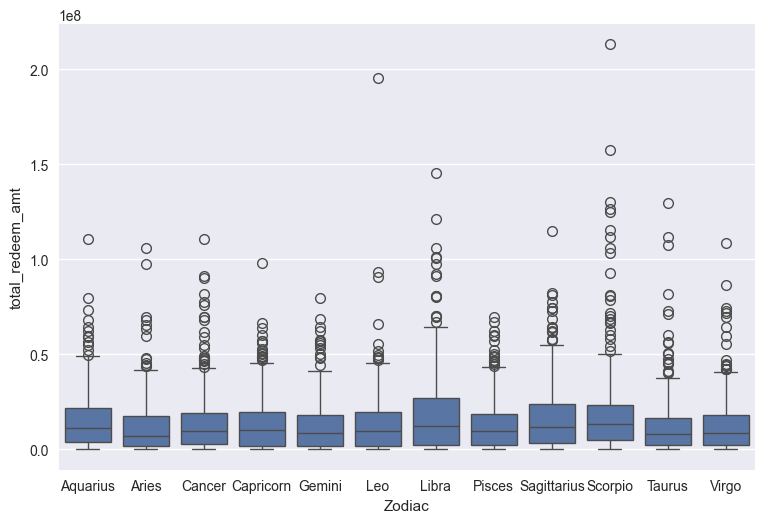

In [254]:
sns.boxplot(data = temp, x = 'Zodiac',y = 'total_redeem_amt')

# Other

In [255]:
# direct purchase and yield
temp = data_balance.groupby(['date'], as_index=False)['direct_purchase_amt','share_amt'].sum()

In [256]:
temp.head()

date  direct_purchase_amt  share_amt
0 2013-07-01             32458786      29562
1 2013-07-02             29007510      29880
2 2013-07-03             27234156      36614
3 2013-07-04             18282230      38955
4 2013-07-05             11607991      40758

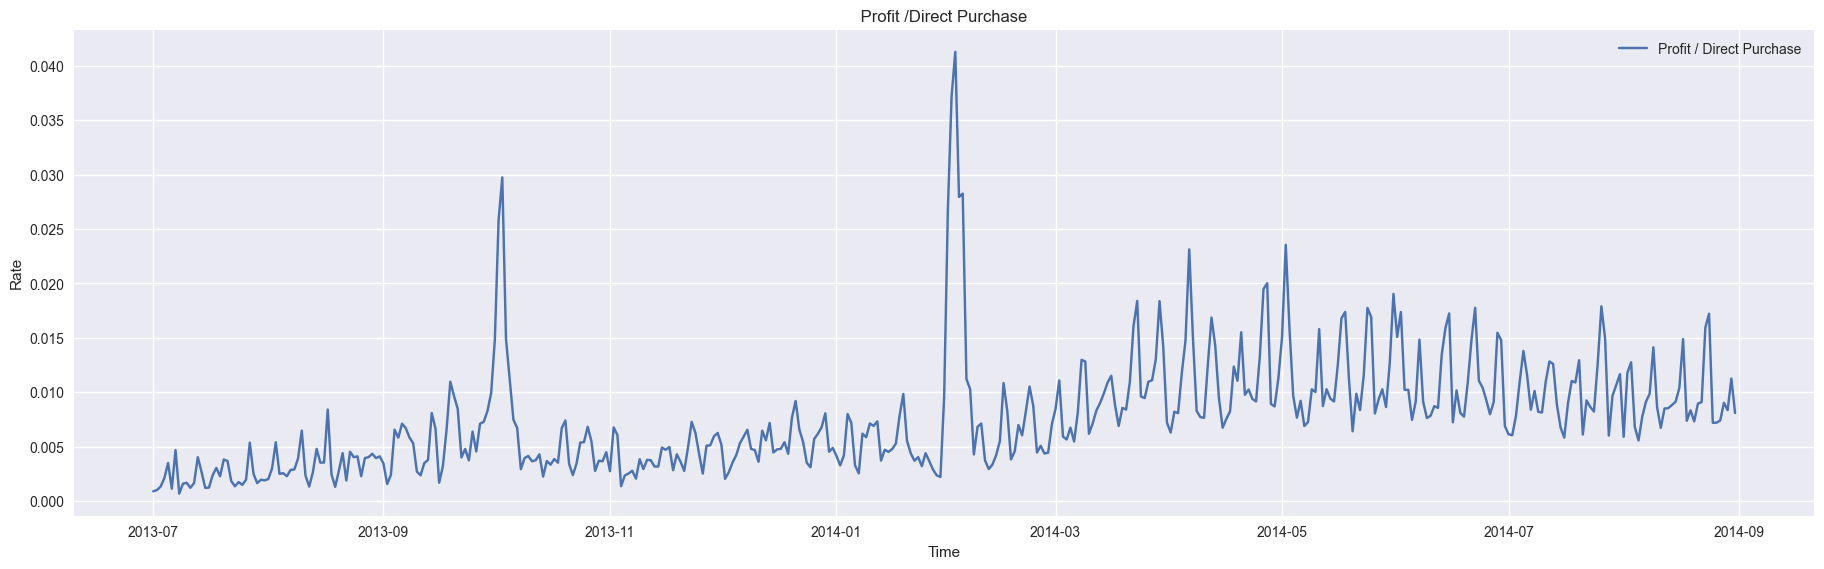

In [259]:
# Time series chart of daily yield/direct purchase amount

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'],  temp['share_amt'] / temp['direct_purchase_amt'] ,label='Profit / Direct Purchase')
plt.legend(loc='best')
plt.title(" Profit /Direct Purchase ")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.show()

In [260]:
# Look at the share table
share.head()

date  mfd_daily_yield  mfd_7daily_yield  day  month  year  week  \
0 2013-07-01           1.5787             6.307    1      7  2013    27   
1 2013-07-02           1.5461             6.174    2      7  2013    27   
2 2013-07-03           1.4670             6.034    3      7  2013    27   
3 2013-07-04           1.4223             5.903    4      7  2013    27   
4 2013-07-05           1.3845             5.739    5      7  2013    27   

   weekday  last_date  last_week  
0        0 2013-07-02         26  
1        1 2013-07-03         26  
2        2 2013-07-04         26  
3        3 2013-07-05         26  
4        4 2013-07-06         26

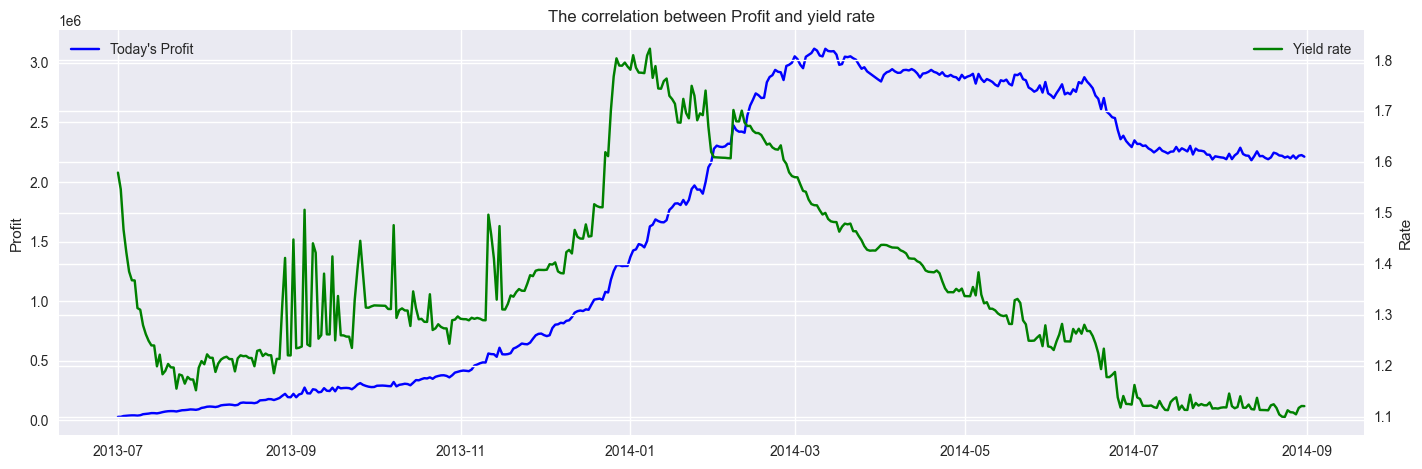

In [267]:
fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'],'b',label="Today's Profit")
plt.ylabel("Profit")
plt.legend(loc=2)

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Yield rate")

plt.legend(loc=1)
plt.title("The correlation between Profit and yield rate")
plt.xlabel("Time")
plt.ylabel("Rate")

plt.show()

In [281]:
(data_balance['purchase_bal_amt'] + data_balance['purchase_bank_amt'] == data_balance['direct_purchase_amt']).all()

True

Direct purchase = purchase_bal_amt+ purchase_bank_amt
There are two types of purchase:
1. With the balance in Yu'E bao. 
2. With debit card
 

In [282]:
temp = data_balance.groupby(['date'], as_index=False)['purchase_bal_amt','purchase_bank_amt'].sum()


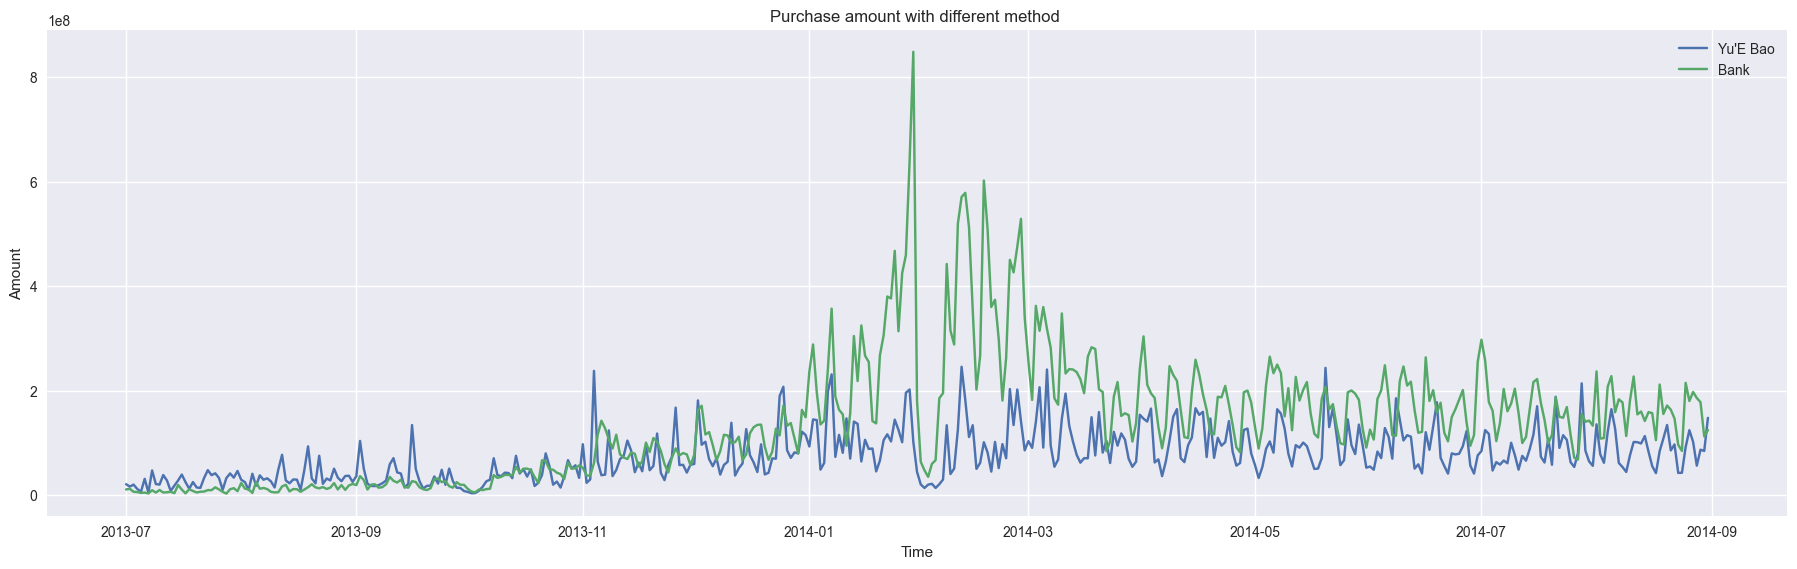

In [287]:
fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['purchase_bal_amt'],label="Yu'E Bao")
plt.plot(temp['date'], temp['purchase_bank_amt'],label='Bank')
plt.legend(loc='best')
plt.title("Purchase amount with different method ")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [285]:
(data_balance['tftobal_amt'] + data_balance['tftocard_amt'] == data_balance['transfer_amt']).all()

True

Transfer amount = tftobal_amt+ tftocard_amt
There are two types of redemption:
1. Yu'E bao. 
2. Debit card
 

In [289]:
temp = data_balance.groupby(['date'], as_index=False)['tftobal_amt','tftocard_amt'].sum()

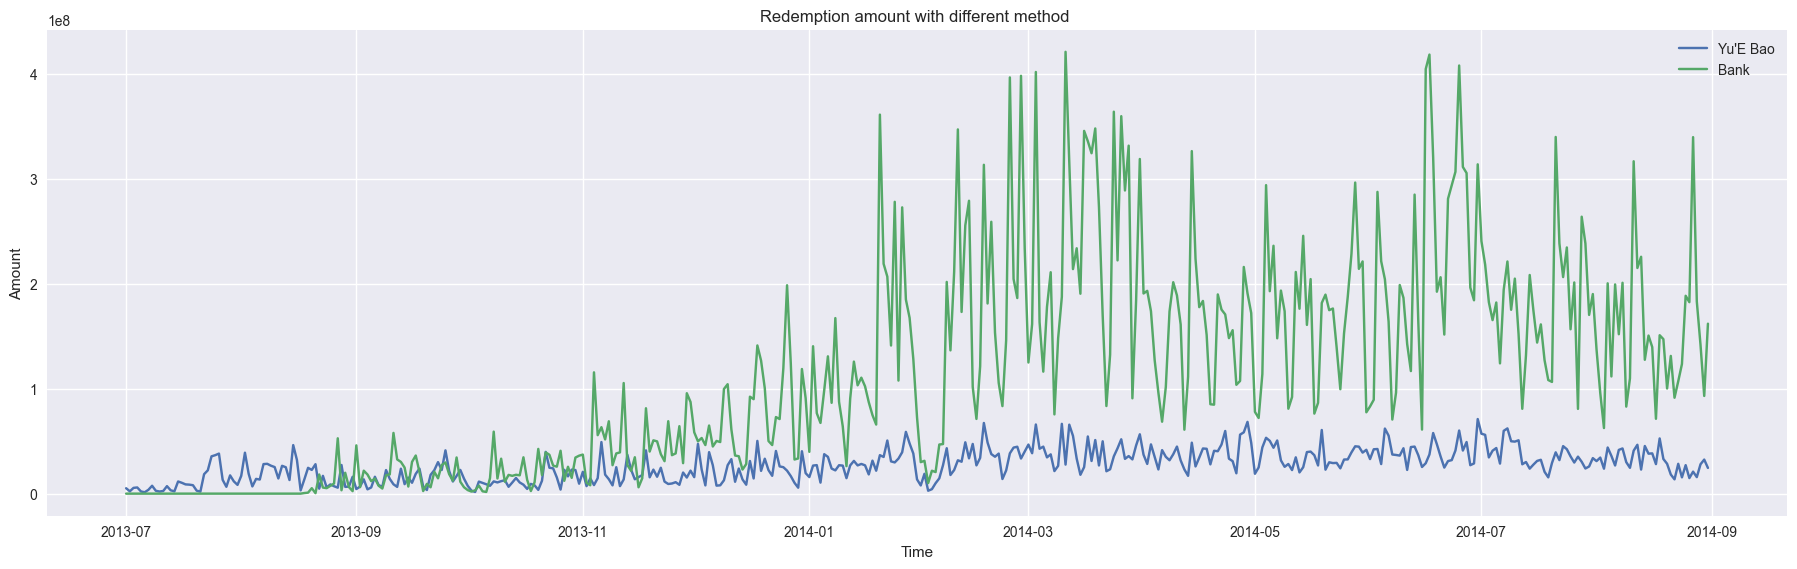

In [290]:
fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['tftobal_amt'],label="Yu'E Bao")
plt.plot(temp['date'], temp['tftocard_amt'],label='Bank')
plt.legend(loc='best')
plt.title("Redemption amount with different method ")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

Although there is not much difference between purchases made by Yu'E Bao or debit card, the differences in redemptions are quite significant. 